In [1]:
# 実験計画法

In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from scipy import signal

In [17]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
size_x_data_list1 = []
size_x_data_list2 = []
size_x_data_list3 = []
y_size_data_array = []
no_hole_data1 = []
one_one_one1 = []
one_two_two1 = []
one_three_three1 = []
one_four_four1 = []
one_five_five1 = []
two_one_two1 = []
two_two_three1 = []
two_three_four1 = []
two_four_five1 = []
two_five_one1 = []
three_one_three1 = []
three_two_four1 = []
three_three_five1 = []
three_four_one1 = []
three_five_two1 = []
four_one_four1 = []
four_two_five1 = []
four_three_one1 = []
four_four_two1 = []
four_five_three1 = []
five_one_five1 = []
five_two_one1 = []
five_three_two1 = []
five_four_three1 = []
five_five_four1 = []
no_hole_data2 = []
one_one_one2 = []
one_two_two2 = []
one_three_three2 = []
one_four_four2 = []
one_five_five2 = []
two_one_two2 = []
two_two_three2 = []
two_three_four2 = []
two_four_five2 = []
two_five_one2 = []
three_one_three2 = []
three_two_four2 = []
three_three_five2 = []
three_four_one2 = []
three_five_two2 = []
four_one_four2 = []
four_two_five2 = []
four_three_one2 = []
four_four_two2 = []
four_five_three2 = []
five_one_five2 = []
five_two_one2 = []
five_three_two2 = []
five_four_three2 = []
five_five_four2 = []
no_hole_data3 = []
one_one_one3 = []
one_two_two3 = []
one_three_three3 = []
one_four_four3 = []
one_five_five3 = []
two_one_two3 = []
two_two_three3 = []
two_three_four3 = []
two_four_five3 = []
two_five_one3 = []
three_one_three3 = []
three_two_four3 = []
three_three_five3 = []
three_four_one3 = []
three_five_two3 = []
four_one_four3 = []
four_two_five3 = []
four_three_one3 = []
four_four_two3 = []
four_five_three3 = []
five_one_five3 = []
five_two_one3 = []
five_three_two3 = []
five_four_three3 = []
five_five_four3 = []
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one1.append(data_array[3:1254])
        one_one_one2.append(data_array[1254:2505])
        one_one_one3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two1.append(data_array[3:1254])
        one_two_two2.append(data_array[1254:2505])
        one_two_two3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three1.append(data_array[3:1254])
        one_three_three2.append(data_array[1254:2505])
        one_three_three3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four1.append(data_array[3:1254])
        one_four_four2.append(data_array[1254:2505])
        one_four_four3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five1.append(data_array[3:1254])
        one_five_five2.append(data_array[1254:2505])
        one_five_five3.append(data_array[2505:-1])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two1.append(data_array[3:1254])
        two_one_two2.append(data_array[1254:2505])
        two_one_two3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three1.append(data_array[3:1254])
        two_two_three2.append(data_array[1254:2505])
        two_two_three3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four1.append(data_array[3:1254])
        two_three_four2.append(data_array[1254:2505])
        two_three_four3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five1.append(data_array[3:1254])
        two_four_five2.append(data_array[1254:2505])
        two_four_five3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one1.append(data_array[3:1254])
        two_five_one2.append(data_array[1254:2505])
        two_five_one3.append(data_array[2505:-1])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three1.append(data_array[3:1254])
        three_one_three2.append(data_array[1254:2505])
        three_one_three3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four1.append(data_array[3:1254])
        three_two_four2.append(data_array[1254:2505])
        three_two_four3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five1.append(data_array[3:1254])
        three_three_five2.append(data_array[1254:2505])
        three_three_five3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one1.append(data_array[3:1254])
        three_four_one2.append(data_array[1254:2505])
        three_four_one3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two1.append(data_array[3:1254])
        three_five_two2.append(data_array[1254:2505])
        three_five_two3.append(data_array[2505:-1])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four1.append(data_array[3:1254])
        four_one_four2.append(data_array[1254:2505])
        four_one_four3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five1.append(data_array[3:1254])
        four_two_five2.append(data_array[1254:2505])
        four_two_five3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one1.append(data_array[3:1254])
        four_three_one2.append(data_array[1254:2505])
        four_three_one3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two1.append(data_array[3:1254])
        four_four_two2.append(data_array[1254:2505])
        four_four_two3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three1.append(data_array[3:1254])
        four_five_three2.append(data_array[1254:2505])
        four_five_three3.append(data_array[2505:-1])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five1.append(data_array[3:1254])
        five_one_five2.append(data_array[1254:2505])
        five_one_five3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one1.append(data_array[3:1254])
        five_two_one2.append(data_array[1254:2505])
        five_two_one3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two1.append(data_array[3:1254])
        five_three_two2.append(data_array[1254:2505])
        five_three_two3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three1.append(data_array[3:1254])
        five_four_three2.append(data_array[1254:2505])
        five_four_three3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four1.append(data_array[3:1254])
        five_five_four2.append(data_array[1254:2505])
        five_five_four3.append(data_array[2505:-1])
### 利用データの決定
for j in range(5):
    size_x_data1 = []
    size_x_data2 = []
    size_x_data3 = []
    size_y_data = []
#     position_x_data = []
#     position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_one_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_one_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_one_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_two_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_two_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_two_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_three_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_three_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_three_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_four_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_four_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_four_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_five_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_five_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_five_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_one_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_one_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_one_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_two_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_two_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_two_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_three_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_three_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_three_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_four_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_four_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_four_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_five_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_five_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_five_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_one_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_one_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_one_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_two_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_two_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_two_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_three_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_three_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_three_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_four_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_four_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_four_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_five_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_five_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_five_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_one_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_one_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_one_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_two_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_two_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_two_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_three_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_three_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_three_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_four_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_four_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_four_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_five_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_five_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_five_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_one_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_one_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_one_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_two_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_two_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_two_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_three_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_three_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_three_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_four_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_four_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_four_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four1)):
        index.append(i)
    data_count = 2*(j+1)
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_five_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_five_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_five_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data1 = np.array(no_hole_data1, dtype=float)
    no_hole_data2 = np.array(no_hole_data2, dtype=float)
    no_hole_data3 = np.array(no_hole_data3, dtype=float)
    size_x_data1 = np.array(size_x_data1, dtype=float)
    size_x_data2 = np.array(size_x_data2, dtype=float)
    size_x_data3 = np.array(size_x_data3, dtype=float)
    size_y_data = np.array(size_y_data, dtype=float)
    
    size_x_data_list1.append(size_x_data1)
    size_x_data_list2.append(size_x_data2)
    size_x_data_list3.append(size_x_data3)
    y_size_data_array.append(size_y_data)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
# 欠陥ありデータ
N = len(no_hole_data1)
fft_size_x_data_array1 = []
fft_size_x_data_array2 = []
fft_size_x_data_array3 = []
for i in range(len(size_x_data_list1)):
    fft_size_x_data1 = []
    fft_size_x_data2 = []
    fft_size_x_data3 = []
    size_x_data1 = size_x_data_list1[i]
    size_x_data2 = size_x_data_list2[i]
    size_x_data3 = size_x_data_list3[i]
    ### 観測点1
    for j in range(len(size_x_data1)):
        F = np.fft.fft(size_x_data1[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data1.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array1) == False:
                rep_freq_array1.append(rep_index[k])
    ### 観測点2
    for j in range(len(size_x_data2)):
        F = np.fft.fft(size_x_data2[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data2.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array2) == False:
                rep_freq_array2.append(rep_index[k])
    ### 観測点3
    for j in range(len(size_x_data3)):
        F = np.fft.fft(size_x_data3[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data3.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array3) == False:
                rep_freq_array3.append(rep_index[k])
    fft_size_x_data_array1.append(fft_size_x_data1)
    fft_size_x_data_array2.append(fft_size_x_data2)
    fft_size_x_data_array3.append(fft_size_x_data3)
#入力値の更新(振動→代表周波数の振幅)
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
for i in range(len(size_x_data_list1)):
    ## 観測点1
    fft_size_x_data1 = fft_size_x_data_array1[i]
    size_x_data1 = []
    for j in range(len(fft_size_x_data1)):
        rep_amp = []
        for k in range(len(rep_freq_array1)):
            rep_amp.append(fft_size_x_data1[j][k]-Amp_no_hole1[k])
        size_x_data1.append(rep_amp)
    x_size_data_array1.append(size_x_data1)
    ## 観測点2
    fft_size_x_data2 = fft_size_x_data_array2[i]
    size_x_data2 = []
    for j in range(len(fft_size_x_data2)):
        rep_amp = []
        for k in range(len(rep_freq_array2)):
            rep_amp.append(fft_size_x_data2[j][k]-Amp_no_hole2[k])
        size_x_data2.append(rep_amp)
    x_size_data_array2.append(size_x_data2)
    ## 観測点3
    fft_size_x_data3 = fft_size_x_data_array3[i]
    size_x_data3 = []
    for j in range(len(fft_size_x_data3)):
        rep_amp = []
        for k in range(len(rep_freq_array3)):
            rep_amp.append(fft_size_x_data3[j][k]-Amp_no_hole3[k])
        size_x_data3.append(rep_amp)
    x_size_data_array3.append(size_x_data3)

    
## データの加工
###最大値で割る
max_displacement1 = 0
max_displacement2 = 0
max_displacement3 = 0
for i in range(len(x_size_data_array1)):
    x_size_data1 = x_size_data_array1[i]
    for j in range(len(x_size_data1)):
        displacement1 = x_size_data1[j]
        for k in range(len(displacement1)):
            if max_displacement1 < displacement1[k]:
                max_displacement1 = displacement1[k]
for i in range(len(x_size_data_array2)):
    x_size_data2 = x_size_data_array2[i]
    for j in range(len(x_size_data2)):
        displacement2 = x_size_data2[j]
        for k in range(len(displacement2)):
            if max_displacement2 < displacement2[k]:
                max_displacement2 = displacement2[k]
for i in range(len(x_size_data_array3)):
    x_size_data3 = x_size_data_array3[i]
    for j in range(len(x_size_data3)):
        displacement3 = x_size_data3[j]
        for k in range(len(displacement3)):
            if max_displacement3 < displacement3[k]:
                max_displacement3 = displacement3[k]
for i in range(len(x_size_data_array1)):
    for j in range(len(x_size_data_array1[i])):
        for k in range(len(x_size_data_array1[i][j])):
            x_size_data_array1[i][j][k] = x_size_data_array1[i][j][k]/max_displacement1
for i in range(len(x_size_data_array2)):
    for j in range(len(x_size_data_array2[i])):
        for k in range(len(x_size_data_array2[i][j])):
            x_size_data_array2[i][j][k] = x_size_data_array2[i][j][k]/max_displacement2
for i in range(len(x_size_data_array3)):
    for j in range(len(x_size_data_array3[i])):
        for k in range(len(x_size_data_array3[i][j])):
            x_size_data_array3[i][j][k] = x_size_data_array3[i][j][k]/max_displacement3

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
y_size_train_array = []
y_size_test_array = []
for i in range(5):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))

In [18]:
print(len(x_size_train_array1))

5


In [19]:
print(len(x_size_train_array1[0]))

45


In [20]:
print(len(x_size_train_array1[0][0]))

37


In [21]:
print(len(x_size_train_array2[0][0]))

49


In [22]:
print(len(x_size_train_array3[0][0]))

41


In [23]:
# 大きさ推定のモデル
model_size_array = []

for i in range(5):
    # 入力を定義
    input1 = Input(shape=(37,1))
    input2 = Input(shape=(49,1))
    input3 = Input(shape=(41,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

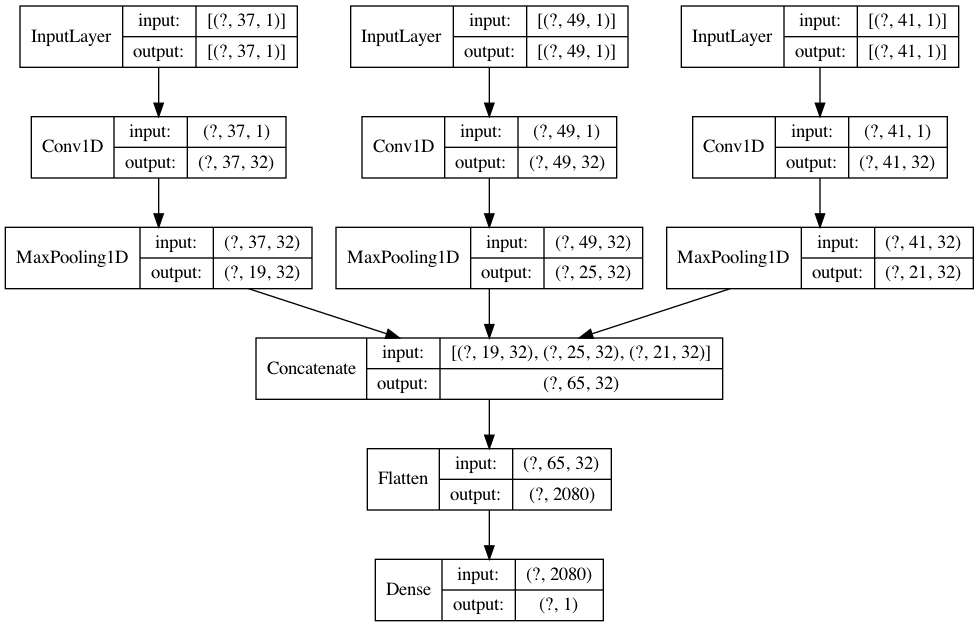

In [24]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model_size_array[0], show_shapes=True, show_layer_names=False)

In [25]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 218ms/step - loss: 10.9185 - acc: 0.0000e+00 - val_loss: 11.4193 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 34ms/step - loss: 10.8268 - acc: 0.0000e+00 - val_loss: 11.3035 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 10.7263 - acc: 0.0000e+00 - val_loss: 11.1731 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 35ms/step - loss: 10.6116 - acc: 0.0000e+00 - val_loss: 11.0257 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 41ms/step - loss: 10.4805 - acc: 0.0000e+00 - val_loss: 10.8595 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.3316 - acc: 0.0000e+00 - val_loss: 10.6735 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 49ms/step - loss: 10.1638 - acc: 0.0000e+00 - val_loss: 10.4668 - val_acc: 0.0000e+00
Epoch 8/1000

1/1 [==============================] - 0s 31ms/step - loss: 1.9593 - acc: 0.2000 - val_loss: 1.3440 - val_acc: 0.2000
Epoch 63/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.9629 - acc: 0.2000 - val_loss: 1.3491 - val_acc: 0.2000
Epoch 64/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.9649 - acc: 0.2000 - val_loss: 1.3507 - val_acc: 0.2000
Epoch 65/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.9652 - acc: 0.2000 - val_loss: 1.3490 - val_acc: 0.2000
Epoch 66/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.9637 - acc: 0.2000 - val_loss: 1.3442 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 115ms/step - loss: 1.9606 - acc: 0.2000 - val_loss: 1.3368 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 66ms/step - loss: 1.9562 - acc: 0.2000 - val_loss: 1.3273 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9507 - acc: 0

Epoch 124/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8178 - acc: 0.2000 - val_loss: 1.1340 - val_acc: 0.2000
Epoch 125/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.8154 - acc: 0.2000 - val_loss: 1.1319 - val_acc: 0.2000
Epoch 126/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8129 - acc: 0.2000 - val_loss: 1.1298 - val_acc: 0.2000
Epoch 127/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8105 - acc: 0.2000 - val_loss: 1.1277 - val_acc: 0.2000
Epoch 128/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8080 - acc: 0.2000 - val_loss: 1.1256 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.8055 - acc: 0.2000 - val_loss: 1.1235 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8030 - acc: 0.2000 - val_loss: 1.1214 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 1.6400 - acc: 0.2000 - val_loss: 0.9818 - val_acc: 0.2000
Epoch 186/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6366 - acc: 0.2000 - val_loss: 0.9793 - val_acc: 0.2000
Epoch 187/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6333 - acc: 0.2000 - val_loss: 0.9769 - val_acc: 0.2000
Epoch 188/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6299 - acc: 0.2000 - val_loss: 0.9744 - val_acc: 0.2000
Epoch 189/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6265 - acc: 0.2000 - val_loss: 0.9720 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6231 - acc: 0.2000 - val_loss: 0.9696 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6197 - acc: 0.2000 - val_loss: 0.9672 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6163 - 

Epoch 247/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4254 - acc: 0.2000 - val_loss: 0.8747 - val_acc: 0.2000
Epoch 248/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4220 - acc: 0.2000 - val_loss: 0.8741 - val_acc: 0.2000
Epoch 249/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4187 - acc: 0.2000 - val_loss: 0.8736 - val_acc: 0.2000
Epoch 250/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4154 - acc: 0.2000 - val_loss: 0.8731 - val_acc: 0.2000
Epoch 251/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4120 - acc: 0.2000 - val_loss: 0.8726 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4087 - acc: 0.2000 - val_loss: 0.8722 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4054 - acc: 0.2000 - val_loss: 0.8719 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.2472 - acc: 0.2000 - val_loss: 0.9272 - val_acc: 0.2000
Epoch 309/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2447 - acc: 0.2000 - val_loss: 0.9294 - val_acc: 0.2000
Epoch 310/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2423 - acc: 0.2000 - val_loss: 0.9317 - val_acc: 0.2000
Epoch 311/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2399 - acc: 0.2000 - val_loss: 0.9341 - val_acc: 0.2000
Epoch 312/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2376 - acc: 0.2000 - val_loss: 0.9364 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2352 - acc: 0.2000 - val_loss: 0.9388 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2328 - acc: 0.2000 - val_loss: 0.9413 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2305 - 

Epoch 370/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1206 - acc: 0.2000 - val_loss: 1.1113 - val_acc: 0.2000
Epoch 371/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1189 - acc: 0.2000 - val_loss: 1.1147 - val_acc: 0.2000
Epoch 372/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.1171 - acc: 0.2000 - val_loss: 1.1180 - val_acc: 0.2000
Epoch 373/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1153 - acc: 0.2000 - val_loss: 1.1214 - val_acc: 0.2000
Epoch 374/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1136 - acc: 0.2000 - val_loss: 1.1248 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1118 - acc: 0.2000 - val_loss: 1.1281 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1101 - acc: 0.2000 - val_loss: 1.1315 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.0179 - acc: 0.2000 - val_loss: 1.3125 - val_acc: 0.2000
Epoch 432/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0163 - acc: 0.2000 - val_loss: 1.3158 - val_acc: 0.2000
Epoch 433/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0146 - acc: 0.2000 - val_loss: 1.3190 - val_acc: 0.2000
Epoch 434/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0130 - acc: 0.2000 - val_loss: 1.3222 - val_acc: 0.2000
Epoch 435/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0114 - acc: 0.2000 - val_loss: 1.3254 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0097 - acc: 0.2000 - val_loss: 1.3286 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 117ms/step - loss: 1.0081 - acc: 0.2000 - val_loss: 1.3318 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0065 -

Epoch 493/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.9175 - acc: 0.2000 - val_loss: 1.4999 - val_acc: 0.2000
Epoch 494/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.9159 - acc: 0.2000 - val_loss: 1.5028 - val_acc: 0.2000
Epoch 495/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9143 - acc: 0.2000 - val_loss: 1.5057 - val_acc: 0.2000
Epoch 496/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9127 - acc: 0.2000 - val_loss: 1.5086 - val_acc: 0.2000
Epoch 497/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9111 - acc: 0.2000 - val_loss: 1.5115 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9095 - acc: 0.2000 - val_loss: 1.5144 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9079 - acc: 0.2000 - val_loss: 1.5174 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 85ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 0.8214 - acc: 0.2000 - val_loss: 1.6876 - val_acc: 0.2000
Epoch 555/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8198 - acc: 0.2000 - val_loss: 1.6909 - val_acc: 0.2000
Epoch 556/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8183 - acc: 0.2000 - val_loss: 1.6941 - val_acc: 0.2000
Epoch 557/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8168 - acc: 0.2000 - val_loss: 1.6974 - val_acc: 0.2000
Epoch 558/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8152 - acc: 0.2000 - val_loss: 1.7008 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8137 - acc: 0.2000 - val_loss: 1.7041 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8121 - acc: 0.2000 - val_loss: 1.7074 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8106 - 

Epoch 616/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7289 - acc: 0.2000 - val_loss: 1.9067 - val_acc: 0.2000
Epoch 617/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7274 - acc: 0.2000 - val_loss: 1.9105 - val_acc: 0.2000
Epoch 618/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7260 - acc: 0.2000 - val_loss: 1.9143 - val_acc: 0.2000
Epoch 619/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7246 - acc: 0.2000 - val_loss: 1.9181 - val_acc: 0.2000
Epoch 620/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7232 - acc: 0.2000 - val_loss: 1.9220 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7217 - acc: 0.2000 - val_loss: 1.9258 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7203 - acc: 0.2000 - val_loss: 1.9297 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.6457 - acc: 0.2000 - val_loss: 2.1689 - val_acc: 0.2000
Epoch 678/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6444 - acc: 0.2000 - val_loss: 2.1738 - val_acc: 0.2000
Epoch 679/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6431 - acc: 0.2000 - val_loss: 2.1787 - val_acc: 0.2000
Epoch 680/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6418 - acc: 0.2000 - val_loss: 2.1836 - val_acc: 0.2000
Epoch 681/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6405 - acc: 0.2000 - val_loss: 2.1885 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.6392 - acc: 0.2000 - val_loss: 2.1935 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.6380 - acc: 0.2000 - val_loss: 2.1985 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.6367 - 

Epoch 739/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5699 - acc: 0.2000 - val_loss: 2.5040 - val_acc: 0.2000
Epoch 740/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5688 - acc: 0.2000 - val_loss: 2.5097 - val_acc: 0.2000
Epoch 741/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5676 - acc: 0.2000 - val_loss: 2.5154 - val_acc: 0.2000
Epoch 742/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5665 - acc: 0.2000 - val_loss: 2.5212 - val_acc: 0.2000
Epoch 743/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5653 - acc: 0.2000 - val_loss: 2.5269 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.5642 - acc: 0.2000 - val_loss: 2.5327 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.5630 - acc: 0.2000 - val_loss: 2.5384 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 0.5032 - acc: 0.2000 - val_loss: 2.8734 - val_acc: 0.2000
Epoch 801/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5021 - acc: 0.2000 - val_loss: 2.8799 - val_acc: 0.2000
Epoch 802/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5011 - acc: 0.2000 - val_loss: 2.8864 - val_acc: 0.2000
Epoch 803/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.5001 - acc: 0.2000 - val_loss: 2.8929 - val_acc: 0.2000
Epoch 804/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4990 - acc: 0.2000 - val_loss: 2.8995 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4980 - acc: 0.2000 - val_loss: 2.9060 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4969 - acc: 0.2000 - val_loss: 2.9126 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.4959 - 

Epoch 862/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4407 - acc: 0.2000 - val_loss: 3.3051 - val_acc: 0.2000
Epoch 863/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4397 - acc: 0.2000 - val_loss: 3.3125 - val_acc: 0.2000
Epoch 864/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4388 - acc: 0.2000 - val_loss: 3.3199 - val_acc: 0.2000
Epoch 865/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4378 - acc: 0.2000 - val_loss: 3.3273 - val_acc: 0.2000
Epoch 866/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4368 - acc: 0.2000 - val_loss: 3.3346 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4358 - acc: 0.2000 - val_loss: 3.3420 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4349 - acc: 0.2000 - val_loss: 3.3495 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 27ms/step - loss: 0.3826 - acc: 0.2000 - val_loss: 3.7816 - val_acc: 0.2000
Epoch 924/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3817 - acc: 0.2000 - val_loss: 3.7898 - val_acc: 0.2000
Epoch 925/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3808 - acc: 0.2000 - val_loss: 3.7980 - val_acc: 0.2000
Epoch 926/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3799 - acc: 0.2000 - val_loss: 3.8063 - val_acc: 0.2000
Epoch 927/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3789 - acc: 0.2000 - val_loss: 3.8146 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3780 - acc: 0.2000 - val_loss: 3.8228 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.3771 - acc: 0.2000 - val_loss: 3.8311 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3762 - 

Epoch 985/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3270 - acc: 0.2000 - val_loss: 4.3094 - val_acc: 0.2000
Epoch 986/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.3261 - acc: 0.2000 - val_loss: 4.3182 - val_acc: 0.2000
Epoch 987/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.3253 - acc: 0.2000 - val_loss: 4.3269 - val_acc: 0.2000
Epoch 988/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3244 - acc: 0.2000 - val_loss: 4.3358 - val_acc: 0.2000
Epoch 989/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.3235 - acc: 0.2000 - val_loss: 4.3446 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3227 - acc: 0.2000 - val_loss: 4.3534 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.3218 - acc: 0.2000 - val_loss: 4.3623 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 26ms/step - loss: 2.1709 - acc: 0.2000 - val_loss: 2.4245 - val_acc: 0.2000
Epoch 47/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1438 - acc: 0.2000 - val_loss: 2.3897 - val_acc: 0.2000
Epoch 48/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.1075 - acc: 0.2000 - val_loss: 2.3497 - val_acc: 0.2000
Epoch 49/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0660 - acc: 0.2000 - val_loss: 2.3084 - val_acc: 0.2000
Epoch 50/1000
1/1 [==============================] - 0s 26ms/step - loss: 2.0231 - acc: 0.2000 - val_loss: 2.2690 - val_acc: 0.2000
Epoch 51/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9821 - acc: 0.2000 - val_loss: 2.2339 - val_acc: 0.2000
Epoch 52/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.9452 - acc: 0.2000 - val_loss: 2.2047 - val_acc: 0.2000
Epoch 53/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.9144 - acc: 0.

1/1 [==============================] - 0s 31ms/step - loss: 1.7638 - acc: 0.2000 - val_loss: 2.1258 - val_acc: 0.2000
Epoch 109/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7615 - acc: 0.2000 - val_loss: 2.1250 - val_acc: 0.2000
Epoch 110/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7591 - acc: 0.2000 - val_loss: 2.1243 - val_acc: 0.2000
Epoch 111/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7568 - acc: 0.2000 - val_loss: 2.1236 - val_acc: 0.2000
Epoch 112/1000
1/1 [==============================] - 0s 92ms/step - loss: 1.7544 - acc: 0.2000 - val_loss: 2.1228 - val_acc: 0.2000
Epoch 113/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.7521 - acc: 0.2000 - val_loss: 2.1222 - val_acc: 0.2000
Epoch 114/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7497 - acc: 0.2000 - val_loss: 2.1215 - val_acc: 0.2000
Epoch 115/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7474 - 

Epoch 170/1000
1/1 [==============================] - 0s 260ms/step - loss: 1.5978 - acc: 0.2000 - val_loss: 2.0929 - val_acc: 0.2000
Epoch 171/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5948 - acc: 0.2000 - val_loss: 2.0926 - val_acc: 0.2000
Epoch 172/1000
1/1 [==============================] - 0s 143ms/step - loss: 1.5918 - acc: 0.2000 - val_loss: 2.0923 - val_acc: 0.2000
Epoch 173/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.5888 - acc: 0.2000 - val_loss: 2.0920 - val_acc: 0.2000
Epoch 174/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5858 - acc: 0.2000 - val_loss: 2.0917 - val_acc: 0.2000
Epoch 175/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.5828 - acc: 0.2000 - val_loss: 2.0915 - val_acc: 0.2000
Epoch 176/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.5798 - acc: 0.2000 - val_loss: 2.0912 - val_acc: 0.2000
Epoch 177/1000
1/1 [==============================] - 0s 28ms/step 

1/1 [==============================] - 0s 29ms/step - loss: 1.4253 - acc: 0.2000 - val_loss: 2.1060 - val_acc: 0.2000
Epoch 232/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4229 - acc: 0.2000 - val_loss: 2.1068 - val_acc: 0.2000
Epoch 233/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4205 - acc: 0.2000 - val_loss: 2.1077 - val_acc: 0.2000
Epoch 234/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4181 - acc: 0.2000 - val_loss: 2.1086 - val_acc: 0.2000
Epoch 235/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4158 - acc: 0.2000 - val_loss: 2.1094 - val_acc: 0.2000
Epoch 236/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4134 - acc: 0.2000 - val_loss: 2.1103 - val_acc: 0.2000
Epoch 237/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4111 - acc: 0.2000 - val_loss: 2.1113 - val_acc: 0.2000
Epoch 238/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4088 - 

Epoch 293/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3113 - acc: 0.2000 - val_loss: 2.1769 - val_acc: 0.2000
Epoch 294/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3100 - acc: 0.2000 - val_loss: 2.1781 - val_acc: 0.2000
Epoch 295/1000
1/1 [==============================] - 0s 97ms/step - loss: 1.3087 - acc: 0.2000 - val_loss: 2.1793 - val_acc: 0.2000
Epoch 296/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3073 - acc: 0.2000 - val_loss: 2.1804 - val_acc: 0.2000
Epoch 297/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3060 - acc: 0.2000 - val_loss: 2.1815 - val_acc: 0.2000
Epoch 298/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3047 - acc: 0.2000 - val_loss: 2.1826 - val_acc: 0.2000
Epoch 299/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3035 - acc: 0.2000 - val_loss: 2.1838 - val_acc: 0.2000
Epoch 300/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.2410 - acc: 0.2000 - val_loss: 2.2201 - val_acc: 0.2000
Epoch 355/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2400 - acc: 0.2000 - val_loss: 2.2202 - val_acc: 0.2000
Epoch 356/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2389 - acc: 0.2000 - val_loss: 2.2203 - val_acc: 0.2000
Epoch 357/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2378 - acc: 0.2000 - val_loss: 2.2204 - val_acc: 0.2000
Epoch 358/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.2367 - acc: 0.2000 - val_loss: 2.2204 - val_acc: 0.2000
Epoch 359/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2356 - acc: 0.2000 - val_loss: 2.2205 - val_acc: 0.2000
Epoch 360/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2346 - acc: 0.2000 - val_loss: 2.2205 - val_acc: 0.2000
Epoch 361/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.2335 - 

Epoch 416/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1725 - acc: 0.2000 - val_loss: 2.1967 - val_acc: 0.2000
Epoch 417/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1714 - acc: 0.2000 - val_loss: 2.1960 - val_acc: 0.2000
Epoch 418/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1702 - acc: 0.2000 - val_loss: 2.1953 - val_acc: 0.2000
Epoch 419/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1691 - acc: 0.2000 - val_loss: 2.1946 - val_acc: 0.2000
Epoch 420/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1679 - acc: 0.2000 - val_loss: 2.1939 - val_acc: 0.2000
Epoch 421/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1668 - acc: 0.2000 - val_loss: 2.1932 - val_acc: 0.2000
Epoch 422/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1656 - acc: 0.2000 - val_loss: 2.1925 - val_acc: 0.2000
Epoch 423/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.1010 - acc: 0.2000 - val_loss: 2.1397 - val_acc: 0.2000
Epoch 478/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0998 - acc: 0.2000 - val_loss: 2.1385 - val_acc: 0.2000
Epoch 479/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0986 - acc: 0.2000 - val_loss: 2.1373 - val_acc: 0.2000
Epoch 480/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0974 - acc: 0.2000 - val_loss: 2.1360 - val_acc: 0.2000
Epoch 481/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0962 - acc: 0.2000 - val_loss: 2.1348 - val_acc: 0.2000
Epoch 482/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0950 - acc: 0.2000 - val_loss: 2.1336 - val_acc: 0.2000
Epoch 483/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0938 - acc: 0.2000 - val_loss: 2.1324 - val_acc: 0.2000
Epoch 484/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0926 - 

Epoch 539/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0260 - acc: 0.2000 - val_loss: 2.0490 - val_acc: 0.2000
Epoch 540/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0248 - acc: 0.2000 - val_loss: 2.0473 - val_acc: 0.2000
Epoch 541/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0236 - acc: 0.2000 - val_loss: 2.0455 - val_acc: 0.2000
Epoch 542/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0223 - acc: 0.2000 - val_loss: 2.0438 - val_acc: 0.2000
Epoch 543/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0211 - acc: 0.2000 - val_loss: 2.0420 - val_acc: 0.2000
Epoch 544/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.0199 - acc: 0.2000 - val_loss: 2.0402 - val_acc: 0.2000
Epoch 545/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0187 - acc: 0.2000 - val_loss: 2.0384 - val_acc: 0.2000
Epoch 546/1000
1/1 [==============================] - 0s 26ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.9516 - acc: 0.2000 - val_loss: 1.9246 - val_acc: 0.2000
Epoch 601/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9504 - acc: 0.2000 - val_loss: 1.9223 - val_acc: 0.2000
Epoch 602/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9492 - acc: 0.2000 - val_loss: 1.9200 - val_acc: 0.2000
Epoch 603/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9480 - acc: 0.2000 - val_loss: 1.9176 - val_acc: 0.2000
Epoch 604/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9468 - acc: 0.2000 - val_loss: 1.9153 - val_acc: 0.2000
Epoch 605/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9456 - acc: 0.2000 - val_loss: 1.9129 - val_acc: 0.2000
Epoch 606/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9444 - acc: 0.2000 - val_loss: 1.9105 - val_acc: 0.2000
Epoch 607/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.9431 - 

Epoch 662/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8767 - acc: 0.2000 - val_loss: 1.7680 - val_acc: 0.2000
Epoch 663/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8755 - acc: 0.2000 - val_loss: 1.7654 - val_acc: 0.2000
Epoch 664/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8743 - acc: 0.2000 - val_loss: 1.7627 - val_acc: 0.2000
Epoch 665/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8731 - acc: 0.2000 - val_loss: 1.7600 - val_acc: 0.2000
Epoch 666/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8719 - acc: 0.2000 - val_loss: 1.7574 - val_acc: 0.2000
Epoch 667/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8707 - acc: 0.2000 - val_loss: 1.7547 - val_acc: 0.2000
Epoch 668/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8695 - acc: 0.2000 - val_loss: 1.7520 - val_acc: 0.2000
Epoch 669/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.8038 - acc: 0.2000 - val_loss: 1.5995 - val_acc: 0.2000
Epoch 724/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8026 - acc: 0.2000 - val_loss: 1.5967 - val_acc: 0.2000
Epoch 725/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8014 - acc: 0.2000 - val_loss: 1.5939 - val_acc: 0.2000
Epoch 726/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8003 - acc: 0.2000 - val_loss: 1.5911 - val_acc: 0.2000
Epoch 727/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7991 - acc: 0.2000 - val_loss: 1.5884 - val_acc: 0.2000
Epoch 728/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7979 - acc: 0.2000 - val_loss: 1.5856 - val_acc: 0.2000
Epoch 729/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7967 - acc: 0.2000 - val_loss: 1.5828 - val_acc: 0.2000
Epoch 730/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7955 - 

Epoch 785/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7310 - acc: 0.2000 - val_loss: 1.4326 - val_acc: 0.2000
Epoch 786/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7298 - acc: 0.2000 - val_loss: 1.4300 - val_acc: 0.2000
Epoch 787/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7287 - acc: 0.2000 - val_loss: 1.4274 - val_acc: 0.2000
Epoch 788/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.7275 - acc: 0.2000 - val_loss: 1.4248 - val_acc: 0.2000
Epoch 789/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7264 - acc: 0.2000 - val_loss: 1.4222 - val_acc: 0.2000
Epoch 790/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7252 - acc: 0.2000 - val_loss: 1.4196 - val_acc: 0.2000
Epoch 791/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7241 - acc: 0.2000 - val_loss: 1.4171 - val_acc: 0.2000
Epoch 792/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.6615 - acc: 0.2000 - val_loss: 1.2844 - val_acc: 0.2000
Epoch 847/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6604 - acc: 0.2000 - val_loss: 1.2822 - val_acc: 0.2000
Epoch 848/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6593 - acc: 0.2000 - val_loss: 1.2799 - val_acc: 0.2000
Epoch 849/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6582 - acc: 0.2000 - val_loss: 1.2777 - val_acc: 0.2000
Epoch 850/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6570 - acc: 0.2000 - val_loss: 1.2754 - val_acc: 0.2000
Epoch 851/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6559 - acc: 0.2000 - val_loss: 1.2732 - val_acc: 0.2000
Epoch 852/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6548 - acc: 0.2000 - val_loss: 1.2709 - val_acc: 0.2000
Epoch 853/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6537 - 

Epoch 908/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5939 - acc: 0.2000 - val_loss: 1.1589 - val_acc: 0.2000
Epoch 909/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5929 - acc: 0.2000 - val_loss: 1.1571 - val_acc: 0.2000
Epoch 910/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5918 - acc: 0.2000 - val_loss: 1.1553 - val_acc: 0.2000
Epoch 911/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5908 - acc: 0.2000 - val_loss: 1.1536 - val_acc: 0.2000
Epoch 912/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5897 - acc: 0.2000 - val_loss: 1.1518 - val_acc: 0.2000
Epoch 913/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5887 - acc: 0.2000 - val_loss: 1.1500 - val_acc: 0.2000
Epoch 914/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5876 - acc: 0.2000 - val_loss: 1.1483 - val_acc: 0.2000
Epoch 915/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.5321 - acc: 0.2000 - val_loss: 1.0612 - val_acc: 0.2000
Epoch 970/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5312 - acc: 0.2000 - val_loss: 1.0598 - val_acc: 0.2000
Epoch 971/1000
1/1 [==============================] - ETA: 0s - loss: 0.5302 - acc: 0.200 - 0s 31ms/step - loss: 0.5302 - acc: 0.2000 - val_loss: 1.0584 - val_acc: 0.2000
Epoch 972/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5292 - acc: 0.2000 - val_loss: 1.0570 - val_acc: 0.2000
Epoch 973/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5283 - acc: 0.2000 - val_loss: 1.0556 - val_acc: 0.2000
Epoch 974/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5273 - acc: 0.2000 - val_loss: 1.0542 - val_acc: 0.2000
Epoch 975/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5263 - acc: 0.2000 - val_loss: 1.0528 - val_acc: 0.2000
Epoch 976/1000
1/1 [==========================

2/2 [==============================] - 0s 15ms/step - loss: 1.7823 - acc: 0.2000 - val_loss: 2.7189 - val_acc: 0.2000
Epoch 31/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7858 - acc: 0.2000 - val_loss: 2.7764 - val_acc: 0.2000
Epoch 32/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7946 - acc: 0.2000 - val_loss: 2.8189 - val_acc: 0.2000
Epoch 33/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.8025 - acc: 0.2000 - val_loss: 2.8135 - val_acc: 0.2000
Epoch 34/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.7963 - acc: 0.2000 - val_loss: 2.7396 - val_acc: 0.2000
Epoch 35/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.7809 - acc: 0.2000 - val_loss: 2.6478 - val_acc: 0.2000
Epoch 36/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7682 - acc: 0.2000 - val_loss: 2.5936 - val_acc: 0.2000
Epoch 37/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7616 - acc: 0.

2/2 [==============================] - 0s 17ms/step - loss: 1.5336 - acc: 0.2000 - val_loss: 2.2945 - val_acc: 0.2000
Epoch 93/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5281 - acc: 0.2000 - val_loss: 2.2631 - val_acc: 0.2000
Epoch 94/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5233 - acc: 0.2000 - val_loss: 2.2610 - val_acc: 0.2000
Epoch 95/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5176 - acc: 0.2000 - val_loss: 2.2561 - val_acc: 0.2000
Epoch 96/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.5112 - acc: 0.2000 - val_loss: 2.2340 - val_acc: 0.2000
Epoch 97/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.5075 - acc: 0.2000 - val_loss: 2.2308 - val_acc: 0.2000
Epoch 98/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5004 - acc: 0.2000 - val_loss: 2.2650 - val_acc: 0.2000
Epoch 99/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.4936 - acc: 0.

Epoch 154/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.2834 - acc: 0.2000 - val_loss: 2.1024 - val_acc: 0.2000
Epoch 155/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.2714 - acc: 0.2000 - val_loss: 2.0518 - val_acc: 0.2000
Epoch 156/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.2621 - acc: 0.2000 - val_loss: 2.0240 - val_acc: 0.2000
Epoch 157/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2571 - acc: 0.2000 - val_loss: 2.0080 - val_acc: 0.2000
Epoch 158/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2534 - acc: 0.2000 - val_loss: 2.0059 - val_acc: 0.2000
Epoch 159/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.2503 - acc: 0.2000 - val_loss: 2.0042 - val_acc: 0.2000
Epoch 160/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.2474 - acc: 0.2000 - val_loss: 2.0015 - val_acc: 0.2000
Epoch 161/1000
2/2 [==============================] - 0s 16ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 1.1579 - acc: 0.2000 - val_loss: 1.9091 - val_acc: 0.2000
Epoch 216/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.1512 - acc: 0.2000 - val_loss: 1.8717 - val_acc: 0.2000
Epoch 217/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1502 - acc: 0.2000 - val_loss: 1.8692 - val_acc: 0.2000
Epoch 218/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.1482 - acc: 0.2000 - val_loss: 1.8946 - val_acc: 0.2000
Epoch 219/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.1477 - acc: 0.2000 - val_loss: 1.9099 - val_acc: 0.2000
Epoch 220/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1476 - acc: 0.2000 - val_loss: 1.8830 - val_acc: 0.2000
Epoch 221/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1462 - acc: 0.2000 - val_loss: 1.8436 - val_acc: 0.2000
Epoch 222/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.1454 - 

Epoch 277/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0905 - acc: 0.2000 - val_loss: 1.7949 - val_acc: 0.2000
Epoch 278/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0895 - acc: 0.2000 - val_loss: 1.7939 - val_acc: 0.2000
Epoch 279/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.0884 - acc: 0.2000 - val_loss: 1.7950 - val_acc: 0.2000
Epoch 280/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0872 - acc: 0.2000 - val_loss: 1.7992 - val_acc: 0.2000
Epoch 281/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0864 - acc: 0.2000 - val_loss: 1.7981 - val_acc: 0.2000
Epoch 282/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0850 - acc: 0.2000 - val_loss: 1.7808 - val_acc: 0.2000
Epoch 283/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0839 - acc: 0.2000 - val_loss: 1.7386 - val_acc: 0.2000
Epoch 284/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 1.0704 - acc: 0.2000 - val_loss: 1.5905 - val_acc: 0.2000
Epoch 339/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.0622 - acc: 0.2000 - val_loss: 1.6468 - val_acc: 0.2000
Epoch 340/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.0459 - acc: 0.2000 - val_loss: 1.7366 - val_acc: 0.2000
Epoch 341/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0379 - acc: 0.2000 - val_loss: 1.8141 - val_acc: 0.2000
Epoch 342/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0404 - acc: 0.2000 - val_loss: 1.8776 - val_acc: 0.2000
Epoch 343/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.0495 - acc: 0.2000 - val_loss: 1.9246 - val_acc: 0.2000
Epoch 344/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0579 - acc: 0.2000 - val_loss: 1.9380 - val_acc: 0.2000
Epoch 345/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.0604 - 

Epoch 400/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9864 - acc: 0.2000 - val_loss: 1.7020 - val_acc: 0.2000
Epoch 401/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9851 - acc: 0.2000 - val_loss: 1.6772 - val_acc: 0.2000
Epoch 402/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9827 - acc: 0.2000 - val_loss: 1.6309 - val_acc: 0.2000
Epoch 403/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9836 - acc: 0.2000 - val_loss: 1.5934 - val_acc: 0.2000
Epoch 404/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9859 - acc: 0.2000 - val_loss: 1.5970 - val_acc: 0.2000
Epoch 405/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9837 - acc: 0.2000 - val_loss: 1.6207 - val_acc: 0.2000
Epoch 406/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9801 - acc: 0.2000 - val_loss: 1.6407 - val_acc: 0.2000
Epoch 407/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 0.9239 - acc: 0.2000 - val_loss: 1.5787 - val_acc: 0.2000
Epoch 462/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9225 - acc: 0.2000 - val_loss: 1.6064 - val_acc: 0.2000
Epoch 463/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9224 - acc: 0.2000 - val_loss: 1.6385 - val_acc: 0.2000
Epoch 464/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9236 - acc: 0.2000 - val_loss: 1.6750 - val_acc: 0.2000
Epoch 465/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9280 - acc: 0.2000 - val_loss: 1.6903 - val_acc: 0.2000
Epoch 466/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.9283 - acc: 0.2000 - val_loss: 1.6482 - val_acc: 0.2000
Epoch 467/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9222 - acc: 0.2000 - val_loss: 1.5907 - val_acc: 0.2000
Epoch 468/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.9162 - 

Epoch 523/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.8562 - acc: 0.2000 - val_loss: 1.4470 - val_acc: 0.2000
Epoch 524/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8570 - acc: 0.2000 - val_loss: 1.4225 - val_acc: 0.2000
Epoch 525/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8577 - acc: 0.2000 - val_loss: 1.4247 - val_acc: 0.2000
Epoch 526/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.8557 - acc: 0.2000 - val_loss: 1.4459 - val_acc: 0.2000
Epoch 527/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8530 - acc: 0.2000 - val_loss: 1.4672 - val_acc: 0.2000
Epoch 528/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8513 - acc: 0.2000 - val_loss: 1.4659 - val_acc: 0.2000
Epoch 529/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8499 - acc: 0.2000 - val_loss: 1.4475 - val_acc: 0.2000
Epoch 530/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 16ms/step - loss: 0.8012 - acc: 0.2000 - val_loss: 1.5357 - val_acc: 0.2000
Epoch 585/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8089 - acc: 0.2000 - val_loss: 1.5621 - val_acc: 0.2000
Epoch 586/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8156 - acc: 0.2000 - val_loss: 1.5809 - val_acc: 0.2000
Epoch 587/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8202 - acc: 0.2000 - val_loss: 1.5634 - val_acc: 0.2000
Epoch 588/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8148 - acc: 0.2000 - val_loss: 1.4973 - val_acc: 0.2000
Epoch 589/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.8001 - acc: 0.2000 - val_loss: 1.4112 - val_acc: 0.2000
Epoch 590/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7843 - acc: 0.2000 - val_loss: 1.3342 - val_acc: 0.2000
Epoch 591/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.7811 - 

Epoch 646/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.7348 - acc: 0.2000 - val_loss: 1.3497 - val_acc: 0.2000
Epoch 647/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.7283 - acc: 0.2000 - val_loss: 1.2916 - val_acc: 0.2000
Epoch 648/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7247 - acc: 0.2000 - val_loss: 1.2457 - val_acc: 0.2000
Epoch 649/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7201 - acc: 0.2000 - val_loss: 1.2162 - val_acc: 0.2000
Epoch 650/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7222 - acc: 0.2000 - val_loss: 1.1925 - val_acc: 0.2000
Epoch 651/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7236 - acc: 0.2000 - val_loss: 1.1860 - val_acc: 0.2000
Epoch 652/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7236 - acc: 0.2000 - val_loss: 1.1828 - val_acc: 0.2000
Epoch 653/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 20ms/step - loss: 0.6649 - acc: 0.2000 - val_loss: 1.1909 - val_acc: 0.2000
Epoch 708/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6646 - acc: 0.2000 - val_loss: 1.2182 - val_acc: 0.2000
Epoch 709/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6658 - acc: 0.2000 - val_loss: 1.2585 - val_acc: 0.2000
Epoch 710/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6721 - acc: 0.2000 - val_loss: 1.2820 - val_acc: 0.2000
Epoch 711/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6752 - acc: 0.2000 - val_loss: 1.2923 - val_acc: 0.2000
Epoch 712/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6767 - acc: 0.2000 - val_loss: 1.2896 - val_acc: 0.2000
Epoch 713/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6752 - acc: 0.2000 - val_loss: 1.2594 - val_acc: 0.2000
Epoch 714/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6674 - 

Epoch 769/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6133 - acc: 0.2000 - val_loss: 1.1226 - val_acc: 0.2000
Epoch 770/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6130 - acc: 0.2000 - val_loss: 1.1636 - val_acc: 0.2000
Epoch 771/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6178 - acc: 0.2000 - val_loss: 1.2137 - val_acc: 0.2000
Epoch 772/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6291 - acc: 0.2000 - val_loss: 1.2344 - val_acc: 0.2000
Epoch 773/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6334 - acc: 0.2000 - val_loss: 1.2177 - val_acc: 0.2000
Epoch 774/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6284 - acc: 0.2000 - val_loss: 1.1886 - val_acc: 0.2000
Epoch 775/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6201 - acc: 0.2000 - val_loss: 1.1395 - val_acc: 0.2000
Epoch 776/1000
2/2 [==============================] - 0s 21ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 0.5701 - acc: 0.2000 - val_loss: 1.0084 - val_acc: 0.2000
Epoch 831/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5686 - acc: 0.2000 - val_loss: 0.9984 - val_acc: 0.2000
Epoch 832/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5678 - acc: 0.2000 - val_loss: 0.9928 - val_acc: 0.2000
Epoch 833/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5672 - acc: 0.2000 - val_loss: 0.9815 - val_acc: 0.2000
Epoch 834/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5671 - acc: 0.2000 - val_loss: 0.9684 - val_acc: 0.2000
Epoch 835/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5676 - acc: 0.2000 - val_loss: 0.9464 - val_acc: 0.2000
Epoch 836/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5727 - acc: 0.2000 - val_loss: 0.9316 - val_acc: 0.2000
Epoch 837/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5766 - 

Epoch 892/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5340 - acc: 0.2000 - val_loss: 0.9991 - val_acc: 0.2000
Epoch 893/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5345 - acc: 0.2000 - val_loss: 1.0032 - val_acc: 0.2000
Epoch 894/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5350 - acc: 0.2000 - val_loss: 1.0095 - val_acc: 0.2000
Epoch 895/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5361 - acc: 0.2000 - val_loss: 0.9972 - val_acc: 0.2000
Epoch 896/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5330 - acc: 0.2000 - val_loss: 0.9698 - val_acc: 0.2000
Epoch 897/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5273 - acc: 0.2000 - val_loss: 0.9443 - val_acc: 0.2000
Epoch 898/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5251 - acc: 0.2000 - val_loss: 0.9217 - val_acc: 0.2000
Epoch 899/1000
2/2 [==============================] - 0s 38ms/step - 

2/2 [==============================] - 0s 24ms/step - loss: 0.4993 - acc: 0.2000 - val_loss: 0.8432 - val_acc: 0.2000
Epoch 954/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.5078 - acc: 0.2000 - val_loss: 0.8272 - val_acc: 0.2000
Epoch 955/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.5208 - acc: 0.2000 - val_loss: 0.8208 - val_acc: 0.2000
Epoch 956/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.5290 - acc: 0.2000 - val_loss: 0.8248 - val_acc: 0.2000
Epoch 957/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.5217 - acc: 0.2000 - val_loss: 0.8410 - val_acc: 0.2000
Epoch 958/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5066 - acc: 0.2000 - val_loss: 0.8692 - val_acc: 0.2000
Epoch 959/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4974 - acc: 0.2000 - val_loss: 0.9012 - val_acc: 0.2000
Epoch 960/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4957 - 

2/2 [==============================] - 0s 21ms/step - loss: 3.3605 - acc: 0.2000 - val_loss: 3.3063 - val_acc: 0.2000
Epoch 15/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.7677 - acc: 0.2000 - val_loss: 2.8103 - val_acc: 0.2000
Epoch 16/1000
2/2 [==============================] - 0s 26ms/step - loss: 2.2874 - acc: 0.2000 - val_loss: 2.4754 - val_acc: 0.2000
Epoch 17/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.9892 - acc: 0.2000 - val_loss: 2.3074 - val_acc: 0.2000
Epoch 18/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.8434 - acc: 0.2000 - val_loss: 2.2873 - val_acc: 0.2000
Epoch 19/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.8582 - acc: 0.2000 - val_loss: 2.3662 - val_acc: 0.2000
Epoch 20/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.9614 - acc: 0.2000 - val_loss: 2.4737 - val_acc: 0.2000
Epoch 21/1000
2/2 [==============================] - 0s 23ms/step - loss: 2.0554 - acc: 0.

2/2 [==============================] - 0s 27ms/step - loss: 1.6273 - acc: 0.2000 - val_loss: 2.0363 - val_acc: 0.2000
Epoch 77/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.6201 - acc: 0.2000 - val_loss: 2.0274 - val_acc: 0.2000
Epoch 78/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.6130 - acc: 0.2000 - val_loss: 2.0173 - val_acc: 0.2000
Epoch 79/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.6124 - acc: 0.2000 - val_loss: 2.0081 - val_acc: 0.2000
Epoch 80/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.6047 - acc: 0.2000 - val_loss: 2.0008 - val_acc: 0.2000
Epoch 81/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.5998 - acc: 0.2000 - val_loss: 1.9939 - val_acc: 0.2000
Epoch 82/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.5945 - acc: 0.2000 - val_loss: 1.9870 - val_acc: 0.2000
Epoch 83/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.5897 - acc: 0.

Epoch 138/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3398 - acc: 0.2000 - val_loss: 1.6021 - val_acc: 0.2000
Epoch 139/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.3372 - acc: 0.2000 - val_loss: 1.5959 - val_acc: 0.2000
Epoch 140/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.3342 - acc: 0.2000 - val_loss: 1.5880 - val_acc: 0.2000
Epoch 141/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3316 - acc: 0.2000 - val_loss: 1.5785 - val_acc: 0.2000
Epoch 142/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3283 - acc: 0.2000 - val_loss: 1.5717 - val_acc: 0.2000
Epoch 143/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3255 - acc: 0.2000 - val_loss: 1.5674 - val_acc: 0.2000
Epoch 144/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.3226 - acc: 0.2000 - val_loss: 1.5656 - val_acc: 0.2000
Epoch 145/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 22ms/step - loss: 1.2233 - acc: 0.2000 - val_loss: 1.3814 - val_acc: 0.2000
Epoch 200/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2197 - acc: 0.2000 - val_loss: 1.3729 - val_acc: 0.2000
Epoch 201/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.2158 - acc: 0.2000 - val_loss: 1.3607 - val_acc: 0.2000
Epoch 202/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2127 - acc: 0.2000 - val_loss: 1.3468 - val_acc: 0.2000
Epoch 203/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.2086 - acc: 0.2000 - val_loss: 1.3356 - val_acc: 0.2000
Epoch 204/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.2109 - acc: 0.2000 - val_loss: 1.3261 - val_acc: 0.2000
Epoch 205/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.2087 - acc: 0.2000 - val_loss: 1.3220 - val_acc: 0.2000
Epoch 206/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.2077 - 

Epoch 261/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1232 - acc: 0.2000 - val_loss: 1.1938 - val_acc: 0.2000
Epoch 262/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1198 - acc: 0.2000 - val_loss: 1.1815 - val_acc: 0.2000
Epoch 263/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1153 - acc: 0.2000 - val_loss: 1.1670 - val_acc: 0.2000
Epoch 264/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1123 - acc: 0.2000 - val_loss: 1.1560 - val_acc: 0.2000
Epoch 265/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.1098 - acc: 0.2000 - val_loss: 1.1490 - val_acc: 0.2000
Epoch 266/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1103 - acc: 0.2000 - val_loss: 1.1439 - val_acc: 0.2000
Epoch 267/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1098 - acc: 0.2000 - val_loss: 1.1418 - val_acc: 0.2000
Epoch 268/1000
2/2 [==============================] - 0s 22ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 1.0150 - acc: 0.2000 - val_loss: 1.0050 - val_acc: 0.2000
Epoch 323/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0137 - acc: 0.2000 - val_loss: 1.0038 - val_acc: 0.2000
Epoch 324/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0115 - acc: 0.2000 - val_loss: 1.0010 - val_acc: 0.2000
Epoch 325/1000
2/2 [==============================] - 0s 29ms/step - loss: 1.0097 - acc: 0.2000 - val_loss: 0.9973 - val_acc: 0.2000
Epoch 326/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.0081 - acc: 0.2000 - val_loss: 0.9952 - val_acc: 0.2000
Epoch 327/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0065 - acc: 0.2000 - val_loss: 0.9939 - val_acc: 0.2000
Epoch 328/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0039 - acc: 0.2000 - val_loss: 0.9925 - val_acc: 0.2000
Epoch 329/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0019 - 

2/2 [==============================] - 0s 21ms/step - loss: 0.9054 - acc: 0.2000 - val_loss: 0.8687 - val_acc: 0.2000
Epoch 384/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9037 - acc: 0.2000 - val_loss: 0.8683 - val_acc: 0.2000
Epoch 385/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.9023 - acc: 0.2000 - val_loss: 0.8676 - val_acc: 0.2000
Epoch 386/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9013 - acc: 0.2000 - val_loss: 0.8663 - val_acc: 0.2000
Epoch 387/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.8997 - acc: 0.2000 - val_loss: 0.8630 - val_acc: 0.2000
Epoch 388/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.8971 - acc: 0.2000 - val_loss: 0.8600 - val_acc: 0.2000
Epoch 389/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8952 - acc: 0.2000 - val_loss: 0.8566 - val_acc: 0.2000
Epoch 390/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.8930 - 

Epoch 445/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.7952 - acc: 0.2000 - val_loss: 0.7614 - val_acc: 0.2000
Epoch 446/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7936 - acc: 0.2000 - val_loss: 0.7597 - val_acc: 0.2000
Epoch 447/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.7915 - acc: 0.2000 - val_loss: 0.7582 - val_acc: 0.2000
Epoch 448/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.7898 - acc: 0.2000 - val_loss: 0.7567 - val_acc: 0.2000
Epoch 449/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.7879 - acc: 0.2000 - val_loss: 0.7552 - val_acc: 0.2000
Epoch 450/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7863 - acc: 0.2000 - val_loss: 0.7537 - val_acc: 0.2000
Epoch 451/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7846 - acc: 0.2000 - val_loss: 0.7523 - val_acc: 0.2000
Epoch 452/1000
2/2 [==============================] - 0s 22ms/step - 

2/2 [==============================] - 0s 27ms/step - loss: 0.6926 - acc: 0.2000 - val_loss: 0.6808 - val_acc: 0.2000
Epoch 507/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.6920 - acc: 0.2000 - val_loss: 0.6793 - val_acc: 0.2000
Epoch 508/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6899 - acc: 0.2000 - val_loss: 0.6780 - val_acc: 0.2000
Epoch 509/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6887 - acc: 0.2000 - val_loss: 0.6767 - val_acc: 0.2000
Epoch 510/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6865 - acc: 0.2000 - val_loss: 0.6756 - val_acc: 0.2000
Epoch 511/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6848 - acc: 0.2000 - val_loss: 0.6756 - val_acc: 0.2000
Epoch 512/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6841 - acc: 0.2000 - val_loss: 0.6754 - val_acc: 0.2000
Epoch 513/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6827 - 

Epoch 568/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6063 - acc: 0.2000 - val_loss: 0.6125 - val_acc: 0.2000
Epoch 569/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6042 - acc: 0.2000 - val_loss: 0.6114 - val_acc: 0.2000
Epoch 570/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.6017 - acc: 0.2000 - val_loss: 0.6122 - val_acc: 0.2000
Epoch 571/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.6009 - acc: 0.2000 - val_loss: 0.6134 - val_acc: 0.2000
Epoch 572/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5989 - acc: 0.2000 - val_loss: 0.6123 - val_acc: 0.2000
Epoch 573/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5975 - acc: 0.2000 - val_loss: 0.6103 - val_acc: 0.2000
Epoch 574/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5970 - acc: 0.2000 - val_loss: 0.6079 - val_acc: 0.2000
Epoch 575/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 0.5287 - acc: 0.2000 - val_loss: 0.5516 - val_acc: 0.2000
Epoch 630/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5284 - acc: 0.2000 - val_loss: 0.5531 - val_acc: 0.2000
Epoch 631/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5275 - acc: 0.2000 - val_loss: 0.5517 - val_acc: 0.2000
Epoch 632/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5262 - acc: 0.2000 - val_loss: 0.5483 - val_acc: 0.2000
Epoch 633/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5253 - acc: 0.2000 - val_loss: 0.5446 - val_acc: 0.2000
Epoch 634/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5234 - acc: 0.2000 - val_loss: 0.5428 - val_acc: 0.2000
Epoch 635/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5228 - acc: 0.2000 - val_loss: 0.5414 - val_acc: 0.2000
Epoch 636/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5228 - 

Epoch 691/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4675 - acc: 0.2000 - val_loss: 0.4971 - val_acc: 0.2000
Epoch 692/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4657 - acc: 0.2000 - val_loss: 0.4926 - val_acc: 0.2000
Epoch 693/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.4699 - acc: 0.2000 - val_loss: 0.4899 - val_acc: 0.2000
Epoch 694/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4668 - acc: 0.2000 - val_loss: 0.4894 - val_acc: 0.2000
Epoch 695/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4642 - acc: 0.2000 - val_loss: 0.4891 - val_acc: 0.2000
Epoch 696/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4632 - acc: 0.2000 - val_loss: 0.4895 - val_acc: 0.2000
Epoch 697/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4616 - acc: 0.2000 - val_loss: 0.4894 - val_acc: 0.2000
Epoch 698/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 0.4190 - acc: 0.2000 - val_loss: 0.4486 - val_acc: 0.2000
Epoch 753/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4172 - acc: 0.2000 - val_loss: 0.4434 - val_acc: 0.2000
Epoch 754/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4155 - acc: 0.2000 - val_loss: 0.4383 - val_acc: 0.2000
Epoch 755/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4145 - acc: 0.2000 - val_loss: 0.4355 - val_acc: 0.2000
Epoch 756/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4141 - acc: 0.2000 - val_loss: 0.4345 - val_acc: 0.2000
Epoch 757/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4135 - acc: 0.2000 - val_loss: 0.4343 - val_acc: 0.2000
Epoch 758/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4123 - acc: 0.2000 - val_loss: 0.4353 - val_acc: 0.2000
Epoch 759/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4112 - 

Epoch 814/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3770 - acc: 0.2000 - val_loss: 0.4039 - val_acc: 0.2000
Epoch 815/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.3767 - acc: 0.2000 - val_loss: 0.4025 - val_acc: 0.2000
Epoch 816/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3770 - acc: 0.2000 - val_loss: 0.4019 - val_acc: 0.2000
Epoch 817/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3769 - acc: 0.2000 - val_loss: 0.4026 - val_acc: 0.2000
Epoch 818/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.3756 - acc: 0.2000 - val_loss: 0.4056 - val_acc: 0.2000
Epoch 819/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3743 - acc: 0.2000 - val_loss: 0.4089 - val_acc: 0.2000
Epoch 820/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3742 - acc: 0.2000 - val_loss: 0.4102 - val_acc: 0.2000
Epoch 821/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 29ms/step - loss: 0.3460 - acc: 0.2000 - val_loss: 0.3869 - val_acc: 0.2000
Epoch 876/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.3438 - acc: 0.2000 - val_loss: 0.3805 - val_acc: 0.2000
Epoch 877/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.3437 - acc: 0.2000 - val_loss: 0.3774 - val_acc: 0.2000
Epoch 878/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3453 - acc: 0.2000 - val_loss: 0.3767 - val_acc: 0.2000
Epoch 879/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3447 - acc: 0.2000 - val_loss: 0.3780 - val_acc: 0.2000
Epoch 880/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3421 - acc: 0.2000 - val_loss: 0.3815 - val_acc: 0.2000
Epoch 881/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.3411 - acc: 0.2000 - val_loss: 0.3866 - val_acc: 0.2000
Epoch 882/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3421 - 

Epoch 937/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.3156 - acc: 0.2000 - val_loss: 0.3724 - val_acc: 0.2000
Epoch 938/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.3159 - acc: 0.2000 - val_loss: 0.3718 - val_acc: 0.2000
Epoch 939/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.3152 - acc: 0.2000 - val_loss: 0.3681 - val_acc: 0.2000
Epoch 940/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3141 - acc: 0.2000 - val_loss: 0.3654 - val_acc: 0.2000
Epoch 941/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3142 - acc: 0.2000 - val_loss: 0.3636 - val_acc: 0.2000
Epoch 942/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3138 - acc: 0.2000 - val_loss: 0.3620 - val_acc: 0.2000
Epoch 943/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3149 - acc: 0.2000 - val_loss: 0.3619 - val_acc: 0.2000
Epoch 944/1000
2/2 [==============================] - 0s 22ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.2910 - acc: 0.2000 - val_loss: 0.3587 - val_acc: 0.2000
Epoch 999/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2897 - acc: 0.2000 - val_loss: 0.3560 - val_acc: 0.2000
Epoch 1000/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2894 - acc: 0.2000 - val_loss: 0.3547 - val_acc: 0.2000
Epoch 1/1000
2/2 [==============================] - 0s 61ms/step - loss: 11.1921 - acc: 0.0000e+00 - val_loss: 8.9400 - val_acc: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 0s 19ms/step - loss: 10.9880 - acc: 0.0000e+00 - val_loss: 8.7258 - val_acc: 0.0000e+00
Epoch 3/1000
2/2 [==============================] - 0s 21ms/step - loss: 10.7266 - acc: 0.0000e+00 - val_loss: 8.4509 - val_acc: 0.0000e+00
Epoch 4/1000
2/2 [==============================] - 0s 19ms/step - loss: 10.3897 - acc: 0.0000e+00 - val_loss: 8.1087 - val_acc: 0.0000e+00
Epoch 5/1000
2/2 [==============================] - 0s 

Epoch 60/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7636 - acc: 0.1911 - val_loss: 1.8055 - val_acc: 0.2800
Epoch 61/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.7593 - acc: 0.1911 - val_loss: 1.8039 - val_acc: 0.2800
Epoch 62/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.7541 - acc: 0.1911 - val_loss: 1.7973 - val_acc: 0.2800
Epoch 63/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.7491 - acc: 0.1911 - val_loss: 1.7938 - val_acc: 0.2800
Epoch 64/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.7448 - acc: 0.1911 - val_loss: 1.7859 - val_acc: 0.2800
Epoch 65/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.7395 - acc: 0.1911 - val_loss: 1.7808 - val_acc: 0.2800
Epoch 66/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.7339 - acc: 0.1911 - val_loss: 1.7784 - val_acc: 0.2800
Epoch 67/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.

Epoch 122/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3945 - acc: 0.1911 - val_loss: 1.4768 - val_acc: 0.2800
Epoch 123/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.3890 - acc: 0.1911 - val_loss: 1.4743 - val_acc: 0.2800
Epoch 124/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.3836 - acc: 0.1911 - val_loss: 1.4748 - val_acc: 0.2800
Epoch 125/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.3781 - acc: 0.1911 - val_loss: 1.4763 - val_acc: 0.2800
Epoch 126/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.3737 - acc: 0.1911 - val_loss: 1.4732 - val_acc: 0.2800
Epoch 127/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.3679 - acc: 0.1911 - val_loss: 1.4756 - val_acc: 0.2800
Epoch 128/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.3630 - acc: 0.1911 - val_loss: 1.4756 - val_acc: 0.2800
Epoch 129/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 1.1967 - acc: 0.1911 - val_loss: 1.3926 - val_acc: 0.2800
Epoch 184/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1963 - acc: 0.1911 - val_loss: 1.3895 - val_acc: 0.2800
Epoch 185/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.1934 - acc: 0.1911 - val_loss: 1.3955 - val_acc: 0.2800
Epoch 186/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.1916 - acc: 0.1911 - val_loss: 1.3979 - val_acc: 0.2800
Epoch 187/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.1901 - acc: 0.1911 - val_loss: 1.3944 - val_acc: 0.2800
Epoch 188/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.1887 - acc: 0.1911 - val_loss: 1.3905 - val_acc: 0.2800
Epoch 189/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1865 - acc: 0.1911 - val_loss: 1.3920 - val_acc: 0.2800
Epoch 190/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.1852 - 

Epoch 245/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.1009 - acc: 0.1911 - val_loss: 1.3894 - val_acc: 0.2800
Epoch 246/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.1014 - acc: 0.1911 - val_loss: 1.3982 - val_acc: 0.2800
Epoch 247/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0984 - acc: 0.1911 - val_loss: 1.3961 - val_acc: 0.2800
Epoch 248/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0968 - acc: 0.1911 - val_loss: 1.3941 - val_acc: 0.2800
Epoch 249/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0960 - acc: 0.1911 - val_loss: 1.3861 - val_acc: 0.2800
Epoch 250/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0939 - acc: 0.1911 - val_loss: 1.3861 - val_acc: 0.2800
Epoch 251/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0926 - acc: 0.1911 - val_loss: 1.3856 - val_acc: 0.2800
Epoch 252/1000
2/2 [==============================] - 0s 25ms/step - 

2/2 [==============================] - 0s 24ms/step - loss: 1.0136 - acc: 0.1911 - val_loss: 1.4158 - val_acc: 0.2800
Epoch 307/1000
2/2 [==============================] - 0s 32ms/step - loss: 1.0122 - acc: 0.1911 - val_loss: 1.4170 - val_acc: 0.2800
Epoch 308/1000
2/2 [==============================] - 0s 22ms/step - loss: 1.0110 - acc: 0.1911 - val_loss: 1.4156 - val_acc: 0.2800
Epoch 309/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0098 - acc: 0.1911 - val_loss: 1.4180 - val_acc: 0.2800
Epoch 310/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0081 - acc: 0.1911 - val_loss: 1.4141 - val_acc: 0.2800
Epoch 311/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0074 - acc: 0.1911 - val_loss: 1.4117 - val_acc: 0.2800
Epoch 312/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.0061 - acc: 0.1911 - val_loss: 1.4004 - val_acc: 0.2800
Epoch 313/1000
2/2 [==============================] - 0s 23ms/step - loss: 1.0040 - 

Epoch 368/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.9341 - acc: 0.1911 - val_loss: 1.4023 - val_acc: 0.2800
Epoch 369/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9303 - acc: 0.1911 - val_loss: 1.3977 - val_acc: 0.2800
Epoch 370/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9294 - acc: 0.1911 - val_loss: 1.3939 - val_acc: 0.2800
Epoch 371/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.9282 - acc: 0.1911 - val_loss: 1.3953 - val_acc: 0.2800
Epoch 372/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.9267 - acc: 0.1911 - val_loss: 1.3973 - val_acc: 0.2800
Epoch 373/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.9253 - acc: 0.1911 - val_loss: 1.3997 - val_acc: 0.2800
Epoch 374/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.9245 - acc: 0.1911 - val_loss: 1.4047 - val_acc: 0.2800
Epoch 375/1000
2/2 [==============================] - 0s 19ms/step - 

2/2 [==============================] - 0s 19ms/step - loss: 0.8552 - acc: 0.1911 - val_loss: 1.3373 - val_acc: 0.2800
Epoch 430/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.8541 - acc: 0.1911 - val_loss: 1.3366 - val_acc: 0.2800
Epoch 431/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8530 - acc: 0.1911 - val_loss: 1.3341 - val_acc: 0.2800
Epoch 432/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.8521 - acc: 0.1911 - val_loss: 1.3390 - val_acc: 0.2800
Epoch 433/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8502 - acc: 0.1911 - val_loss: 1.3399 - val_acc: 0.2800
Epoch 434/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8492 - acc: 0.1911 - val_loss: 1.3385 - val_acc: 0.2800
Epoch 435/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8481 - acc: 0.1911 - val_loss: 1.3314 - val_acc: 0.2800
Epoch 436/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.8468 - 

Epoch 491/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7796 - acc: 0.1911 - val_loss: 1.2342 - val_acc: 0.2800
Epoch 492/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7783 - acc: 0.1911 - val_loss: 1.2197 - val_acc: 0.2800
Epoch 493/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7771 - acc: 0.1911 - val_loss: 1.2095 - val_acc: 0.2800
Epoch 494/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7759 - acc: 0.1911 - val_loss: 1.2072 - val_acc: 0.2800
Epoch 495/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7754 - acc: 0.1911 - val_loss: 1.2065 - val_acc: 0.2800
Epoch 496/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.7731 - acc: 0.1911 - val_loss: 1.2133 - val_acc: 0.2800
Epoch 497/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7716 - acc: 0.1911 - val_loss: 1.2211 - val_acc: 0.2800
Epoch 498/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 20ms/step - loss: 0.7067 - acc: 0.1911 - val_loss: 1.0987 - val_acc: 0.2800
Epoch 553/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7056 - acc: 0.1911 - val_loss: 1.0895 - val_acc: 0.2800
Epoch 554/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7041 - acc: 0.1911 - val_loss: 1.0866 - val_acc: 0.2800
Epoch 555/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.7027 - acc: 0.1911 - val_loss: 1.0884 - val_acc: 0.2800
Epoch 556/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.7011 - acc: 0.1911 - val_loss: 1.0925 - val_acc: 0.2800
Epoch 557/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6999 - acc: 0.1911 - val_loss: 1.0965 - val_acc: 0.2800
Epoch 558/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.6990 - acc: 0.1911 - val_loss: 1.0986 - val_acc: 0.2800
Epoch 559/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6984 - 

Epoch 614/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.6369 - acc: 0.1911 - val_loss: 0.9723 - val_acc: 0.2800
Epoch 615/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6358 - acc: 0.1911 - val_loss: 0.9701 - val_acc: 0.2800
Epoch 616/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6353 - acc: 0.1911 - val_loss: 0.9672 - val_acc: 0.2800
Epoch 617/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6336 - acc: 0.1911 - val_loss: 0.9694 - val_acc: 0.2800
Epoch 618/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6332 - acc: 0.1911 - val_loss: 0.9722 - val_acc: 0.2800
Epoch 619/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6318 - acc: 0.1911 - val_loss: 0.9681 - val_acc: 0.2800
Epoch 620/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.6307 - acc: 0.1911 - val_loss: 0.9622 - val_acc: 0.2800
Epoch 621/1000
2/2 [==============================] - 0s 24ms/step - 

2/2 [==============================] - 0s 18ms/step - loss: 0.5754 - acc: 0.1911 - val_loss: 0.8498 - val_acc: 0.2800
Epoch 676/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5751 - acc: 0.1911 - val_loss: 0.8460 - val_acc: 0.2800
Epoch 677/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5741 - acc: 0.1911 - val_loss: 0.8478 - val_acc: 0.2800
Epoch 678/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5730 - acc: 0.1911 - val_loss: 0.8508 - val_acc: 0.2800
Epoch 679/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5718 - acc: 0.1911 - val_loss: 0.8495 - val_acc: 0.2800
Epoch 680/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5708 - acc: 0.1911 - val_loss: 0.8515 - val_acc: 0.2800
Epoch 681/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5697 - acc: 0.1911 - val_loss: 0.8497 - val_acc: 0.2800
Epoch 682/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5700 - 

2/2 [==============================] - 0s 16ms/step - loss: 0.5196 - acc: 0.1911 - val_loss: 0.7535 - val_acc: 0.2800
Epoch 737/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5202 - acc: 0.1911 - val_loss: 0.7512 - val_acc: 0.2800
Epoch 738/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5177 - acc: 0.1911 - val_loss: 0.7569 - val_acc: 0.2800
Epoch 739/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5179 - acc: 0.1911 - val_loss: 0.7629 - val_acc: 0.2800
Epoch 740/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5168 - acc: 0.1911 - val_loss: 0.7604 - val_acc: 0.2800
Epoch 741/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5162 - acc: 0.1911 - val_loss: 0.7500 - val_acc: 0.2800
Epoch 742/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.5143 - acc: 0.1911 - val_loss: 0.7442 - val_acc: 0.2800
Epoch 743/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5138 - 

Epoch 798/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4686 - acc: 0.1911 - val_loss: 0.6484 - val_acc: 0.2800
Epoch 799/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4687 - acc: 0.1911 - val_loss: 0.6434 - val_acc: 0.2800
Epoch 800/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4679 - acc: 0.1911 - val_loss: 0.6457 - val_acc: 0.2800
Epoch 801/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4667 - acc: 0.1911 - val_loss: 0.6545 - val_acc: 0.2800
Epoch 802/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4653 - acc: 0.1911 - val_loss: 0.6600 - val_acc: 0.2800
Epoch 803/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4648 - acc: 0.1911 - val_loss: 0.6588 - val_acc: 0.2800
Epoch 804/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4640 - acc: 0.1911 - val_loss: 0.6539 - val_acc: 0.2800
Epoch 805/1000
2/2 [==============================] - 0s 17ms/step - 

2/2 [==============================] - 0s 17ms/step - loss: 0.4236 - acc: 0.1911 - val_loss: 0.5758 - val_acc: 0.2800
Epoch 860/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.4230 - acc: 0.1911 - val_loss: 0.5729 - val_acc: 0.2800
Epoch 861/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4241 - acc: 0.1911 - val_loss: 0.5742 - val_acc: 0.2800
Epoch 862/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.4216 - acc: 0.1911 - val_loss: 0.5701 - val_acc: 0.2800
Epoch 863/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4212 - acc: 0.1911 - val_loss: 0.5699 - val_acc: 0.2800
Epoch 864/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4206 - acc: 0.1911 - val_loss: 0.5706 - val_acc: 0.2800
Epoch 865/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4211 - acc: 0.1911 - val_loss: 0.5720 - val_acc: 0.2800
Epoch 866/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.4191 - 

Epoch 921/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3834 - acc: 0.1911 - val_loss: 0.5127 - val_acc: 0.2800
Epoch 922/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.3831 - acc: 0.1911 - val_loss: 0.5109 - val_acc: 0.2800
Epoch 923/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3833 - acc: 0.1911 - val_loss: 0.5117 - val_acc: 0.2800
Epoch 924/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3812 - acc: 0.1911 - val_loss: 0.5178 - val_acc: 0.2800
Epoch 925/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3811 - acc: 0.1911 - val_loss: 0.5220 - val_acc: 0.2800
Epoch 926/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3814 - acc: 0.1911 - val_loss: 0.5202 - val_acc: 0.2800
Epoch 927/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3804 - acc: 0.1911 - val_loss: 0.5121 - val_acc: 0.2800
Epoch 928/1000
2/2 [==============================] - 0s 18ms/step - 

2/2 [==============================] - 0s 21ms/step - loss: 0.3498 - acc: 0.1911 - val_loss: 0.4770 - val_acc: 0.2800
Epoch 983/1000
2/2 [==============================] - 0s 130ms/step - loss: 0.3502 - acc: 0.1911 - val_loss: 0.4878 - val_acc: 0.2800
Epoch 984/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3492 - acc: 0.1911 - val_loss: 0.4852 - val_acc: 0.2800
Epoch 985/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3482 - acc: 0.1911 - val_loss: 0.4770 - val_acc: 0.2800
Epoch 986/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3472 - acc: 0.1911 - val_loss: 0.4704 - val_acc: 0.2800
Epoch 987/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3475 - acc: 0.1911 - val_loss: 0.4681 - val_acc: 0.2800
Epoch 988/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3463 - acc: 0.1911 - val_loss: 0.4719 - val_acc: 0.2800
Epoch 989/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3457 -

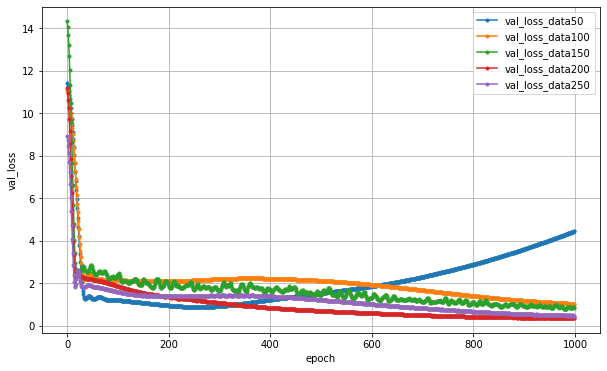

In [26]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

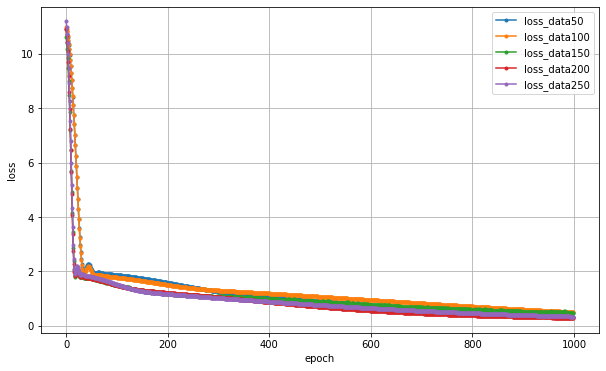

In [27]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [29]:
print(min_val_loss_array)

[0.8708097338676453, 1.0188617706298828, 0.787213921546936, 0.3547493517398834, 0.4617607593536377]


In [30]:
for i in range(len(val_loss_array)):
    print(val_loss_array[i][-1])

4.442096710205078
1.0188617706298828
0.8305816650390625
0.3547493517398834
0.4617607593536377


In [31]:
## データについて

### データファイルのpath
no_hole_path = './../vibration_simulation/vibration_data/no_hole_data.csv'
one_hole_path = './../vibration_simulation/vibration_data/one_hole_data.csv'
four_holes_path = './../vibration_simulation/vibration_data/four_holes_data.csv'
nine_holes_path = './../vibration_simulation/vibration_data/nine_holes_data.csv'
sixteen_holes_path = './../vibration_simulation/vibration_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../vibration_simulation/vibration_data/twentyfive_holes_data.csv'

### 入力データと正解データ
size_x_data_list1 = []
size_x_data_list2 = []
size_x_data_list3 = []
y_size_data_array = []
no_hole_data1 = []
one_one_one1 = []
one_two_two1 = []
one_three_three1 = []
one_four_four1 = []
one_five_five1 = []
two_one_two1 = []
two_two_three1 = []
two_three_four1 = []
two_four_five1 = []
two_five_one1 = []
three_one_three1 = []
three_two_four1 = []
three_three_five1 = []
three_four_one1 = []
three_five_two1 = []
four_one_four1 = []
four_two_five1 = []
four_three_one1 = []
four_four_two1 = []
four_five_three1 = []
five_one_five1 = []
five_two_one1 = []
five_three_two1 = []
five_four_three1 = []
five_five_four1 = []
no_hole_data2 = []
one_one_one2 = []
one_two_two2 = []
one_three_three2 = []
one_four_four2 = []
one_five_five2 = []
two_one_two2 = []
two_two_three2 = []
two_three_four2 = []
two_four_five2 = []
two_five_one2 = []
three_one_three2 = []
three_two_four2 = []
three_three_five2 = []
three_four_one2 = []
three_five_two2 = []
four_one_four2 = []
four_two_five2 = []
four_three_one2 = []
four_four_two2 = []
four_five_three2 = []
five_one_five2 = []
five_two_one2 = []
five_three_two2 = []
five_four_three2 = []
five_five_four2 = []
no_hole_data3 = []
one_one_one3 = []
one_two_two3 = []
one_three_three3 = []
one_four_four3 = []
one_five_five3 = []
two_one_two3 = []
two_two_three3 = []
two_three_four3 = []
two_four_five3 = []
two_five_one3 = []
three_one_three3 = []
three_two_four3 = []
three_three_five3 = []
three_four_one3 = []
three_five_two3 = []
four_one_four3 = []
four_two_five3 = []
four_three_one3 = []
four_four_two3 = []
four_five_three3 = []
five_one_five3 = []
five_two_one3 = []
five_three_two3 = []
five_four_three3 = []
five_five_four3 = []
rep_freq_array1 = []
rep_freq_array2 = []
rep_freq_array3 = []

### ファイル読み込み

#### 欠陥がない場合のデータ
with open(no_hole_path) as f:
    for line in f:
        data_array = line.split(' ')
        no_hole_data1 = data_array[0:1251]
        no_hole_data2 = data_array[1251:2502]
        no_hole_data3 = data_array[2502:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one1.append(data_array[3:1254])
        one_one_one2.append(data_array[1254:2505])
        one_one_one3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two1.append(data_array[3:1254])
        one_two_two2.append(data_array[1254:2505])
        one_two_two3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three1.append(data_array[3:1254])
        one_three_three2.append(data_array[1254:2505])
        one_three_three3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four1.append(data_array[3:1254])
        one_four_four2.append(data_array[1254:2505])
        one_four_four3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five1.append(data_array[3:1254])
        one_five_five2.append(data_array[1254:2505])
        one_five_five3.append(data_array[2505:-1])
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two1.append(data_array[3:1254])
        two_one_two2.append(data_array[1254:2505])
        two_one_two3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three1.append(data_array[3:1254])
        two_two_three2.append(data_array[1254:2505])
        two_two_three3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four1.append(data_array[3:1254])
        two_three_four2.append(data_array[1254:2505])
        two_three_four3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five1.append(data_array[3:1254])
        two_four_five2.append(data_array[1254:2505])
        two_four_five3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one1.append(data_array[3:1254])
        two_five_one2.append(data_array[1254:2505])
        two_five_one3.append(data_array[2505:-1])
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three1.append(data_array[3:1254])
        three_one_three2.append(data_array[1254:2505])
        three_one_three3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four1.append(data_array[3:1254])
        three_two_four2.append(data_array[1254:2505])
        three_two_four3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five1.append(data_array[3:1254])
        three_three_five2.append(data_array[1254:2505])
        three_three_five3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one1.append(data_array[3:1254])
        three_four_one2.append(data_array[1254:2505])
        three_four_one3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two1.append(data_array[3:1254])
        three_five_two2.append(data_array[1254:2505])
        three_five_two3.append(data_array[2505:-1])
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four1.append(data_array[3:1254])
        four_one_four2.append(data_array[1254:2505])
        four_one_four3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five1.append(data_array[3:1254])
        four_two_five2.append(data_array[1254:2505])
        four_two_five3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one1.append(data_array[3:1254])
        four_three_one2.append(data_array[1254:2505])
        four_three_one3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two1.append(data_array[3:1254])
        four_four_two2.append(data_array[1254:2505])
        four_four_two3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three1.append(data_array[3:1254])
        four_five_three2.append(data_array[1254:2505])
        four_five_three3.append(data_array[2505:-1])
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(' ')
    position = np.array(data_array[1:3], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five1.append(data_array[3:1254])
        five_one_five2.append(data_array[1254:2505])
        five_one_five3.append(data_array[2505:-1])
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one1.append(data_array[3:1254])
        five_two_one2.append(data_array[1254:2505])
        five_two_one3.append(data_array[2505:-1])
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two1.append(data_array[3:1254])
        five_three_two2.append(data_array[1254:2505])
        five_three_two3.append(data_array[2505:-1])
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three1.append(data_array[3:1254])
        five_four_three2.append(data_array[1254:2505])
        five_four_three3.append(data_array[2505:-1])
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four1.append(data_array[3:1254])
        five_five_four2.append(data_array[1254:2505])
        five_five_four3.append(data_array[2505:-1])
### 利用データの決定
for j in range(20):
    size_x_data1 = []
    size_x_data2 = []
    size_x_data3 = []
    size_y_data = []
#     position_x_data = []
#     position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_one_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_one_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_one_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_two_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_two_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_two_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_three_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_three_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_three_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_four_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_four_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_four_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = one_five_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = one_five_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = one_five_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(1)
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_one_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_one_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_one_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_two_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_two_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_two_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_three_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_three_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_three_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_four_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_four_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_four_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = two_five_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = two_five_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = two_five_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(2)
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_one_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_one_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_one_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_two_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_two_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_two_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_three_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_three_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_three_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_four_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_four_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_four_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = three_five_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = three_five_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = three_five_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(3)
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_one_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_one_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_one_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_two_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_two_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_two_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_three_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_three_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_three_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_four_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_four_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_four_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = four_five_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = four_five_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = four_five_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(4)
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_one_five1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_one_five2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_one_five3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_two_one1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_two_one2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_two_one3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_three_two1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_three_two2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_three_two3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_four_three1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_four_three2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_four_three3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four1)):
        index.append(i)
    data_count = 2
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array1 = five_five_four1[i]
        size_x_data1.append(data_array1)
        data_array2 = five_five_four2[i]
        size_x_data2.append(data_array2)
        data_array3 = five_five_four3[i]
        size_x_data3.append(data_array3)
        size_y_data.append(5)

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data1 = np.array(no_hole_data1, dtype=float)
    no_hole_data2 = np.array(no_hole_data2, dtype=float)
    no_hole_data3 = np.array(no_hole_data3, dtype=float)
    size_x_data1 = np.array(size_x_data1, dtype=float)
    size_x_data2 = np.array(size_x_data2, dtype=float)
    size_x_data3 = np.array(size_x_data3, dtype=float)
    size_y_data = np.array(size_y_data, dtype=float)
    
    size_x_data_list1.append(size_x_data1)
    size_x_data_list2.append(size_x_data2)
    size_x_data_list3.append(size_x_data3)
    y_size_data_array.append(size_y_data)

#各振動を高速フーリエ変換→代表周波数のリスト作成→該当周波数のみの振幅を入力とする
## 欠陥なしデータ
F_no_hole1 = np.fft.fft(no_hole_data1)
N = len(no_hole_data1)
Amp_no_hole1 = np.abs(F_no_hole1/(N/2))
maxid_no_hole1 = signal.argrelmax(Amp_no_hole1[1:int(N/2)], order=1)
rep_index_no_hole1 = maxid_no_hole1[0]
for i in range(len(rep_index_no_hole1)):
    if (rep_index_no_hole1[i] in rep_freq_array1) == False:
        rep_freq_array1.append(rep_index_no_hole1[i])
F_no_hole2 = np.fft.fft(no_hole_data2)
Amp_no_hole2 = np.abs(F_no_hole2/(N/2))
maxid_no_hole2 = signal.argrelmax(Amp_no_hole2[1:int(N/2)], order=1)
rep_index_no_hole2 = maxid_no_hole2[0]
for i in range(len(rep_index_no_hole2)):
    if (rep_index_no_hole2[i] in rep_freq_array2) == False:
        rep_freq_array2.append(rep_index_no_hole2[i])
F_no_hole3 = np.fft.fft(no_hole_data3)
Amp_no_hole3 = np.abs(F_no_hole3/(N/2))
maxid_no_hole3 = signal.argrelmax(Amp_no_hole3[1:int(N/2)], order=1)
rep_index_no_hole3 = maxid_no_hole3[0]
for i in range(len(rep_index_no_hole3)):
    if (rep_index_no_hole3[i] in rep_freq_array3) == False:
        rep_freq_array3.append(rep_index_no_hole3[i])
# 欠陥ありデータ
N = len(no_hole_data1)
fft_size_x_data_array1 = []
fft_size_x_data_array2 = []
fft_size_x_data_array3 = []
for i in range(len(size_x_data_list1)):
    fft_size_x_data1 = []
    fft_size_x_data2 = []
    fft_size_x_data3 = []
    size_x_data1 = size_x_data_list1[i]
    size_x_data2 = size_x_data_list2[i]
    size_x_data3 = size_x_data_list3[i]
    ### 観測点1
    for j in range(len(size_x_data1)):
        F = np.fft.fft(size_x_data1[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data1.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array1) == False:
                rep_freq_array1.append(rep_index[k])
    ### 観測点2
    for j in range(len(size_x_data2)):
        F = np.fft.fft(size_x_data2[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data2.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array2) == False:
                rep_freq_array2.append(rep_index[k])
    ### 観測点3
    for j in range(len(size_x_data3)):
        F = np.fft.fft(size_x_data3[j])
        Amp = np.abs(F/(N/2))
        fft_size_x_data3.append(Amp)
        maxid = signal.argrelmax(Amp[1:int(N/2)], order=1)
        rep_index = maxid[0]
        for k in range(len(rep_index)):
            if (rep_index[k] in rep_freq_array3) == False:
                rep_freq_array3.append(rep_index[k])
    fft_size_x_data_array1.append(fft_size_x_data1)
    fft_size_x_data_array2.append(fft_size_x_data2)
    fft_size_x_data_array3.append(fft_size_x_data3)
#入力値の更新(振動→代表周波数の振幅)
x_size_data_array1 = []
x_size_data_array2 = []
x_size_data_array3 = []
for i in range(len(size_x_data_list1)):
    ## 観測点1
    fft_size_x_data1 = fft_size_x_data_array1[i]
    size_x_data1 = []
    for j in range(len(fft_size_x_data1)):
        rep_amp = []
        for k in range(len(rep_freq_array1)):
            rep_amp.append(fft_size_x_data1[j][k]-Amp_no_hole1[k])
        size_x_data1.append(rep_amp)
    x_size_data_array1.append(size_x_data1)
    ## 観測点2
    fft_size_x_data2 = fft_size_x_data_array2[i]
    size_x_data2 = []
    for j in range(len(fft_size_x_data2)):
        rep_amp = []
        for k in range(len(rep_freq_array2)):
            rep_amp.append(fft_size_x_data2[j][k]-Amp_no_hole2[k])
        size_x_data2.append(rep_amp)
    x_size_data_array2.append(size_x_data2)
    ## 観測点3
    fft_size_x_data3 = fft_size_x_data_array3[i]
    size_x_data3 = []
    for j in range(len(fft_size_x_data3)):
        rep_amp = []
        for k in range(len(rep_freq_array3)):
            rep_amp.append(fft_size_x_data3[j][k]-Amp_no_hole3[k])
        size_x_data3.append(rep_amp)
    x_size_data_array3.append(size_x_data3)

    
## データの加工
###最大値で割る
max_displacement1 = 0
max_displacement2 = 0
max_displacement3 = 0
for i in range(len(x_size_data_array1)):
    x_size_data1 = x_size_data_array1[i]
    for j in range(len(x_size_data1)):
        displacement1 = x_size_data1[j]
        for k in range(len(displacement1)):
            if max_displacement1 < displacement1[k]:
                max_displacement1 = displacement1[k]
for i in range(len(x_size_data_array2)):
    x_size_data2 = x_size_data_array2[i]
    for j in range(len(x_size_data2)):
        displacement2 = x_size_data2[j]
        for k in range(len(displacement2)):
            if max_displacement2 < displacement2[k]:
                max_displacement2 = displacement2[k]
for i in range(len(x_size_data_array3)):
    x_size_data3 = x_size_data_array3[i]
    for j in range(len(x_size_data3)):
        displacement3 = x_size_data3[j]
        for k in range(len(displacement3)):
            if max_displacement3 < displacement3[k]:
                max_displacement3 = displacement3[k]
for i in range(len(x_size_data_array1)):
    for j in range(len(x_size_data_array1[i])):
        for k in range(len(x_size_data_array1[i][j])):
            x_size_data_array1[i][j][k] = x_size_data_array1[i][j][k]/max_displacement1
for i in range(len(x_size_data_array2)):
    for j in range(len(x_size_data_array2[i])):
        for k in range(len(x_size_data_array2[i][j])):
            x_size_data_array2[i][j][k] = x_size_data_array2[i][j][k]/max_displacement2
for i in range(len(x_size_data_array3)):
    for j in range(len(x_size_data_array3[i])):
        for k in range(len(x_size_data_array3[i][j])):
            x_size_data_array3[i][j][k] = x_size_data_array3[i][j][k]/max_displacement3

### train用とtest用に分割(9:1)
x_size_train_array1 = []
x_size_train_array2 = []
x_size_train_array3 = []
x_size_test_array1 = []
x_size_test_array2 = []
x_size_test_array3 = []
y_size_train_array = []
y_size_test_array = []
for i in range(20):
    x_size_train1, x_size_test1, x_size_train2, x_size_test2, x_size_train3, x_size_test3, y_size_train, y_size_test = train_test_split(x_size_data_array1[i], x_size_data_array2[i], x_size_data_array3[i], y_size_data_array[i], test_size=0.10)
    x_size_train_array1.append(np.array(x_size_train1))
    x_size_train_array2.append(np.array(x_size_train2))
    x_size_train_array3.append(np.array(x_size_train3))
    x_size_test_array1.append(np.array(x_size_test1))
    x_size_test_array2.append(np.array(x_size_test2))
    x_size_test_array3.append(np.array(x_size_test3))
    y_size_train_array.append(np.array(y_size_train))
    y_size_test_array.append(np.array(y_size_test))

In [41]:
# 大きさ推定のモデル
model_size_array = []

for i in range(20):
    # 入力を定義
    input1 = Input(shape=(35,1))
    input2 = Input(shape=(51,1))
    input3 = Input(shape=(41,1))

    # 入力1から結合前まで
    x = Conv1D(32, 3, padding='same', activation='tanh')(input1)
    x = MaxPooling1D(2, padding='same')(x)
    x = Model(inputs=input1, outputs=x)
    # 入力2から結合前まで
    y = Conv1D(32, 3, padding='same', activation='tanh')(input2)
    y = MaxPooling1D(2, padding='same')(y)
    y = Model(inputs=input2, outputs=y)
    # 入力3から結合前まで
    z = Conv1D(32, 3, padding='same', activation='tanh')(input3)
    z = MaxPooling1D(2, padding='same')(z)
    z = Model(inputs=input3, outputs=z)

    # 結合
    combined = concatenate([x.output, y.output, z.output], axis = 1)

    # 密結合
    cnn = Flatten()(combined)
    cnn = Dense(1, activation="linear")(cnn)

    # モデル定義とコンパイル
    cnn_size_model = Model(inputs=[x.input, y.input, z.input], outputs=cnn)
    cnn_size_model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model_size_array.append(cnn_size_model)

In [42]:
# 学習ループ
history_size_array = []
for i in range(len(model_size_array)):
    epochs = 1000
    batch_size = 128
    history_size_array.append(model_size_array[i].fit([x_size_train_array1[i], x_size_train_array2[i], x_size_train_array3[i]], y_size_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=([x_size_test_array1[i], x_size_test_array2[i], x_size_test_array3[i]], y_size_test_array[i])))

Epoch 1/1000
1/1 [==============================] - 0s 125ms/step - loss: 11.1808 - acc: 0.0000e+00 - val_loss: 9.3466 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 11.0875 - acc: 0.0000e+00 - val_loss: 9.2643 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 57ms/step - loss: 10.9857 - acc: 0.0000e+00 - val_loss: 9.1703 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 62ms/step - loss: 10.8704 - acc: 0.0000e+00 - val_loss: 9.0629 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 117ms/step - loss: 10.7392 - acc: 0.0000e+00 - val_loss: 8.9403 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 79ms/step - loss: 10.5903 - acc: 0.0000e+00 - val_loss: 8.8015 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 47ms/step - loss: 10.4223 - acc: 0.0000e+00 - val_loss: 8.6457 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [

1/1 [==============================] - 0s 50ms/step - loss: 1.8239 - acc: 0.1778 - val_loss: 2.6014 - val_acc: 0.4000
Epoch 63/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.8284 - acc: 0.1778 - val_loss: 2.5945 - val_acc: 0.4000
Epoch 64/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8315 - acc: 0.1778 - val_loss: 2.5901 - val_acc: 0.4000
Epoch 65/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8330 - acc: 0.1778 - val_loss: 2.5879 - val_acc: 0.4000
Epoch 66/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8326 - acc: 0.1778 - val_loss: 2.5875 - val_acc: 0.4000
Epoch 67/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8304 - acc: 0.1778 - val_loss: 2.5889 - val_acc: 0.4000
Epoch 68/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8268 - acc: 0.1778 - val_loss: 2.5920 - val_acc: 0.4000
Epoch 69/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.8219 - acc: 0.

Epoch 124/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7004 - acc: 0.1778 - val_loss: 2.6045 - val_acc: 0.4000
Epoch 125/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6983 - acc: 0.1778 - val_loss: 2.6015 - val_acc: 0.4000
Epoch 126/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6962 - acc: 0.1778 - val_loss: 2.5984 - val_acc: 0.4000
Epoch 127/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6941 - acc: 0.1778 - val_loss: 2.5952 - val_acc: 0.4000
Epoch 128/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6920 - acc: 0.1778 - val_loss: 2.5918 - val_acc: 0.4000
Epoch 129/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6898 - acc: 0.1778 - val_loss: 2.5883 - val_acc: 0.4000
Epoch 130/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6876 - acc: 0.1778 - val_loss: 2.5849 - val_acc: 0.4000
Epoch 131/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.5450 - acc: 0.1778 - val_loss: 2.4074 - val_acc: 0.4000
Epoch 186/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5420 - acc: 0.1778 - val_loss: 2.4036 - val_acc: 0.4000
Epoch 187/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5390 - acc: 0.1778 - val_loss: 2.3997 - val_acc: 0.4000
Epoch 188/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5360 - acc: 0.1778 - val_loss: 2.3958 - val_acc: 0.4000
Epoch 189/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5330 - acc: 0.1778 - val_loss: 2.3919 - val_acc: 0.4000
Epoch 190/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5300 - acc: 0.1778 - val_loss: 2.3879 - val_acc: 0.4000
Epoch 191/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5269 - acc: 0.1778 - val_loss: 2.3839 - val_acc: 0.4000
Epoch 192/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5239 - 

Epoch 247/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3486 - acc: 0.1778 - val_loss: 2.1404 - val_acc: 0.4000
Epoch 248/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3454 - acc: 0.1778 - val_loss: 2.1359 - val_acc: 0.4000
Epoch 249/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3423 - acc: 0.1778 - val_loss: 2.1314 - val_acc: 0.4000
Epoch 250/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3392 - acc: 0.1778 - val_loss: 2.1269 - val_acc: 0.4000
Epoch 251/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3360 - acc: 0.1778 - val_loss: 2.1224 - val_acc: 0.4000
Epoch 252/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3329 - acc: 0.1778 - val_loss: 2.1179 - val_acc: 0.4000
Epoch 253/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.3298 - acc: 0.1778 - val_loss: 2.1135 - val_acc: 0.4000
Epoch 254/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 47ms/step - loss: 1.1759 - acc: 0.1778 - val_loss: 1.8863 - val_acc: 0.4000
Epoch 309/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1735 - acc: 0.1778 - val_loss: 1.8826 - val_acc: 0.4000
Epoch 310/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1711 - acc: 0.1778 - val_loss: 1.8790 - val_acc: 0.4000
Epoch 311/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1688 - acc: 0.1778 - val_loss: 1.8754 - val_acc: 0.4000
Epoch 312/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1664 - acc: 0.1778 - val_loss: 1.8718 - val_acc: 0.4000
Epoch 313/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.1641 - acc: 0.1778 - val_loss: 1.8683 - val_acc: 0.4000
Epoch 314/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1617 - acc: 0.1778 - val_loss: 1.8648 - val_acc: 0.4000
Epoch 315/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1594 - 

Epoch 370/1000
1/1 [==============================] - 0s 69ms/step - loss: 1.0511 - acc: 0.1778 - val_loss: 1.7053 - val_acc: 0.4000
Epoch 371/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.0494 - acc: 0.1778 - val_loss: 1.7031 - val_acc: 0.4000
Epoch 372/1000
1/1 [==============================] - 0s 63ms/step - loss: 1.0477 - acc: 0.1778 - val_loss: 1.7009 - val_acc: 0.4000
Epoch 373/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.0460 - acc: 0.1778 - val_loss: 1.6987 - val_acc: 0.4000
Epoch 374/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.0443 - acc: 0.1778 - val_loss: 1.6966 - val_acc: 0.4000
Epoch 375/1000
1/1 [==============================] - 0s 53ms/step - loss: 1.0426 - acc: 0.1778 - val_loss: 1.6944 - val_acc: 0.4000
Epoch 376/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.0410 - acc: 0.1778 - val_loss: 1.6923 - val_acc: 0.4000
Epoch 377/1000
1/1 [==============================] - 0s 49ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.9565 - acc: 0.1778 - val_loss: 1.5981 - val_acc: 0.4000
Epoch 432/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9550 - acc: 0.1778 - val_loss: 1.5967 - val_acc: 0.4000
Epoch 433/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9536 - acc: 0.1778 - val_loss: 1.5953 - val_acc: 0.4000
Epoch 434/1000
1/1 [==============================] - 0s 356ms/step - loss: 0.9522 - acc: 0.1778 - val_loss: 1.5939 - val_acc: 0.4000
Epoch 435/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9508 - acc: 0.1778 - val_loss: 1.5925 - val_acc: 0.4000
Epoch 436/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9494 - acc: 0.1778 - val_loss: 1.5911 - val_acc: 0.4000
Epoch 437/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.9480 - acc: 0.1778 - val_loss: 1.5897 - val_acc: 0.4000
Epoch 438/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9467 -

Epoch 493/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8756 - acc: 0.1778 - val_loss: 1.5236 - val_acc: 0.4000
Epoch 494/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8744 - acc: 0.1778 - val_loss: 1.5225 - val_acc: 0.4000
Epoch 495/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8732 - acc: 0.1778 - val_loss: 1.5215 - val_acc: 0.4000
Epoch 496/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8720 - acc: 0.1778 - val_loss: 1.5205 - val_acc: 0.4000
Epoch 497/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8708 - acc: 0.1778 - val_loss: 1.5195 - val_acc: 0.4000
Epoch 498/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8696 - acc: 0.1778 - val_loss: 1.5185 - val_acc: 0.4000
Epoch 499/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8684 - acc: 0.1778 - val_loss: 1.5175 - val_acc: 0.4000
Epoch 500/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 44ms/step - loss: 0.8065 - acc: 0.1778 - val_loss: 1.4704 - val_acc: 0.4000
Epoch 555/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8054 - acc: 0.1778 - val_loss: 1.4697 - val_acc: 0.4000
Epoch 556/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8043 - acc: 0.1778 - val_loss: 1.4690 - val_acc: 0.4000
Epoch 557/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8033 - acc: 0.1778 - val_loss: 1.4683 - val_acc: 0.4000
Epoch 558/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8022 - acc: 0.1778 - val_loss: 1.4676 - val_acc: 0.4000
Epoch 559/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8011 - acc: 0.1778 - val_loss: 1.4669 - val_acc: 0.4000
Epoch 560/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8001 - acc: 0.1778 - val_loss: 1.4662 - val_acc: 0.4000
Epoch 561/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.7990 - 

Epoch 616/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7427 - acc: 0.1778 - val_loss: 1.4327 - val_acc: 0.4000
Epoch 617/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7417 - acc: 0.1778 - val_loss: 1.4322 - val_acc: 0.4000
Epoch 618/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7407 - acc: 0.1778 - val_loss: 1.4317 - val_acc: 0.4000
Epoch 619/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7398 - acc: 0.1778 - val_loss: 1.4312 - val_acc: 0.4000
Epoch 620/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7388 - acc: 0.1778 - val_loss: 1.4308 - val_acc: 0.4000
Epoch 621/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7378 - acc: 0.1778 - val_loss: 1.4303 - val_acc: 0.4000
Epoch 622/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7368 - acc: 0.1778 - val_loss: 1.4298 - val_acc: 0.4000
Epoch 623/1000
1/1 [==============================] - 0s 47ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.6835 - acc: 0.1778 - val_loss: 1.4077 - val_acc: 0.4000
Epoch 678/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6826 - acc: 0.1778 - val_loss: 1.4074 - val_acc: 0.4000
Epoch 679/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6816 - acc: 0.1778 - val_loss: 1.4070 - val_acc: 0.4000
Epoch 680/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6807 - acc: 0.1778 - val_loss: 1.4067 - val_acc: 0.4000
Epoch 681/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6797 - acc: 0.1778 - val_loss: 1.4064 - val_acc: 0.4000
Epoch 682/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6787 - acc: 0.1778 - val_loss: 1.4061 - val_acc: 0.4000
Epoch 683/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6778 - acc: 0.1778 - val_loss: 1.4057 - val_acc: 0.4000
Epoch 684/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6768 - 

Epoch 739/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6237 - acc: 0.1778 - val_loss: 1.3903 - val_acc: 0.4000
Epoch 740/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6227 - acc: 0.1778 - val_loss: 1.3900 - val_acc: 0.4000
Epoch 741/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6217 - acc: 0.1778 - val_loss: 1.3898 - val_acc: 0.4000
Epoch 742/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6208 - acc: 0.1778 - val_loss: 1.3895 - val_acc: 0.4000
Epoch 743/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6198 - acc: 0.1778 - val_loss: 1.3893 - val_acc: 0.4000
Epoch 744/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6188 - acc: 0.1778 - val_loss: 1.3891 - val_acc: 0.4000
Epoch 745/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6179 - acc: 0.1778 - val_loss: 1.3888 - val_acc: 0.4000
Epoch 746/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 0.5640 - acc: 0.1778 - val_loss: 1.3780 - val_acc: 0.4000
Epoch 801/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5630 - acc: 0.1778 - val_loss: 1.3779 - val_acc: 0.4000
Epoch 802/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5620 - acc: 0.1778 - val_loss: 1.3777 - val_acc: 0.4000
Epoch 803/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5610 - acc: 0.1778 - val_loss: 1.3776 - val_acc: 0.4000
Epoch 804/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5600 - acc: 0.1778 - val_loss: 1.3774 - val_acc: 0.4000
Epoch 805/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5590 - acc: 0.1778 - val_loss: 1.3773 - val_acc: 0.4000
Epoch 806/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5580 - acc: 0.1778 - val_loss: 1.3771 - val_acc: 0.4000
Epoch 807/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5570 - 

Epoch 862/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5020 - acc: 0.1778 - val_loss: 1.3721 - val_acc: 0.4000
Epoch 863/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5010 - acc: 0.1778 - val_loss: 1.3721 - val_acc: 0.4000
Epoch 864/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5000 - acc: 0.1778 - val_loss: 1.3720 - val_acc: 0.4000
Epoch 865/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4990 - acc: 0.1778 - val_loss: 1.3719 - val_acc: 0.4000
Epoch 866/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4980 - acc: 0.1778 - val_loss: 1.3718 - val_acc: 0.4000
Epoch 867/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4971 - acc: 0.1778 - val_loss: 1.3718 - val_acc: 0.4000
Epoch 868/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4961 - acc: 0.1778 - val_loss: 1.3717 - val_acc: 0.4000
Epoch 869/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 0.4424 - acc: 0.1778 - val_loss: 1.3700 - val_acc: 0.4000
Epoch 924/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4414 - acc: 0.1778 - val_loss: 1.3700 - val_acc: 0.4000
Epoch 925/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4405 - acc: 0.1778 - val_loss: 1.3700 - val_acc: 0.4000
Epoch 926/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4395 - acc: 0.1778 - val_loss: 1.3701 - val_acc: 0.4000
Epoch 927/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4385 - acc: 0.1778 - val_loss: 1.3701 - val_acc: 0.4000
Epoch 928/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4376 - acc: 0.1778 - val_loss: 1.3701 - val_acc: 0.4000
Epoch 929/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4366 - acc: 0.1778 - val_loss: 1.3701 - val_acc: 0.4000
Epoch 930/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4357 - 

Epoch 985/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3840 - acc: 0.1778 - val_loss: 1.3714 - val_acc: 0.4000
Epoch 986/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3831 - acc: 0.1778 - val_loss: 1.3714 - val_acc: 0.4000
Epoch 987/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.3821 - acc: 0.1778 - val_loss: 1.3715 - val_acc: 0.4000
Epoch 988/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3812 - acc: 0.1778 - val_loss: 1.3716 - val_acc: 0.4000
Epoch 989/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.3803 - acc: 0.1778 - val_loss: 1.3716 - val_acc: 0.4000
Epoch 990/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3794 - acc: 0.1778 - val_loss: 1.3717 - val_acc: 0.4000
Epoch 991/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3785 - acc: 0.1778 - val_loss: 1.3718 - val_acc: 0.4000
Epoch 992/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 2.1783 - acc: 0.2222 - val_loss: 1.5068 - val_acc: 0.0000e+00
Epoch 46/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1606 - acc: 0.2222 - val_loss: 1.5287 - val_acc: 0.0000e+00
Epoch 47/1000
1/1 [==============================] - 0s 31ms/step - loss: 2.1307 - acc: 0.2222 - val_loss: 1.5613 - val_acc: 0.0000e+00
Epoch 48/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0925 - acc: 0.2222 - val_loss: 1.6046 - val_acc: 0.0000e+00
Epoch 49/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0501 - acc: 0.2222 - val_loss: 1.6586 - val_acc: 0.0000e+00
Epoch 50/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0071 - acc: 0.2222 - val_loss: 1.7227 - val_acc: 0.0000e+00
Epoch 51/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9666 - acc: 0.2222 - val_loss: 1.7959 - val_acc: 0.0000e+00
Epoch 52/1000
1/1 [==============================] - 0s 35ms/s

1/1 [==============================] - 0s 32ms/step - loss: 1.7266 - acc: 0.2222 - val_loss: 2.3256 - val_acc: 0.0000e+00
Epoch 106/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7233 - acc: 0.2222 - val_loss: 2.3242 - val_acc: 0.0000e+00
Epoch 107/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7200 - acc: 0.2222 - val_loss: 2.3216 - val_acc: 0.0000e+00
Epoch 108/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7167 - acc: 0.2222 - val_loss: 2.3182 - val_acc: 0.0000e+00
Epoch 109/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7133 - acc: 0.2222 - val_loss: 2.3141 - val_acc: 0.0000e+00
Epoch 110/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7099 - acc: 0.2222 - val_loss: 2.3096 - val_acc: 0.0000e+00
Epoch 111/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7065 - acc: 0.2222 - val_loss: 2.3049 - val_acc: 0.0000e+00
Epoch 112/1000
1/1 [==============================] - 0s

Epoch 165/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.4894 - acc: 0.2222 - val_loss: 2.4093 - val_acc: 0.0000e+00
Epoch 166/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.4849 - acc: 0.2222 - val_loss: 2.4127 - val_acc: 0.0000e+00
Epoch 167/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4804 - acc: 0.2222 - val_loss: 2.4161 - val_acc: 0.0000e+00
Epoch 168/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4758 - acc: 0.2222 - val_loss: 2.4195 - val_acc: 0.0000e+00
Epoch 169/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4713 - acc: 0.2222 - val_loss: 2.4227 - val_acc: 0.0000e+00
Epoch 170/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4667 - acc: 0.2222 - val_loss: 2.4260 - val_acc: 0.0000e+00
Epoch 171/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4622 - acc: 0.2222 - val_loss: 2.4291 - val_acc: 0.0000e+00
Epoch 172/1000
1/1 [=====================

Epoch 225/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.2217 - acc: 0.2222 - val_loss: 2.6269 - val_acc: 0.0000e+00
Epoch 226/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2176 - acc: 0.2222 - val_loss: 2.6310 - val_acc: 0.0000e+00
Epoch 227/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2136 - acc: 0.2222 - val_loss: 2.6351 - val_acc: 0.0000e+00
Epoch 228/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.2096 - acc: 0.2222 - val_loss: 2.6392 - val_acc: 0.0000e+00
Epoch 229/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2056 - acc: 0.2222 - val_loss: 2.6433 - val_acc: 0.0000e+00
Epoch 230/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2017 - acc: 0.2222 - val_loss: 2.6474 - val_acc: 0.0000e+00
Epoch 231/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1977 - acc: 0.2222 - val_loss: 2.6515 - val_acc: 0.0000e+00
Epoch 232/1000
1/1 [=====================

Epoch 285/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0244 - acc: 0.2222 - val_loss: 2.8605 - val_acc: 0.0000e+00
Epoch 286/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0219 - acc: 0.2222 - val_loss: 2.8639 - val_acc: 0.0000e+00
Epoch 287/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0193 - acc: 0.2222 - val_loss: 2.8672 - val_acc: 0.0000e+00
Epoch 288/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0169 - acc: 0.2222 - val_loss: 2.8706 - val_acc: 0.0000e+00
Epoch 289/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0144 - acc: 0.2222 - val_loss: 2.8738 - val_acc: 0.0000e+00
Epoch 290/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0119 - acc: 0.2222 - val_loss: 2.8771 - val_acc: 0.0000e+00
Epoch 291/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0095 - acc: 0.2222 - val_loss: 2.8803 - val_acc: 0.0000e+00
Epoch 292/1000
1/1 [=====================

Epoch 345/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8995 - acc: 0.2222 - val_loss: 3.0151 - val_acc: 0.0000e+00
Epoch 346/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8977 - acc: 0.2222 - val_loss: 3.0168 - val_acc: 0.0000e+00
Epoch 347/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8960 - acc: 0.2222 - val_loss: 3.0186 - val_acc: 0.0000e+00
Epoch 348/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8942 - acc: 0.2222 - val_loss: 3.0203 - val_acc: 0.0000e+00
Epoch 349/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8925 - acc: 0.2222 - val_loss: 3.0220 - val_acc: 0.0000e+00
Epoch 350/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8907 - acc: 0.2222 - val_loss: 3.0237 - val_acc: 0.0000e+00
Epoch 351/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8890 - acc: 0.2222 - val_loss: 3.0253 - val_acc: 0.0000e+00
Epoch 352/1000
1/1 [=====================

Epoch 405/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8012 - acc: 0.2222 - val_loss: 3.0887 - val_acc: 0.0000e+00
Epoch 406/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7997 - acc: 0.2222 - val_loss: 3.0895 - val_acc: 0.0000e+00
Epoch 407/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7981 - acc: 0.2222 - val_loss: 3.0903 - val_acc: 0.0000e+00
Epoch 408/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7966 - acc: 0.2222 - val_loss: 3.0911 - val_acc: 0.0000e+00
Epoch 409/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7951 - acc: 0.2222 - val_loss: 3.0918 - val_acc: 0.0000e+00
Epoch 410/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7935 - acc: 0.2222 - val_loss: 3.0926 - val_acc: 0.0000e+00
Epoch 411/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7920 - acc: 0.2222 - val_loss: 3.0934 - val_acc: 0.0000e+00
Epoch 412/1000
1/1 [=====================

Epoch 465/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7141 - acc: 0.2222 - val_loss: 3.1274 - val_acc: 0.0000e+00
Epoch 466/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7127 - acc: 0.2222 - val_loss: 3.1279 - val_acc: 0.0000e+00
Epoch 467/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7114 - acc: 0.2222 - val_loss: 3.1284 - val_acc: 0.0000e+00
Epoch 468/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7100 - acc: 0.2222 - val_loss: 3.1289 - val_acc: 0.0000e+00
Epoch 469/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7086 - acc: 0.2222 - val_loss: 3.1295 - val_acc: 0.0000e+00
Epoch 470/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7073 - acc: 0.2222 - val_loss: 3.1300 - val_acc: 0.0000e+00
Epoch 471/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7059 - acc: 0.2222 - val_loss: 3.1305 - val_acc: 0.0000e+00
Epoch 472/1000
1/1 [=====================

Epoch 525/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.6363 - acc: 0.2222 - val_loss: 3.1569 - val_acc: 0.0000e+00
Epoch 526/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6351 - acc: 0.2222 - val_loss: 3.1573 - val_acc: 0.0000e+00
Epoch 527/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6339 - acc: 0.2222 - val_loss: 3.1578 - val_acc: 0.0000e+00
Epoch 528/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6326 - acc: 0.2222 - val_loss: 3.1582 - val_acc: 0.0000e+00
Epoch 529/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6314 - acc: 0.2222 - val_loss: 3.1587 - val_acc: 0.0000e+00
Epoch 530/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6302 - acc: 0.2222 - val_loss: 3.1591 - val_acc: 0.0000e+00
Epoch 531/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6290 - acc: 0.2222 - val_loss: 3.1596 - val_acc: 0.0000e+00
Epoch 532/1000
1/1 [=====================

Epoch 585/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5656 - acc: 0.2222 - val_loss: 3.1809 - val_acc: 0.0000e+00
Epoch 586/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5645 - acc: 0.2222 - val_loss: 3.1813 - val_acc: 0.0000e+00
Epoch 587/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5634 - acc: 0.2222 - val_loss: 3.1816 - val_acc: 0.0000e+00
Epoch 588/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5623 - acc: 0.2222 - val_loss: 3.1820 - val_acc: 0.0000e+00
Epoch 589/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5612 - acc: 0.2222 - val_loss: 3.1824 - val_acc: 0.0000e+00
Epoch 590/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5601 - acc: 0.2222 - val_loss: 3.1828 - val_acc: 0.0000e+00
Epoch 591/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5590 - acc: 0.2222 - val_loss: 3.1832 - val_acc: 0.0000e+00
Epoch 592/1000
1/1 [=====================

Epoch 645/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5028 - acc: 0.2222 - val_loss: 3.2018 - val_acc: 0.0000e+00
Epoch 646/1000
1/1 [==============================] - 0s 287ms/step - loss: 0.5019 - acc: 0.2222 - val_loss: 3.2021 - val_acc: 0.0000e+00
Epoch 647/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5009 - acc: 0.2222 - val_loss: 3.2024 - val_acc: 0.0000e+00
Epoch 648/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4999 - acc: 0.2222 - val_loss: 3.2027 - val_acc: 0.0000e+00
Epoch 649/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4990 - acc: 0.2222 - val_loss: 3.2029 - val_acc: 0.0000e+00
Epoch 650/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4980 - acc: 0.2222 - val_loss: 3.2032 - val_acc: 0.0000e+00
Epoch 651/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4970 - acc: 0.2222 - val_loss: 3.2035 - val_acc: 0.0000e+00
Epoch 652/1000
1/1 [====================

Epoch 705/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4482 - acc: 0.2222 - val_loss: 3.2138 - val_acc: 0.0000e+00
Epoch 706/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4473 - acc: 0.2222 - val_loss: 3.2139 - val_acc: 0.0000e+00
Epoch 707/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4465 - acc: 0.2222 - val_loss: 3.2141 - val_acc: 0.0000e+00
Epoch 708/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4456 - acc: 0.2222 - val_loss: 3.2142 - val_acc: 0.0000e+00
Epoch 709/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4448 - acc: 0.2222 - val_loss: 3.2143 - val_acc: 0.0000e+00
Epoch 710/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4440 - acc: 0.2222 - val_loss: 3.2145 - val_acc: 0.0000e+00
Epoch 711/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4431 - acc: 0.2222 - val_loss: 3.2146 - val_acc: 0.0000e+00
Epoch 712/1000
1/1 [=====================

Epoch 765/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4005 - acc: 0.2222 - val_loss: 3.2215 - val_acc: 0.0000e+00
Epoch 766/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.3998 - acc: 0.2222 - val_loss: 3.2217 - val_acc: 0.0000e+00
Epoch 767/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3991 - acc: 0.2222 - val_loss: 3.2218 - val_acc: 0.0000e+00
Epoch 768/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3983 - acc: 0.2222 - val_loss: 3.2219 - val_acc: 0.0000e+00
Epoch 769/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3976 - acc: 0.2222 - val_loss: 3.2220 - val_acc: 0.0000e+00
Epoch 770/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3969 - acc: 0.2222 - val_loss: 3.2222 - val_acc: 0.0000e+00
Epoch 771/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3961 - acc: 0.2222 - val_loss: 3.2223 - val_acc: 0.0000e+00
Epoch 772/1000
1/1 [=====================

Epoch 825/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3590 - acc: 0.2222 - val_loss: 3.2282 - val_acc: 0.0000e+00
Epoch 826/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.3584 - acc: 0.2222 - val_loss: 3.2283 - val_acc: 0.0000e+00
Epoch 827/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3577 - acc: 0.2222 - val_loss: 3.2284 - val_acc: 0.0000e+00
Epoch 828/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3571 - acc: 0.2222 - val_loss: 3.2285 - val_acc: 0.0000e+00
Epoch 829/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3565 - acc: 0.2222 - val_loss: 3.2286 - val_acc: 0.0000e+00
Epoch 830/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3558 - acc: 0.2222 - val_loss: 3.2287 - val_acc: 0.0000e+00
Epoch 831/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3552 - acc: 0.2222 - val_loss: 3.2288 - val_acc: 0.0000e+00
Epoch 832/1000
1/1 [=====================

Epoch 885/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3226 - acc: 0.2222 - val_loss: 3.2350 - val_acc: 0.0000e+00
Epoch 886/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3220 - acc: 0.2222 - val_loss: 3.2351 - val_acc: 0.0000e+00
Epoch 887/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3214 - acc: 0.2222 - val_loss: 3.2353 - val_acc: 0.0000e+00
Epoch 888/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3209 - acc: 0.2222 - val_loss: 3.2355 - val_acc: 0.0000e+00
Epoch 889/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3203 - acc: 0.2222 - val_loss: 3.2357 - val_acc: 0.0000e+00
Epoch 890/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3197 - acc: 0.2222 - val_loss: 3.2358 - val_acc: 0.0000e+00
Epoch 891/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3192 - acc: 0.2222 - val_loss: 3.2360 - val_acc: 0.0000e+00
Epoch 892/1000
1/1 [=====================

Epoch 945/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2907 - acc: 0.2222 - val_loss: 3.2467 - val_acc: 0.0000e+00
Epoch 946/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.2902 - acc: 0.2222 - val_loss: 3.2469 - val_acc: 0.0000e+00
Epoch 947/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.2897 - acc: 0.2222 - val_loss: 3.2471 - val_acc: 0.0000e+00
Epoch 948/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2892 - acc: 0.2222 - val_loss: 3.2473 - val_acc: 0.0000e+00
Epoch 949/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2887 - acc: 0.2222 - val_loss: 3.2475 - val_acc: 0.0000e+00
Epoch 950/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.2882 - acc: 0.2222 - val_loss: 3.2478 - val_acc: 0.0000e+00
Epoch 951/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.2877 - acc: 0.2222 - val_loss: 3.2480 - val_acc: 0.0000e+00
Epoch 952/1000
1/1 [=====================

Epoch 5/1000
1/1 [==============================] - 0s 40ms/step - loss: 10.5114 - acc: 0.0000e+00 - val_loss: 11.4289 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.3801 - acc: 0.0000e+00 - val_loss: 11.2682 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 38ms/step - loss: 10.2309 - acc: 0.0000e+00 - val_loss: 11.0876 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 36ms/step - loss: 10.0630 - acc: 0.0000e+00 - val_loss: 10.8859 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.8756 - acc: 0.0000e+00 - val_loss: 10.6626 - val_acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 33ms/step - loss: 9.6680 - acc: 0.0000e+00 - val_loss: 10.4171 - val_acc: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - 0s 31ms/step - loss: 9.4401 - acc: 0.0000e+00 - val_loss: 10.1493 - val_acc: 0.0000e+00
Epoch 12/1000


1/1 [==============================] - 0s 42ms/step - loss: 1.9493 - acc: 0.2000 - val_loss: 1.8251 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9472 - acc: 0.2000 - val_loss: 1.8189 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9435 - acc: 0.2000 - val_loss: 1.8099 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9386 - acc: 0.2000 - val_loss: 1.7988 - val_acc: 0.2000
Epoch 70/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9329 - acc: 0.2000 - val_loss: 1.7862 - val_acc: 0.2000
Epoch 71/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9269 - acc: 0.2000 - val_loss: 1.7727 - val_acc: 0.2000
Epoch 72/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.9207 - acc: 0.2000 - val_loss: 1.7590 - val_acc: 0.2000
Epoch 73/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9149 - acc: 0.

Epoch 128/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8144 - acc: 0.2000 - val_loss: 1.6309 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8124 - acc: 0.2000 - val_loss: 1.6299 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8103 - acc: 0.2000 - val_loss: 1.6289 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8083 - acc: 0.2000 - val_loss: 1.6279 - val_acc: 0.2000
Epoch 132/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8063 - acc: 0.2000 - val_loss: 1.6269 - val_acc: 0.2000
Epoch 133/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8042 - acc: 0.2000 - val_loss: 1.6258 - val_acc: 0.2000
Epoch 134/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8021 - acc: 0.2000 - val_loss: 1.6247 - val_acc: 0.2000
Epoch 135/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.6646 - acc: 0.2000 - val_loss: 1.5304 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6616 - acc: 0.2000 - val_loss: 1.5287 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6587 - acc: 0.2000 - val_loss: 1.5270 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6558 - acc: 0.2000 - val_loss: 1.5253 - val_acc: 0.2000
Epoch 193/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6528 - acc: 0.2000 - val_loss: 1.5237 - val_acc: 0.2000
Epoch 194/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6499 - acc: 0.2000 - val_loss: 1.5220 - val_acc: 0.2000
Epoch 195/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6469 - acc: 0.2000 - val_loss: 1.5203 - val_acc: 0.2000
Epoch 196/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6439 - 

Epoch 251/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4686 - acc: 0.2000 - val_loss: 1.4530 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4653 - acc: 0.2000 - val_loss: 1.4526 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4621 - acc: 0.2000 - val_loss: 1.4522 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4588 - acc: 0.2000 - val_loss: 1.4519 - val_acc: 0.2000
Epoch 255/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4556 - acc: 0.2000 - val_loss: 1.4516 - val_acc: 0.2000
Epoch 256/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4524 - acc: 0.2000 - val_loss: 1.4513 - val_acc: 0.2000
Epoch 257/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4492 - acc: 0.2000 - val_loss: 1.4511 - val_acc: 0.2000
Epoch 258/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.2859 - acc: 0.2000 - val_loss: 1.4956 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2833 - acc: 0.2000 - val_loss: 1.4975 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2807 - acc: 0.2000 - val_loss: 1.4994 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2781 - acc: 0.2000 - val_loss: 1.5014 - val_acc: 0.2000
Epoch 316/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2756 - acc: 0.2000 - val_loss: 1.5033 - val_acc: 0.2000
Epoch 317/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2730 - acc: 0.2000 - val_loss: 1.5054 - val_acc: 0.2000
Epoch 318/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2705 - acc: 0.2000 - val_loss: 1.5074 - val_acc: 0.2000
Epoch 319/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2680 - 

Epoch 374/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1495 - acc: 0.2000 - val_loss: 1.6643 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1476 - acc: 0.2000 - val_loss: 1.6675 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1458 - acc: 0.2000 - val_loss: 1.6707 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1439 - acc: 0.2000 - val_loss: 1.6740 - val_acc: 0.2000
Epoch 378/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1421 - acc: 0.2000 - val_loss: 1.6772 - val_acc: 0.2000
Epoch 379/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1402 - acc: 0.2000 - val_loss: 1.6805 - val_acc: 0.2000
Epoch 380/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1384 - acc: 0.2000 - val_loss: 1.6837 - val_acc: 0.2000
Epoch 381/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 1.0459 - acc: 0.2000 - val_loss: 1.8435 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0444 - acc: 0.2000 - val_loss: 1.8460 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0428 - acc: 0.2000 - val_loss: 1.8485 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0412 - acc: 0.2000 - val_loss: 1.8509 - val_acc: 0.2000
Epoch 439/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0396 - acc: 0.2000 - val_loss: 1.8534 - val_acc: 0.2000
Epoch 440/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0380 - acc: 0.2000 - val_loss: 1.8559 - val_acc: 0.2000
Epoch 441/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0364 - acc: 0.2000 - val_loss: 1.8583 - val_acc: 0.2000
Epoch 442/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0349 - 

Epoch 497/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9494 - acc: 0.2000 - val_loss: 1.9611 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9478 - acc: 0.2000 - val_loss: 1.9625 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9463 - acc: 0.2000 - val_loss: 1.9639 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9448 - acc: 0.2000 - val_loss: 1.9652 - val_acc: 0.2000
Epoch 501/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9432 - acc: 0.2000 - val_loss: 1.9665 - val_acc: 0.2000
Epoch 502/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9417 - acc: 0.2000 - val_loss: 1.9678 - val_acc: 0.2000
Epoch 503/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9401 - acc: 0.2000 - val_loss: 1.9690 - val_acc: 0.2000
Epoch 504/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 0.8549 - acc: 0.2000 - val_loss: 2.0018 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8534 - acc: 0.2000 - val_loss: 2.0020 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8518 - acc: 0.2000 - val_loss: 2.0021 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8502 - acc: 0.2000 - val_loss: 2.0022 - val_acc: 0.2000
Epoch 562/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8487 - acc: 0.2000 - val_loss: 2.0022 - val_acc: 0.2000
Epoch 563/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8471 - acc: 0.2000 - val_loss: 2.0023 - val_acc: 0.2000
Epoch 564/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8456 - acc: 0.2000 - val_loss: 2.0024 - val_acc: 0.2000
Epoch 565/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8440 - 

Epoch 620/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7600 - acc: 0.2000 - val_loss: 1.9851 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7585 - acc: 0.2000 - val_loss: 1.9845 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7570 - acc: 0.2000 - val_loss: 1.9838 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7555 - acc: 0.2000 - val_loss: 1.9831 - val_acc: 0.2000
Epoch 624/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7541 - acc: 0.2000 - val_loss: 1.9824 - val_acc: 0.2000
Epoch 625/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.7526 - acc: 0.2000 - val_loss: 1.9818 - val_acc: 0.2000
Epoch 626/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7511 - acc: 0.2000 - val_loss: 1.9811 - val_acc: 0.2000
Epoch 627/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.6738 - acc: 0.2000 - val_loss: 1.9309 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6725 - acc: 0.2000 - val_loss: 1.9297 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6711 - acc: 0.2000 - val_loss: 1.9285 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6698 - acc: 0.2000 - val_loss: 1.9273 - val_acc: 0.2000
Epoch 685/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6685 - acc: 0.2000 - val_loss: 1.9261 - val_acc: 0.2000
Epoch 686/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6672 - acc: 0.2000 - val_loss: 1.9249 - val_acc: 0.2000
Epoch 687/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6659 - acc: 0.2000 - val_loss: 1.9237 - val_acc: 0.2000
Epoch 688/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6645 - 

Epoch 743/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5963 - acc: 0.2000 - val_loss: 1.8437 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5951 - acc: 0.2000 - val_loss: 1.8421 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.5940 - acc: 0.2000 - val_loss: 1.8405 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.5928 - acc: 0.2000 - val_loss: 1.8389 - val_acc: 0.2000
Epoch 747/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5917 - acc: 0.2000 - val_loss: 1.8373 - val_acc: 0.2000
Epoch 748/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5905 - acc: 0.2000 - val_loss: 1.8357 - val_acc: 0.2000
Epoch 749/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5894 - acc: 0.2000 - val_loss: 1.8341 - val_acc: 0.2000
Epoch 750/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.5298 - acc: 0.2000 - val_loss: 1.7466 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5288 - acc: 0.2000 - val_loss: 1.7451 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5278 - acc: 0.2000 - val_loss: 1.7436 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5267 - acc: 0.2000 - val_loss: 1.7421 - val_acc: 0.2000
Epoch 808/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5257 - acc: 0.2000 - val_loss: 1.7405 - val_acc: 0.2000
Epoch 809/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5247 - acc: 0.2000 - val_loss: 1.7390 - val_acc: 0.2000
Epoch 810/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5237 - acc: 0.2000 - val_loss: 1.7375 - val_acc: 0.2000
Epoch 811/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5227 - 

Epoch 866/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4704 - acc: 0.2000 - val_loss: 1.6508 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4695 - acc: 0.2000 - val_loss: 1.6495 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4686 - acc: 0.2000 - val_loss: 1.6483 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4677 - acc: 0.2000 - val_loss: 1.6470 - val_acc: 0.2000
Epoch 870/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4668 - acc: 0.2000 - val_loss: 1.6458 - val_acc: 0.2000
Epoch 871/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4659 - acc: 0.2000 - val_loss: 1.6446 - val_acc: 0.2000
Epoch 872/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.4651 - acc: 0.2000 - val_loss: 1.6434 - val_acc: 0.2000
Epoch 873/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.4183 - acc: 0.2000 - val_loss: 1.5841 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4175 - acc: 0.2000 - val_loss: 1.5832 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4167 - acc: 0.2000 - val_loss: 1.5824 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4159 - acc: 0.2000 - val_loss: 1.5815 - val_acc: 0.2000
Epoch 931/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4151 - acc: 0.2000 - val_loss: 1.5807 - val_acc: 0.2000
Epoch 932/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4143 - acc: 0.2000 - val_loss: 1.5798 - val_acc: 0.2000
Epoch 933/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4135 - acc: 0.2000 - val_loss: 1.5790 - val_acc: 0.2000
Epoch 934/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4127 - 

Epoch 989/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3708 - acc: 0.2000 - val_loss: 1.5505 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3701 - acc: 0.2000 - val_loss: 1.5503 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3694 - acc: 0.2000 - val_loss: 1.5502 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3687 - acc: 0.2000 - val_loss: 1.5500 - val_acc: 0.2000
Epoch 993/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.3679 - acc: 0.2000 - val_loss: 1.5498 - val_acc: 0.2000
Epoch 994/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3672 - acc: 0.2000 - val_loss: 1.5497 - val_acc: 0.2000
Epoch 995/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.3665 - acc: 0.2000 - val_loss: 1.5496 - val_acc: 0.2000
Epoch 996/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 2.0792 - acc: 0.2000 - val_loss: 2.2560 - val_acc: 0.2000
Epoch 51/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.0376 - acc: 0.2000 - val_loss: 2.1683 - val_acc: 0.2000
Epoch 52/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.0004 - acc: 0.2000 - val_loss: 2.0857 - val_acc: 0.2000
Epoch 53/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9691 - acc: 0.2000 - val_loss: 2.0104 - val_acc: 0.2000
Epoch 54/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9447 - acc: 0.2000 - val_loss: 1.9436 - val_acc: 0.2000
Epoch 55/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9273 - acc: 0.2000 - val_loss: 1.8859 - val_acc: 0.2000
Epoch 56/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9164 - acc: 0.2000 - val_loss: 1.8371 - val_acc: 0.2000
Epoch 57/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9113 - acc: 0.

1/1 [==============================] - 0s 36ms/step - loss: 1.8368 - acc: 0.2000 - val_loss: 1.6301 - val_acc: 0.2000
Epoch 113/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8351 - acc: 0.2000 - val_loss: 1.6285 - val_acc: 0.2000
Epoch 114/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8333 - acc: 0.2000 - val_loss: 1.6268 - val_acc: 0.2000
Epoch 115/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8316 - acc: 0.2000 - val_loss: 1.6249 - val_acc: 0.2000
Epoch 116/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8298 - acc: 0.2000 - val_loss: 1.6227 - val_acc: 0.2000
Epoch 117/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8281 - acc: 0.2000 - val_loss: 1.6202 - val_acc: 0.2000
Epoch 118/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8263 - acc: 0.2000 - val_loss: 1.6174 - val_acc: 0.2000
Epoch 119/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8246 - 

Epoch 174/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.7038 - acc: 0.2000 - val_loss: 1.3017 - val_acc: 0.2000
Epoch 175/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7012 - acc: 0.2000 - val_loss: 1.2954 - val_acc: 0.2000
Epoch 176/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6987 - acc: 0.2000 - val_loss: 1.2890 - val_acc: 0.2000
Epoch 177/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6961 - acc: 0.2000 - val_loss: 1.2826 - val_acc: 0.2000
Epoch 178/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6935 - acc: 0.2000 - val_loss: 1.2762 - val_acc: 0.2000
Epoch 179/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6910 - acc: 0.2000 - val_loss: 1.2699 - val_acc: 0.2000
Epoch 180/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6884 - acc: 0.2000 - val_loss: 1.2635 - val_acc: 0.2000
Epoch 181/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.5439 - acc: 0.2000 - val_loss: 0.9106 - val_acc: 0.2000
Epoch 236/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5414 - acc: 0.2000 - val_loss: 0.9048 - val_acc: 0.2000
Epoch 237/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.5389 - acc: 0.2000 - val_loss: 0.8990 - val_acc: 0.2000
Epoch 238/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5365 - acc: 0.2000 - val_loss: 0.8933 - val_acc: 0.2000
Epoch 239/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5340 - acc: 0.2000 - val_loss: 0.8876 - val_acc: 0.2000
Epoch 240/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.5315 - acc: 0.2000 - val_loss: 0.8819 - val_acc: 0.2000
Epoch 241/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5291 - acc: 0.2000 - val_loss: 0.8763 - val_acc: 0.2000
Epoch 242/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5267 - 

Epoch 297/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4142 - acc: 0.2000 - val_loss: 0.6389 - val_acc: 0.2000
Epoch 298/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4125 - acc: 0.2000 - val_loss: 0.6360 - val_acc: 0.2000
Epoch 299/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.4108 - acc: 0.2000 - val_loss: 0.6332 - val_acc: 0.2000
Epoch 300/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4092 - acc: 0.2000 - val_loss: 0.6305 - val_acc: 0.2000
Epoch 301/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4075 - acc: 0.2000 - val_loss: 0.6278 - val_acc: 0.2000
Epoch 302/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4059 - acc: 0.2000 - val_loss: 0.6251 - val_acc: 0.2000
Epoch 303/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4042 - acc: 0.2000 - val_loss: 0.6225 - val_acc: 0.2000
Epoch 304/1000
1/1 [==============================] - 0s 30ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.3230 - acc: 0.2000 - val_loss: 0.5259 - val_acc: 0.2000
Epoch 359/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3216 - acc: 0.2000 - val_loss: 0.5248 - val_acc: 0.2000
Epoch 360/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3202 - acc: 0.2000 - val_loss: 0.5236 - val_acc: 0.2000
Epoch 361/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3188 - acc: 0.2000 - val_loss: 0.5225 - val_acc: 0.2000
Epoch 362/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3174 - acc: 0.2000 - val_loss: 0.5214 - val_acc: 0.2000
Epoch 363/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3160 - acc: 0.2000 - val_loss: 0.5203 - val_acc: 0.2000
Epoch 364/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3146 - acc: 0.2000 - val_loss: 0.5192 - val_acc: 0.2000
Epoch 365/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3133 - 

Epoch 420/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2337 - acc: 0.2000 - val_loss: 0.4738 - val_acc: 0.2000
Epoch 421/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2322 - acc: 0.2000 - val_loss: 0.4732 - val_acc: 0.2000
Epoch 422/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2307 - acc: 0.2000 - val_loss: 0.4726 - val_acc: 0.2000
Epoch 423/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2292 - acc: 0.2000 - val_loss: 0.4720 - val_acc: 0.2000
Epoch 424/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2277 - acc: 0.2000 - val_loss: 0.4714 - val_acc: 0.2000
Epoch 425/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2262 - acc: 0.2000 - val_loss: 0.4708 - val_acc: 0.2000
Epoch 426/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2246 - acc: 0.2000 - val_loss: 0.4702 - val_acc: 0.2000
Epoch 427/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.1361 - acc: 0.2000 - val_loss: 0.4414 - val_acc: 0.2000
Epoch 482/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1344 - acc: 0.2000 - val_loss: 0.4410 - val_acc: 0.2000
Epoch 483/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1327 - acc: 0.2000 - val_loss: 0.4405 - val_acc: 0.2000
Epoch 484/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1310 - acc: 0.2000 - val_loss: 0.4400 - val_acc: 0.2000
Epoch 485/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1293 - acc: 0.2000 - val_loss: 0.4396 - val_acc: 0.2000
Epoch 486/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1276 - acc: 0.2000 - val_loss: 0.4391 - val_acc: 0.2000
Epoch 487/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1259 - acc: 0.2000 - val_loss: 0.4387 - val_acc: 0.2000
Epoch 488/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1241 - 

Epoch 543/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0245 - acc: 0.2000 - val_loss: 0.4145 - val_acc: 0.2000
Epoch 544/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0226 - acc: 0.2000 - val_loss: 0.4140 - val_acc: 0.2000
Epoch 545/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0207 - acc: 0.2000 - val_loss: 0.4136 - val_acc: 0.2000
Epoch 546/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0189 - acc: 0.2000 - val_loss: 0.4132 - val_acc: 0.2000
Epoch 547/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0170 - acc: 0.2000 - val_loss: 0.4128 - val_acc: 0.2000
Epoch 548/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0151 - acc: 0.2000 - val_loss: 0.4124 - val_acc: 0.2000
Epoch 549/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.0132 - acc: 0.2000 - val_loss: 0.4120 - val_acc: 0.2000
Epoch 550/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 45ms/step - loss: 0.9057 - acc: 0.2000 - val_loss: 0.3912 - val_acc: 0.2000
Epoch 605/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9037 - acc: 0.2000 - val_loss: 0.3909 - val_acc: 0.2000
Epoch 606/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9017 - acc: 0.2000 - val_loss: 0.3905 - val_acc: 0.2000
Epoch 607/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8997 - acc: 0.2000 - val_loss: 0.3902 - val_acc: 0.2000
Epoch 608/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8977 - acc: 0.2000 - val_loss: 0.3898 - val_acc: 0.2000
Epoch 609/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8957 - acc: 0.2000 - val_loss: 0.3895 - val_acc: 0.2000
Epoch 610/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8937 - acc: 0.2000 - val_loss: 0.3892 - val_acc: 0.2000
Epoch 611/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8917 - 

Epoch 666/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7825 - acc: 0.2000 - val_loss: 0.3739 - val_acc: 0.2000
Epoch 667/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7806 - acc: 0.2000 - val_loss: 0.3737 - val_acc: 0.2000
Epoch 668/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7786 - acc: 0.2000 - val_loss: 0.3736 - val_acc: 0.2000
Epoch 669/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7767 - acc: 0.2000 - val_loss: 0.3734 - val_acc: 0.2000
Epoch 670/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7747 - acc: 0.2000 - val_loss: 0.3732 - val_acc: 0.2000
Epoch 671/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7728 - acc: 0.2000 - val_loss: 0.3731 - val_acc: 0.2000
Epoch 672/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7708 - acc: 0.2000 - val_loss: 0.3729 - val_acc: 0.2000
Epoch 673/1000
1/1 [==============================] - 0s 45ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.6676 - acc: 0.2000 - val_loss: 0.3703 - val_acc: 0.2000
Epoch 728/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6657 - acc: 0.2000 - val_loss: 0.3704 - val_acc: 0.2000
Epoch 729/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6639 - acc: 0.2000 - val_loss: 0.3705 - val_acc: 0.2000
Epoch 730/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6621 - acc: 0.2000 - val_loss: 0.3706 - val_acc: 0.2000
Epoch 731/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6604 - acc: 0.2000 - val_loss: 0.3707 - val_acc: 0.2000
Epoch 732/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6586 - acc: 0.2000 - val_loss: 0.3708 - val_acc: 0.2000
Epoch 733/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6568 - acc: 0.2000 - val_loss: 0.3709 - val_acc: 0.2000
Epoch 734/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6550 - 

Epoch 789/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5617 - acc: 0.2000 - val_loss: 0.3855 - val_acc: 0.2000
Epoch 790/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5601 - acc: 0.2000 - val_loss: 0.3859 - val_acc: 0.2000
Epoch 791/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5585 - acc: 0.2000 - val_loss: 0.3863 - val_acc: 0.2000
Epoch 792/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5569 - acc: 0.2000 - val_loss: 0.3868 - val_acc: 0.2000
Epoch 793/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5553 - acc: 0.2000 - val_loss: 0.3872 - val_acc: 0.2000
Epoch 794/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5537 - acc: 0.2000 - val_loss: 0.3876 - val_acc: 0.2000
Epoch 795/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5521 - acc: 0.2000 - val_loss: 0.3881 - val_acc: 0.2000
Epoch 796/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 36ms/step - loss: 0.4707 - acc: 0.2000 - val_loss: 0.4158 - val_acc: 0.2000
Epoch 851/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4693 - acc: 0.2000 - val_loss: 0.4164 - val_acc: 0.2000
Epoch 852/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4680 - acc: 0.2000 - val_loss: 0.4171 - val_acc: 0.2000
Epoch 853/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4666 - acc: 0.2000 - val_loss: 0.4177 - val_acc: 0.2000
Epoch 854/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4652 - acc: 0.2000 - val_loss: 0.4183 - val_acc: 0.2000
Epoch 855/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4639 - acc: 0.2000 - val_loss: 0.4190 - val_acc: 0.2000
Epoch 856/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4625 - acc: 0.2000 - val_loss: 0.4196 - val_acc: 0.2000
Epoch 857/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4612 - 

Epoch 912/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3928 - acc: 0.2000 - val_loss: 0.4617 - val_acc: 0.2000
Epoch 913/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3917 - acc: 0.2000 - val_loss: 0.4625 - val_acc: 0.2000
Epoch 914/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.3906 - acc: 0.2000 - val_loss: 0.4632 - val_acc: 0.2000
Epoch 915/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3894 - acc: 0.2000 - val_loss: 0.4640 - val_acc: 0.2000
Epoch 916/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3883 - acc: 0.2000 - val_loss: 0.4648 - val_acc: 0.2000
Epoch 917/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3872 - acc: 0.2000 - val_loss: 0.4655 - val_acc: 0.2000
Epoch 918/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3860 - acc: 0.2000 - val_loss: 0.4663 - val_acc: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.3299 - acc: 0.2000 - val_loss: 0.5117 - val_acc: 0.2000
Epoch 974/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.3290 - acc: 0.2000 - val_loss: 0.5126 - val_acc: 0.2000
Epoch 975/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3281 - acc: 0.2000 - val_loss: 0.5135 - val_acc: 0.2000
Epoch 976/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3272 - acc: 0.2000 - val_loss: 0.5144 - val_acc: 0.2000
Epoch 977/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.3262 - acc: 0.2000 - val_loss: 0.5153 - val_acc: 0.2000
Epoch 978/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.3253 - acc: 0.2000 - val_loss: 0.5163 - val_acc: 0.2000
Epoch 979/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3244 - acc: 0.2000 - val_loss: 0.5172 - val_acc: 0.2000
Epoch 980/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.3235 - 

1/1 [==============================] - 0s 36ms/step - loss: 2.0160 - acc: 0.2000 - val_loss: 0.8888 - val_acc: 0.2000
Epoch 35/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9703 - acc: 0.2000 - val_loss: 1.0426 - val_acc: 0.2000
Epoch 36/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9603 - acc: 0.2000 - val_loss: 1.2130 - val_acc: 0.2000
Epoch 37/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9796 - acc: 0.2000 - val_loss: 1.3893 - val_acc: 0.2000
Epoch 38/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.0203 - acc: 0.2000 - val_loss: 1.5604 - val_acc: 0.2000
Epoch 39/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.0737 - acc: 0.2000 - val_loss: 1.7156 - val_acc: 0.2000
Epoch 40/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.1308 - acc: 0.2000 - val_loss: 1.8457 - val_acc: 0.2000
Epoch 41/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1837 - acc: 0.

1/1 [==============================] - 0s 42ms/step - loss: 1.8515 - acc: 0.2000 - val_loss: 0.9475 - val_acc: 0.2000
Epoch 97/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8492 - acc: 0.2000 - val_loss: 0.9383 - val_acc: 0.2000
Epoch 98/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8469 - acc: 0.2000 - val_loss: 0.9301 - val_acc: 0.2000
Epoch 99/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8447 - acc: 0.2000 - val_loss: 0.9229 - val_acc: 0.2000
Epoch 100/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8426 - acc: 0.2000 - val_loss: 0.9169 - val_acc: 0.2000
Epoch 101/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8404 - acc: 0.2000 - val_loss: 0.9119 - val_acc: 0.2000
Epoch 102/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8383 - acc: 0.2000 - val_loss: 0.9081 - val_acc: 0.2000
Epoch 103/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8360 - acc

Epoch 158/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6842 - acc: 0.2000 - val_loss: 0.8496 - val_acc: 0.2000
Epoch 159/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6811 - acc: 0.2000 - val_loss: 0.8476 - val_acc: 0.2000
Epoch 160/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6780 - acc: 0.2000 - val_loss: 0.8456 - val_acc: 0.2000
Epoch 161/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6748 - acc: 0.2000 - val_loss: 0.8435 - val_acc: 0.2000
Epoch 162/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.6717 - acc: 0.2000 - val_loss: 0.8413 - val_acc: 0.2000
Epoch 163/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6685 - acc: 0.2000 - val_loss: 0.8392 - val_acc: 0.2000
Epoch 164/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.6653 - acc: 0.2000 - val_loss: 0.8370 - val_acc: 0.2000
Epoch 165/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.4861 - acc: 0.2000 - val_loss: 0.7232 - val_acc: 0.2000
Epoch 220/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4829 - acc: 0.2000 - val_loss: 0.7210 - val_acc: 0.2000
Epoch 221/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4798 - acc: 0.2000 - val_loss: 0.7189 - val_acc: 0.2000
Epoch 222/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4766 - acc: 0.2000 - val_loss: 0.7168 - val_acc: 0.2000
Epoch 223/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4735 - acc: 0.2000 - val_loss: 0.7147 - val_acc: 0.2000
Epoch 224/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4703 - acc: 0.2000 - val_loss: 0.7125 - val_acc: 0.2000
Epoch 225/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4672 - acc: 0.2000 - val_loss: 0.7104 - val_acc: 0.2000
Epoch 226/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4641 - 

Epoch 281/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3130 - acc: 0.2000 - val_loss: 0.6018 - val_acc: 0.2000
Epoch 282/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3106 - acc: 0.2000 - val_loss: 0.6002 - val_acc: 0.2000
Epoch 283/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3083 - acc: 0.2000 - val_loss: 0.5985 - val_acc: 0.2000
Epoch 284/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3060 - acc: 0.2000 - val_loss: 0.5968 - val_acc: 0.2000
Epoch 285/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3037 - acc: 0.2000 - val_loss: 0.5952 - val_acc: 0.2000
Epoch 286/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3014 - acc: 0.2000 - val_loss: 0.5935 - val_acc: 0.2000
Epoch 287/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2992 - acc: 0.2000 - val_loss: 0.5919 - val_acc: 0.2000
Epoch 288/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 41ms/step - loss: 1.1943 - acc: 0.2000 - val_loss: 0.5217 - val_acc: 0.2000
Epoch 343/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1927 - acc: 0.2000 - val_loss: 0.5208 - val_acc: 0.2000
Epoch 344/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1911 - acc: 0.2000 - val_loss: 0.5199 - val_acc: 0.2000
Epoch 345/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1895 - acc: 0.2000 - val_loss: 0.5190 - val_acc: 0.2000
Epoch 346/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1879 - acc: 0.2000 - val_loss: 0.5181 - val_acc: 0.2000
Epoch 347/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1863 - acc: 0.2000 - val_loss: 0.5172 - val_acc: 0.2000
Epoch 348/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1848 - acc: 0.2000 - val_loss: 0.5164 - val_acc: 0.2000
Epoch 349/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1832 - 

Epoch 404/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1072 - acc: 0.2000 - val_loss: 0.4830 - val_acc: 0.2000
Epoch 405/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1060 - acc: 0.2000 - val_loss: 0.4826 - val_acc: 0.2000
Epoch 406/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1047 - acc: 0.2000 - val_loss: 0.4822 - val_acc: 0.2000
Epoch 407/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1035 - acc: 0.2000 - val_loss: 0.4819 - val_acc: 0.2000
Epoch 408/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1023 - acc: 0.2000 - val_loss: 0.4815 - val_acc: 0.2000
Epoch 409/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1011 - acc: 0.2000 - val_loss: 0.4811 - val_acc: 0.2000
Epoch 410/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0999 - acc: 0.2000 - val_loss: 0.4808 - val_acc: 0.2000
Epoch 411/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.0364 - acc: 0.2000 - val_loss: 0.4676 - val_acc: 0.2000
Epoch 466/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0353 - acc: 0.2000 - val_loss: 0.4674 - val_acc: 0.2000
Epoch 467/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0342 - acc: 0.2000 - val_loss: 0.4673 - val_acc: 0.2000
Epoch 468/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0331 - acc: 0.2000 - val_loss: 0.4671 - val_acc: 0.2000
Epoch 469/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0320 - acc: 0.2000 - val_loss: 0.4670 - val_acc: 0.2000
Epoch 470/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0309 - acc: 0.2000 - val_loss: 0.4669 - val_acc: 0.2000
Epoch 471/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0298 - acc: 0.2000 - val_loss: 0.4667 - val_acc: 0.2000
Epoch 472/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0286 - 

Epoch 527/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9684 - acc: 0.2000 - val_loss: 0.4646 - val_acc: 0.2000
Epoch 528/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9673 - acc: 0.2000 - val_loss: 0.4646 - val_acc: 0.2000
Epoch 529/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9663 - acc: 0.2000 - val_loss: 0.4647 - val_acc: 0.2000
Epoch 530/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9652 - acc: 0.2000 - val_loss: 0.4648 - val_acc: 0.2000
Epoch 531/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9641 - acc: 0.2000 - val_loss: 0.4649 - val_acc: 0.2000
Epoch 532/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9630 - acc: 0.2000 - val_loss: 0.4650 - val_acc: 0.2000
Epoch 533/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9619 - acc: 0.2000 - val_loss: 0.4651 - val_acc: 0.2000
Epoch 534/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.9012 - acc: 0.2000 - val_loss: 0.4815 - val_acc: 0.2000
Epoch 589/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9001 - acc: 0.2000 - val_loss: 0.4821 - val_acc: 0.2000
Epoch 590/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8990 - acc: 0.2000 - val_loss: 0.4826 - val_acc: 0.2000
Epoch 591/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8979 - acc: 0.2000 - val_loss: 0.4832 - val_acc: 0.2000
Epoch 592/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8968 - acc: 0.2000 - val_loss: 0.4837 - val_acc: 0.2000
Epoch 593/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8956 - acc: 0.2000 - val_loss: 0.4843 - val_acc: 0.2000
Epoch 594/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8945 - acc: 0.2000 - val_loss: 0.4849 - val_acc: 0.2000
Epoch 595/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8934 - 

Epoch 650/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8310 - acc: 0.2000 - val_loss: 0.5348 - val_acc: 0.2000
Epoch 651/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8299 - acc: 0.2000 - val_loss: 0.5361 - val_acc: 0.2000
Epoch 652/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8287 - acc: 0.2000 - val_loss: 0.5373 - val_acc: 0.2000
Epoch 653/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8276 - acc: 0.2000 - val_loss: 0.5386 - val_acc: 0.2000
Epoch 654/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8265 - acc: 0.2000 - val_loss: 0.5399 - val_acc: 0.2000
Epoch 655/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8253 - acc: 0.2000 - val_loss: 0.5411 - val_acc: 0.2000
Epoch 656/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8242 - acc: 0.2000 - val_loss: 0.5425 - val_acc: 0.2000
Epoch 657/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.7606 - acc: 0.2000 - val_loss: 0.6348 - val_acc: 0.2000
Epoch 712/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7595 - acc: 0.2000 - val_loss: 0.6368 - val_acc: 0.2000
Epoch 713/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7583 - acc: 0.2000 - val_loss: 0.6389 - val_acc: 0.2000
Epoch 714/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7571 - acc: 0.2000 - val_loss: 0.6410 - val_acc: 0.2000
Epoch 715/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7560 - acc: 0.2000 - val_loss: 0.6431 - val_acc: 0.2000
Epoch 716/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7548 - acc: 0.2000 - val_loss: 0.6452 - val_acc: 0.2000
Epoch 717/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7537 - acc: 0.2000 - val_loss: 0.6474 - val_acc: 0.2000
Epoch 718/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7525 - 

Epoch 773/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6891 - acc: 0.2000 - val_loss: 0.7828 - val_acc: 0.2000
Epoch 774/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6880 - acc: 0.2000 - val_loss: 0.7855 - val_acc: 0.2000
Epoch 775/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6868 - acc: 0.2000 - val_loss: 0.7881 - val_acc: 0.2000
Epoch 776/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6857 - acc: 0.2000 - val_loss: 0.7908 - val_acc: 0.2000
Epoch 777/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6845 - acc: 0.2000 - val_loss: 0.7935 - val_acc: 0.2000
Epoch 778/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6834 - acc: 0.2000 - val_loss: 0.7962 - val_acc: 0.2000
Epoch 779/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6823 - acc: 0.2000 - val_loss: 0.7989 - val_acc: 0.2000
Epoch 780/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 0.6199 - acc: 0.2000 - val_loss: 0.9561 - val_acc: 0.2000
Epoch 835/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6188 - acc: 0.2000 - val_loss: 0.9590 - val_acc: 0.2000
Epoch 836/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6177 - acc: 0.2000 - val_loss: 0.9619 - val_acc: 0.2000
Epoch 837/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6166 - acc: 0.2000 - val_loss: 0.9648 - val_acc: 0.2000
Epoch 838/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6155 - acc: 0.2000 - val_loss: 0.9677 - val_acc: 0.2000
Epoch 839/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6144 - acc: 0.2000 - val_loss: 0.9707 - val_acc: 0.2000
Epoch 840/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6133 - acc: 0.2000 - val_loss: 0.9736 - val_acc: 0.2000
Epoch 841/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6121 - 

Epoch 896/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5522 - acc: 0.2000 - val_loss: 1.1331 - val_acc: 0.2000
Epoch 897/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5511 - acc: 0.2000 - val_loss: 1.1358 - val_acc: 0.2000
Epoch 898/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5501 - acc: 0.2000 - val_loss: 1.1384 - val_acc: 0.2000
Epoch 899/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5490 - acc: 0.2000 - val_loss: 1.1411 - val_acc: 0.2000
Epoch 900/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5479 - acc: 0.2000 - val_loss: 1.1437 - val_acc: 0.2000
Epoch 901/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5469 - acc: 0.2000 - val_loss: 1.1463 - val_acc: 0.2000
Epoch 902/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5458 - acc: 0.2000 - val_loss: 1.1489 - val_acc: 0.2000
Epoch 903/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.4887 - acc: 0.2000 - val_loss: 1.2805 - val_acc: 0.2000
Epoch 958/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4877 - acc: 0.2000 - val_loss: 1.2826 - val_acc: 0.2000
Epoch 959/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4867 - acc: 0.2000 - val_loss: 1.2847 - val_acc: 0.2000
Epoch 960/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4857 - acc: 0.2000 - val_loss: 1.2868 - val_acc: 0.2000
Epoch 961/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4847 - acc: 0.2000 - val_loss: 1.2889 - val_acc: 0.2000
Epoch 962/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4837 - acc: 0.2000 - val_loss: 1.2909 - val_acc: 0.2000
Epoch 963/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4827 - acc: 0.2000 - val_loss: 1.2930 - val_acc: 0.2000
Epoch 964/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4817 - 

Epoch 18/1000
1/1 [==============================] - 0s 32ms/step - loss: 7.1996 - acc: 0.2000 - val_loss: 5.6396 - val_acc: 0.2000
Epoch 19/1000
1/1 [==============================] - 0s 32ms/step - loss: 6.8093 - acc: 0.2000 - val_loss: 5.2805 - val_acc: 0.2000
Epoch 20/1000
1/1 [==============================] - 0s 32ms/step - loss: 6.4100 - acc: 0.2000 - val_loss: 4.9176 - val_acc: 0.2000
Epoch 21/1000
1/1 [==============================] - 0s 44ms/step - loss: 6.0045 - acc: 0.2000 - val_loss: 4.5544 - val_acc: 0.2000
Epoch 22/1000
1/1 [==============================] - 0s 29ms/step - loss: 5.5964 - acc: 0.2000 - val_loss: 4.1945 - val_acc: 0.2000
Epoch 23/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.1894 - acc: 0.2000 - val_loss: 3.8419 - val_acc: 0.2000
Epoch 24/1000
1/1 [==============================] - 0s 32ms/step - loss: 4.7874 - acc: 0.2000 - val_loss: 3.5009 - val_acc: 0.2000
Epoch 25/1000
1/1 [==============================] - 0s 31ms/step - loss: 4.

1/1 [==============================] - 0s 34ms/step - loss: 1.8968 - acc: 0.2000 - val_loss: 1.6602 - val_acc: 0.2000
Epoch 81/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8963 - acc: 0.2000 - val_loss: 1.6638 - val_acc: 0.2000
Epoch 82/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8959 - acc: 0.2000 - val_loss: 1.6664 - val_acc: 0.2000
Epoch 83/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8954 - acc: 0.2000 - val_loss: 1.6679 - val_acc: 0.2000
Epoch 84/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.8948 - acc: 0.2000 - val_loss: 1.6684 - val_acc: 0.2000
Epoch 85/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8940 - acc: 0.2000 - val_loss: 1.6676 - val_acc: 0.2000
Epoch 86/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8929 - acc: 0.2000 - val_loss: 1.6658 - val_acc: 0.2000
Epoch 87/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8914 - acc: 0.

Epoch 142/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7949 - acc: 0.2000 - val_loss: 1.5255 - val_acc: 0.2000
Epoch 143/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7929 - acc: 0.2000 - val_loss: 1.5233 - val_acc: 0.2000
Epoch 144/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7909 - acc: 0.2000 - val_loss: 1.5210 - val_acc: 0.2000
Epoch 145/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7888 - acc: 0.2000 - val_loss: 1.5188 - val_acc: 0.2000
Epoch 146/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7868 - acc: 0.2000 - val_loss: 1.5165 - val_acc: 0.2000
Epoch 147/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7847 - acc: 0.2000 - val_loss: 1.5143 - val_acc: 0.2000
Epoch 148/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7826 - acc: 0.2000 - val_loss: 1.5120 - val_acc: 0.2000
Epoch 149/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.6508 - acc: 0.2000 - val_loss: 1.3517 - val_acc: 0.2000
Epoch 204/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6481 - acc: 0.2000 - val_loss: 1.3483 - val_acc: 0.2000
Epoch 205/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6455 - acc: 0.2000 - val_loss: 1.3450 - val_acc: 0.2000
Epoch 206/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6428 - acc: 0.2000 - val_loss: 1.3417 - val_acc: 0.2000
Epoch 207/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6402 - acc: 0.2000 - val_loss: 1.3383 - val_acc: 0.2000
Epoch 208/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6375 - acc: 0.2000 - val_loss: 1.3350 - val_acc: 0.2000
Epoch 209/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6348 - acc: 0.2000 - val_loss: 1.3316 - val_acc: 0.2000
Epoch 210/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.6322 - 

Epoch 265/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4863 - acc: 0.2000 - val_loss: 1.1356 - val_acc: 0.2000
Epoch 266/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4839 - acc: 0.2000 - val_loss: 1.1322 - val_acc: 0.2000
Epoch 267/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4814 - acc: 0.2000 - val_loss: 1.1287 - val_acc: 0.2000
Epoch 268/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4789 - acc: 0.2000 - val_loss: 1.1253 - val_acc: 0.2000
Epoch 269/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4765 - acc: 0.2000 - val_loss: 1.1219 - val_acc: 0.2000
Epoch 270/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4740 - acc: 0.2000 - val_loss: 1.1186 - val_acc: 0.2000
Epoch 271/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4716 - acc: 0.2000 - val_loss: 1.1152 - val_acc: 0.2000
Epoch 272/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.3562 - acc: 0.2000 - val_loss: 0.9546 - val_acc: 0.2000
Epoch 327/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3544 - acc: 0.2000 - val_loss: 0.9522 - val_acc: 0.2000
Epoch 328/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3527 - acc: 0.2000 - val_loss: 0.9498 - val_acc: 0.2000
Epoch 329/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3509 - acc: 0.2000 - val_loss: 0.9475 - val_acc: 0.2000
Epoch 330/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3492 - acc: 0.2000 - val_loss: 0.9451 - val_acc: 0.2000
Epoch 331/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3475 - acc: 0.2000 - val_loss: 0.9428 - val_acc: 0.2000
Epoch 332/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3458 - acc: 0.2000 - val_loss: 0.9405 - val_acc: 0.2000
Epoch 333/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3441 - 

Epoch 388/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2614 - acc: 0.2000 - val_loss: 0.8397 - val_acc: 0.2000
Epoch 389/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2600 - acc: 0.2000 - val_loss: 0.8383 - val_acc: 0.2000
Epoch 390/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2586 - acc: 0.2000 - val_loss: 0.8370 - val_acc: 0.2000
Epoch 391/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.2572 - acc: 0.2000 - val_loss: 0.8357 - val_acc: 0.2000
Epoch 392/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2559 - acc: 0.2000 - val_loss: 0.8344 - val_acc: 0.2000
Epoch 393/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2545 - acc: 0.2000 - val_loss: 0.8331 - val_acc: 0.2000
Epoch 394/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2531 - acc: 0.2000 - val_loss: 0.8318 - val_acc: 0.2000
Epoch 395/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.1801 - acc: 0.2000 - val_loss: 0.7777 - val_acc: 0.2000
Epoch 450/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1788 - acc: 0.2000 - val_loss: 0.7769 - val_acc: 0.2000
Epoch 451/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1775 - acc: 0.2000 - val_loss: 0.7761 - val_acc: 0.2000
Epoch 452/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1762 - acc: 0.2000 - val_loss: 0.7754 - val_acc: 0.2000
Epoch 453/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1748 - acc: 0.2000 - val_loss: 0.7747 - val_acc: 0.2000
Epoch 454/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1735 - acc: 0.2000 - val_loss: 0.7739 - val_acc: 0.2000
Epoch 455/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1722 - acc: 0.2000 - val_loss: 0.7732 - val_acc: 0.2000
Epoch 456/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1709 - 

Epoch 511/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0976 - acc: 0.2000 - val_loss: 0.7381 - val_acc: 0.2000
Epoch 512/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0962 - acc: 0.2000 - val_loss: 0.7376 - val_acc: 0.2000
Epoch 513/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0949 - acc: 0.2000 - val_loss: 0.7370 - val_acc: 0.2000
Epoch 514/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0935 - acc: 0.2000 - val_loss: 0.7365 - val_acc: 0.2000
Epoch 515/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0922 - acc: 0.2000 - val_loss: 0.7359 - val_acc: 0.2000
Epoch 516/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0908 - acc: 0.2000 - val_loss: 0.7353 - val_acc: 0.2000
Epoch 517/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0895 - acc: 0.2000 - val_loss: 0.7348 - val_acc: 0.2000
Epoch 518/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.0147 - acc: 0.2000 - val_loss: 0.7031 - val_acc: 0.2000
Epoch 573/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0134 - acc: 0.2000 - val_loss: 0.7025 - val_acc: 0.2000
Epoch 574/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0120 - acc: 0.2000 - val_loss: 0.7019 - val_acc: 0.2000
Epoch 575/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0106 - acc: 0.2000 - val_loss: 0.7013 - val_acc: 0.2000
Epoch 576/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0093 - acc: 0.2000 - val_loss: 0.7007 - val_acc: 0.2000
Epoch 577/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0079 - acc: 0.2000 - val_loss: 0.7001 - val_acc: 0.2000
Epoch 578/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0065 - acc: 0.2000 - val_loss: 0.6995 - val_acc: 0.2000
Epoch 579/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0052 - 

Epoch 634/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9298 - acc: 0.2000 - val_loss: 0.6631 - val_acc: 0.2000
Epoch 635/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9284 - acc: 0.2000 - val_loss: 0.6625 - val_acc: 0.2000
Epoch 636/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.9270 - acc: 0.2000 - val_loss: 0.6618 - val_acc: 0.2000
Epoch 637/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9257 - acc: 0.2000 - val_loss: 0.6611 - val_acc: 0.2000
Epoch 638/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9243 - acc: 0.2000 - val_loss: 0.6604 - val_acc: 0.2000
Epoch 639/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.9229 - acc: 0.2000 - val_loss: 0.6597 - val_acc: 0.2000
Epoch 640/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9216 - acc: 0.2000 - val_loss: 0.6590 - val_acc: 0.2000
Epoch 641/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.8453 - acc: 0.2000 - val_loss: 0.6197 - val_acc: 0.2000
Epoch 696/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8439 - acc: 0.2000 - val_loss: 0.6190 - val_acc: 0.2000
Epoch 697/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8425 - acc: 0.2000 - val_loss: 0.6183 - val_acc: 0.2000
Epoch 698/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8411 - acc: 0.2000 - val_loss: 0.6175 - val_acc: 0.2000
Epoch 699/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8397 - acc: 0.2000 - val_loss: 0.6168 - val_acc: 0.2000
Epoch 700/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8382 - acc: 0.2000 - val_loss: 0.6160 - val_acc: 0.2000
Epoch 701/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8368 - acc: 0.2000 - val_loss: 0.6153 - val_acc: 0.2000
Epoch 702/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8354 - 

Epoch 757/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7575 - acc: 0.2000 - val_loss: 0.5766 - val_acc: 0.2000
Epoch 758/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7560 - acc: 0.2000 - val_loss: 0.5760 - val_acc: 0.2000
Epoch 759/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7546 - acc: 0.2000 - val_loss: 0.5753 - val_acc: 0.2000
Epoch 760/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7532 - acc: 0.2000 - val_loss: 0.5747 - val_acc: 0.2000
Epoch 761/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7518 - acc: 0.2000 - val_loss: 0.5740 - val_acc: 0.2000
Epoch 762/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7503 - acc: 0.2000 - val_loss: 0.5733 - val_acc: 0.2000
Epoch 763/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7489 - acc: 0.2000 - val_loss: 0.5727 - val_acc: 0.2000
Epoch 764/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.6719 - acc: 0.2000 - val_loss: 0.5383 - val_acc: 0.2000
Epoch 819/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6706 - acc: 0.2000 - val_loss: 0.5377 - val_acc: 0.2000
Epoch 820/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6692 - acc: 0.2000 - val_loss: 0.5371 - val_acc: 0.2000
Epoch 821/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6678 - acc: 0.2000 - val_loss: 0.5365 - val_acc: 0.2000
Epoch 822/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6664 - acc: 0.2000 - val_loss: 0.5359 - val_acc: 0.2000
Epoch 823/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6650 - acc: 0.2000 - val_loss: 0.5353 - val_acc: 0.2000
Epoch 824/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6637 - acc: 0.2000 - val_loss: 0.5347 - val_acc: 0.2000
Epoch 825/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6623 - 

Epoch 880/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5876 - acc: 0.2000 - val_loss: 0.5047 - val_acc: 0.2000
Epoch 881/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5863 - acc: 0.2000 - val_loss: 0.5043 - val_acc: 0.2000
Epoch 882/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5850 - acc: 0.2000 - val_loss: 0.5039 - val_acc: 0.2000
Epoch 883/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5837 - acc: 0.2000 - val_loss: 0.5034 - val_acc: 0.2000
Epoch 884/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5823 - acc: 0.2000 - val_loss: 0.5030 - val_acc: 0.2000
Epoch 885/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5810 - acc: 0.2000 - val_loss: 0.5026 - val_acc: 0.2000
Epoch 886/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5797 - acc: 0.2000 - val_loss: 0.5021 - val_acc: 0.2000
Epoch 887/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 43ms/step - loss: 0.5095 - acc: 0.2000 - val_loss: 0.4861 - val_acc: 0.2000
Epoch 942/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5082 - acc: 0.2000 - val_loss: 0.4859 - val_acc: 0.2000
Epoch 943/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5070 - acc: 0.2000 - val_loss: 0.4858 - val_acc: 0.2000
Epoch 944/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5058 - acc: 0.2000 - val_loss: 0.4856 - val_acc: 0.2000
Epoch 945/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5046 - acc: 0.2000 - val_loss: 0.4855 - val_acc: 0.2000
Epoch 946/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5034 - acc: 0.2000 - val_loss: 0.4853 - val_acc: 0.2000
Epoch 947/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5021 - acc: 0.2000 - val_loss: 0.4852 - val_acc: 0.2000
Epoch 948/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5009 - 

1/1 [==============================] - 0s 30ms/step - loss: 11.5996 - acc: 0.0000e+00 - val_loss: 4.5026 - val_acc: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 39ms/step - loss: 11.4927 - acc: 0.0000e+00 - val_loss: 4.4432 - val_acc: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 31ms/step - loss: 11.3730 - acc: 0.0000e+00 - val_loss: 4.3747 - val_acc: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 51ms/step - loss: 11.2378 - acc: 0.0000e+00 - val_loss: 4.2962 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 34ms/step - loss: 11.0853 - acc: 0.0000e+00 - val_loss: 4.2071 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 32ms/step - loss: 10.9142 - acc: 0.0000e+00 - val_loss: 4.1071 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 42ms/step - loss: 10.7232 - acc: 0.0000e+00 - val_loss: 3.9959 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [===============

1/1 [==============================] - 0s 33ms/step - loss: 1.8377 - acc: 0.1556 - val_loss: 2.5159 - val_acc: 0.6000
Epoch 64/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8423 - acc: 0.1556 - val_loss: 2.4899 - val_acc: 0.6000
Epoch 65/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8455 - acc: 0.1556 - val_loss: 2.4753 - val_acc: 0.6000
Epoch 66/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8469 - acc: 0.1556 - val_loss: 2.4712 - val_acc: 0.6000
Epoch 67/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8464 - acc: 0.1556 - val_loss: 2.4767 - val_acc: 0.6000
Epoch 68/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8442 - acc: 0.1556 - val_loss: 2.4909 - val_acc: 0.6000
Epoch 69/1000
1/1 [==============================] - 0s 61ms/step - loss: 1.8405 - acc: 0.1556 - val_loss: 2.5129 - val_acc: 0.6000
Epoch 70/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8357 - acc: 0.

Epoch 125/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7420 - acc: 0.1556 - val_loss: 2.8564 - val_acc: 0.6000
Epoch 126/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7406 - acc: 0.1556 - val_loss: 2.8524 - val_acc: 0.6000
Epoch 127/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7392 - acc: 0.1556 - val_loss: 2.8478 - val_acc: 0.6000
Epoch 128/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7378 - acc: 0.1556 - val_loss: 2.8427 - val_acc: 0.6000
Epoch 129/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.7364 - acc: 0.1556 - val_loss: 2.8373 - val_acc: 0.6000
Epoch 130/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7350 - acc: 0.1556 - val_loss: 2.8316 - val_acc: 0.6000
Epoch 131/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7336 - acc: 0.1556 - val_loss: 2.8259 - val_acc: 0.6000
Epoch 132/1000
1/1 [==============================] - 0s 31ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 1.6381 - acc: 0.1556 - val_loss: 2.6448 - val_acc: 0.6000
Epoch 187/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6360 - acc: 0.1556 - val_loss: 2.6410 - val_acc: 0.6000
Epoch 188/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6339 - acc: 0.1556 - val_loss: 2.6371 - val_acc: 0.6000
Epoch 189/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.6318 - acc: 0.1556 - val_loss: 2.6332 - val_acc: 0.6000
Epoch 190/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6297 - acc: 0.1556 - val_loss: 2.6292 - val_acc: 0.6000
Epoch 191/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6275 - acc: 0.1556 - val_loss: 2.6251 - val_acc: 0.6000
Epoch 192/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6254 - acc: 0.1556 - val_loss: 2.6210 - val_acc: 0.6000
Epoch 193/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.6232 - 

Epoch 248/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4905 - acc: 0.1556 - val_loss: 2.3536 - val_acc: 0.6000
Epoch 249/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4879 - acc: 0.1556 - val_loss: 2.3482 - val_acc: 0.6000
Epoch 250/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4852 - acc: 0.1556 - val_loss: 2.3428 - val_acc: 0.6000
Epoch 251/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4826 - acc: 0.1556 - val_loss: 2.3375 - val_acc: 0.6000
Epoch 252/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4800 - acc: 0.1556 - val_loss: 2.3320 - val_acc: 0.6000
Epoch 253/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4774 - acc: 0.1556 - val_loss: 2.3266 - val_acc: 0.6000
Epoch 254/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4748 - acc: 0.1556 - val_loss: 2.3212 - val_acc: 0.6000
Epoch 255/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.3314 - acc: 0.1556 - val_loss: 2.0115 - val_acc: 0.6000
Epoch 310/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3289 - acc: 0.1556 - val_loss: 2.0059 - val_acc: 0.6000
Epoch 311/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3264 - acc: 0.1556 - val_loss: 2.0003 - val_acc: 0.6000
Epoch 312/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3239 - acc: 0.1556 - val_loss: 1.9947 - val_acc: 0.6000
Epoch 313/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3214 - acc: 0.1556 - val_loss: 1.9891 - val_acc: 0.6000
Epoch 314/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3189 - acc: 0.1556 - val_loss: 1.9836 - val_acc: 0.6000
Epoch 315/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3165 - acc: 0.1556 - val_loss: 1.9780 - val_acc: 0.6000
Epoch 316/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3140 - 

Epoch 371/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1926 - acc: 0.1556 - val_loss: 1.6947 - val_acc: 0.6000
Epoch 372/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1906 - acc: 0.1556 - val_loss: 1.6902 - val_acc: 0.6000
Epoch 373/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1887 - acc: 0.1556 - val_loss: 1.6858 - val_acc: 0.6000
Epoch 374/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1867 - acc: 0.1556 - val_loss: 1.6815 - val_acc: 0.6000
Epoch 375/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1848 - acc: 0.1556 - val_loss: 1.6771 - val_acc: 0.6000
Epoch 376/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1829 - acc: 0.1556 - val_loss: 1.6728 - val_acc: 0.6000
Epoch 377/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1809 - acc: 0.1556 - val_loss: 1.6685 - val_acc: 0.6000
Epoch 378/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 31ms/step - loss: 1.0852 - acc: 0.1556 - val_loss: 1.4730 - val_acc: 0.6000
Epoch 433/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0836 - acc: 0.1556 - val_loss: 1.4701 - val_acc: 0.6000
Epoch 434/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0820 - acc: 0.1556 - val_loss: 1.4673 - val_acc: 0.6000
Epoch 435/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0804 - acc: 0.1556 - val_loss: 1.4645 - val_acc: 0.6000
Epoch 436/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0788 - acc: 0.1556 - val_loss: 1.4617 - val_acc: 0.6000
Epoch 437/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.0772 - acc: 0.1556 - val_loss: 1.4590 - val_acc: 0.6000
Epoch 438/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0756 - acc: 0.1556 - val_loss: 1.4563 - val_acc: 0.6000
Epoch 439/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0740 - 

Epoch 494/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9895 - acc: 0.1556 - val_loss: 1.3358 - val_acc: 0.6000
Epoch 495/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9880 - acc: 0.1556 - val_loss: 1.3341 - val_acc: 0.6000
Epoch 496/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.9865 - acc: 0.1556 - val_loss: 1.3324 - val_acc: 0.6000
Epoch 497/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9850 - acc: 0.1556 - val_loss: 1.3308 - val_acc: 0.6000
Epoch 498/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9835 - acc: 0.1556 - val_loss: 1.3291 - val_acc: 0.6000
Epoch 499/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.9819 - acc: 0.1556 - val_loss: 1.3275 - val_acc: 0.6000
Epoch 500/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.9804 - acc: 0.1556 - val_loss: 1.3259 - val_acc: 0.6000
Epoch 501/1000
1/1 [==============================] - 0s 28ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 0.8977 - acc: 0.1556 - val_loss: 1.2536 - val_acc: 0.6000
Epoch 556/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8962 - acc: 0.1556 - val_loss: 1.2525 - val_acc: 0.6000
Epoch 557/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8947 - acc: 0.1556 - val_loss: 1.2514 - val_acc: 0.6000
Epoch 558/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8932 - acc: 0.1556 - val_loss: 1.2504 - val_acc: 0.6000
Epoch 559/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8917 - acc: 0.1556 - val_loss: 1.2494 - val_acc: 0.6000
Epoch 560/1000
1/1 [==============================] - ETA: 0s - loss: 0.8903 - acc: 0.155 - 0s 31ms/step - loss: 0.8903 - acc: 0.1556 - val_loss: 1.2483 - val_acc: 0.6000
Epoch 561/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8888 - acc: 0.1556 - val_loss: 1.2473 - val_acc: 0.6000
Epoch 562/1000
1/1 [==========================

1/1 [==============================] - 0s 41ms/step - loss: 0.8092 - acc: 0.1556 - val_loss: 1.1987 - val_acc: 0.6000
Epoch 617/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8078 - acc: 0.1556 - val_loss: 1.1980 - val_acc: 0.6000
Epoch 618/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8064 - acc: 0.1556 - val_loss: 1.1972 - val_acc: 0.6000
Epoch 619/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8050 - acc: 0.1556 - val_loss: 1.1965 - val_acc: 0.6000
Epoch 620/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.8036 - acc: 0.1556 - val_loss: 1.1957 - val_acc: 0.6000
Epoch 621/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8022 - acc: 0.1556 - val_loss: 1.1950 - val_acc: 0.6000
Epoch 622/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8008 - acc: 0.1556 - val_loss: 1.1942 - val_acc: 0.6000
Epoch 623/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7994 - 

Epoch 678/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7252 - acc: 0.1556 - val_loss: 1.1570 - val_acc: 0.6000
Epoch 679/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7239 - acc: 0.1556 - val_loss: 1.1564 - val_acc: 0.6000
Epoch 680/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7226 - acc: 0.1556 - val_loss: 1.1558 - val_acc: 0.6000
Epoch 681/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.7213 - acc: 0.1556 - val_loss: 1.1552 - val_acc: 0.6000
Epoch 682/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7200 - acc: 0.1556 - val_loss: 1.1546 - val_acc: 0.6000
Epoch 683/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7187 - acc: 0.1556 - val_loss: 1.1541 - val_acc: 0.6000
Epoch 684/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7174 - acc: 0.1556 - val_loss: 1.1535 - val_acc: 0.6000
Epoch 685/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 48ms/step - loss: 0.6496 - acc: 0.1556 - val_loss: 1.1232 - val_acc: 0.6000
Epoch 740/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6484 - acc: 0.1556 - val_loss: 1.1226 - val_acc: 0.6000
Epoch 741/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6472 - acc: 0.1556 - val_loss: 1.1221 - val_acc: 0.6000
Epoch 742/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6460 - acc: 0.1556 - val_loss: 1.1215 - val_acc: 0.6000
Epoch 743/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6449 - acc: 0.1556 - val_loss: 1.1210 - val_acc: 0.6000
Epoch 744/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6437 - acc: 0.1556 - val_loss: 1.1204 - val_acc: 0.6000
Epoch 745/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6425 - acc: 0.1556 - val_loss: 1.1199 - val_acc: 0.6000
Epoch 746/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6414 - 

Epoch 801/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5806 - acc: 0.1556 - val_loss: 1.0871 - val_acc: 0.6000
Epoch 802/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5796 - acc: 0.1556 - val_loss: 1.0865 - val_acc: 0.6000
Epoch 803/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5785 - acc: 0.1556 - val_loss: 1.0859 - val_acc: 0.6000
Epoch 804/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.5774 - acc: 0.1556 - val_loss: 1.0853 - val_acc: 0.6000
Epoch 805/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5764 - acc: 0.1556 - val_loss: 1.0847 - val_acc: 0.6000
Epoch 806/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5754 - acc: 0.1556 - val_loss: 1.0841 - val_acc: 0.6000
Epoch 807/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5743 - acc: 0.1556 - val_loss: 1.0835 - val_acc: 0.6000
Epoch 808/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 0.5201 - acc: 0.1556 - val_loss: 1.0474 - val_acc: 0.6000
Epoch 863/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5191 - acc: 0.1556 - val_loss: 1.0467 - val_acc: 0.6000
Epoch 864/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.5182 - acc: 0.1556 - val_loss: 1.0460 - val_acc: 0.6000
Epoch 865/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5173 - acc: 0.1556 - val_loss: 1.0453 - val_acc: 0.6000
Epoch 866/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.5163 - acc: 0.1556 - val_loss: 1.0446 - val_acc: 0.6000
Epoch 867/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.5154 - acc: 0.1556 - val_loss: 1.0439 - val_acc: 0.6000
Epoch 868/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5145 - acc: 0.1556 - val_loss: 1.0432 - val_acc: 0.6000
Epoch 869/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5136 - 

Epoch 924/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.4644 - acc: 0.1556 - val_loss: 1.0017 - val_acc: 0.6000
Epoch 925/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.4636 - acc: 0.1556 - val_loss: 1.0010 - val_acc: 0.6000
Epoch 926/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4627 - acc: 0.1556 - val_loss: 1.0002 - val_acc: 0.6000
Epoch 927/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4618 - acc: 0.1556 - val_loss: 0.9995 - val_acc: 0.6000
Epoch 928/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4610 - acc: 0.1556 - val_loss: 0.9987 - val_acc: 0.6000
Epoch 929/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4601 - acc: 0.1556 - val_loss: 0.9980 - val_acc: 0.6000
Epoch 930/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4593 - acc: 0.1556 - val_loss: 0.9972 - val_acc: 0.6000
Epoch 931/1000
1/1 [==============================] - 0s 60ms/step - 

1/1 [==============================] - 0s 44ms/step - loss: 0.4132 - acc: 0.1556 - val_loss: 0.9551 - val_acc: 0.6000
Epoch 986/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4124 - acc: 0.1556 - val_loss: 0.9543 - val_acc: 0.6000
Epoch 987/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4116 - acc: 0.1556 - val_loss: 0.9535 - val_acc: 0.6000
Epoch 988/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4108 - acc: 0.1556 - val_loss: 0.9527 - val_acc: 0.6000
Epoch 989/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4100 - acc: 0.1556 - val_loss: 0.9519 - val_acc: 0.6000
Epoch 990/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4092 - acc: 0.1556 - val_loss: 0.9511 - val_acc: 0.6000
Epoch 991/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4084 - acc: 0.1556 - val_loss: 0.9503 - val_acc: 0.6000
Epoch 992/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.4076 - 

1/1 [==============================] - 0s 41ms/step - loss: 2.3245 - acc: 0.2222 - val_loss: 1.3870 - val_acc: 0.0000e+00
Epoch 46/1000
1/1 [==============================] - 0s 45ms/step - loss: 2.3092 - acc: 0.2222 - val_loss: 1.3582 - val_acc: 0.0000e+00
Epoch 47/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.2813 - acc: 0.2222 - val_loss: 1.3202 - val_acc: 0.0000e+00
Epoch 48/1000
1/1 [==============================] - 0s 44ms/step - loss: 2.2444 - acc: 0.2222 - val_loss: 1.2770 - val_acc: 0.0000e+00
Epoch 49/1000
1/1 [==============================] - 0s 29ms/step - loss: 2.2025 - acc: 0.2222 - val_loss: 1.2326 - val_acc: 0.0000e+00
Epoch 50/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.1594 - acc: 0.2222 - val_loss: 1.1901 - val_acc: 0.0000e+00
Epoch 51/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1183 - acc: 0.2222 - val_loss: 1.1521 - val_acc: 0.0000e+00
Epoch 52/1000
1/1 [==============================] - 0s 35ms/s

1/1 [==============================] - 0s 33ms/step - loss: 1.9207 - acc: 0.2222 - val_loss: 0.9523 - val_acc: 0.0000e+00
Epoch 106/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.9188 - acc: 0.2222 - val_loss: 0.9497 - val_acc: 0.0000e+00
Epoch 107/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9168 - acc: 0.2222 - val_loss: 0.9471 - val_acc: 0.0000e+00
Epoch 108/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.9147 - acc: 0.2222 - val_loss: 0.9444 - val_acc: 0.0000e+00
Epoch 109/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9126 - acc: 0.2222 - val_loss: 0.9418 - val_acc: 0.0000e+00
Epoch 110/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9105 - acc: 0.2222 - val_loss: 0.9391 - val_acc: 0.0000e+00
Epoch 111/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9084 - acc: 0.2222 - val_loss: 0.9365 - val_acc: 0.0000e+00
Epoch 112/1000
1/1 [==============================] - 0s

Epoch 165/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7763 - acc: 0.2222 - val_loss: 0.7650 - val_acc: 0.0000e+00
Epoch 166/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7735 - acc: 0.2222 - val_loss: 0.7614 - val_acc: 0.0000e+00
Epoch 167/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.7707 - acc: 0.2222 - val_loss: 0.7578 - val_acc: 0.0000e+00
Epoch 168/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7679 - acc: 0.2222 - val_loss: 0.7542 - val_acc: 0.0000e+00
Epoch 169/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.7650 - acc: 0.2222 - val_loss: 0.7506 - val_acc: 0.0000e+00
Epoch 170/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7622 - acc: 0.2222 - val_loss: 0.7470 - val_acc: 0.0000e+00
Epoch 171/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.7593 - acc: 0.2222 - val_loss: 0.7434 - val_acc: 0.0000e+00
Epoch 172/1000
1/1 [=====================

Epoch 225/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.6011 - acc: 0.2222 - val_loss: 0.5503 - val_acc: 0.0000e+00
Epoch 226/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.5982 - acc: 0.2222 - val_loss: 0.5470 - val_acc: 0.0000e+00
Epoch 227/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.5954 - acc: 0.2222 - val_loss: 0.5437 - val_acc: 0.0000e+00
Epoch 228/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5925 - acc: 0.2222 - val_loss: 0.5405 - val_acc: 0.0000e+00
Epoch 229/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5897 - acc: 0.2222 - val_loss: 0.5372 - val_acc: 0.0000e+00
Epoch 230/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5869 - acc: 0.2222 - val_loss: 0.5340 - val_acc: 0.0000e+00
Epoch 231/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5840 - acc: 0.2222 - val_loss: 0.5308 - val_acc: 0.0000e+00
Epoch 232/1000
1/1 [=====================

Epoch 285/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4435 - acc: 0.2222 - val_loss: 0.3955 - val_acc: 0.0000e+00
Epoch 286/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4411 - acc: 0.2222 - val_loss: 0.3937 - val_acc: 0.0000e+00
Epoch 287/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4387 - acc: 0.2222 - val_loss: 0.3920 - val_acc: 0.0000e+00
Epoch 288/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4364 - acc: 0.2222 - val_loss: 0.3903 - val_acc: 0.0000e+00
Epoch 289/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4340 - acc: 0.2222 - val_loss: 0.3885 - val_acc: 0.0000e+00
Epoch 290/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4316 - acc: 0.2222 - val_loss: 0.3869 - val_acc: 0.0000e+00
Epoch 291/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4292 - acc: 0.2222 - val_loss: 0.3852 - val_acc: 0.0000e+00
Epoch 292/1000
1/1 [=====================

Epoch 345/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3062 - acc: 0.2222 - val_loss: 0.3270 - val_acc: 0.0000e+00
Epoch 346/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3040 - acc: 0.2222 - val_loss: 0.3264 - val_acc: 0.0000e+00
Epoch 347/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.3018 - acc: 0.2222 - val_loss: 0.3258 - val_acc: 0.0000e+00
Epoch 348/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2995 - acc: 0.2222 - val_loss: 0.3252 - val_acc: 0.0000e+00
Epoch 349/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2973 - acc: 0.2222 - val_loss: 0.3247 - val_acc: 0.0000e+00
Epoch 350/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2951 - acc: 0.2222 - val_loss: 0.3242 - val_acc: 0.0000e+00
Epoch 351/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2929 - acc: 0.2222 - val_loss: 0.3237 - val_acc: 0.0000e+00
Epoch 352/1000
1/1 [=====================

Epoch 405/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1729 - acc: 0.2222 - val_loss: 0.3172 - val_acc: 0.0000e+00
Epoch 406/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1706 - acc: 0.2222 - val_loss: 0.3174 - val_acc: 0.0000e+00
Epoch 407/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1684 - acc: 0.2222 - val_loss: 0.3177 - val_acc: 0.0000e+00
Epoch 408/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1662 - acc: 0.2222 - val_loss: 0.3180 - val_acc: 0.0000e+00
Epoch 409/1000
1/1 [==============================] - 0s 57ms/step - loss: 1.1639 - acc: 0.2222 - val_loss: 0.3182 - val_acc: 0.0000e+00
Epoch 410/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1617 - acc: 0.2222 - val_loss: 0.3185 - val_acc: 0.0000e+00
Epoch 411/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.1594 - acc: 0.2222 - val_loss: 0.3188 - val_acc: 0.0000e+00
Epoch 412/1000
1/1 [=====================

Epoch 465/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0404 - acc: 0.2222 - val_loss: 0.3525 - val_acc: 0.0000e+00
Epoch 466/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0383 - acc: 0.2222 - val_loss: 0.3534 - val_acc: 0.0000e+00
Epoch 467/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0362 - acc: 0.2222 - val_loss: 0.3543 - val_acc: 0.0000e+00
Epoch 468/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.0340 - acc: 0.2222 - val_loss: 0.3552 - val_acc: 0.0000e+00
Epoch 469/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.0319 - acc: 0.2222 - val_loss: 0.3562 - val_acc: 0.0000e+00
Epoch 470/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0298 - acc: 0.2222 - val_loss: 0.3571 - val_acc: 0.0000e+00
Epoch 471/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0276 - acc: 0.2222 - val_loss: 0.3581 - val_acc: 0.0000e+00
Epoch 472/1000
1/1 [=====================

Epoch 525/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9182 - acc: 0.2222 - val_loss: 0.4185 - val_acc: 0.0000e+00
Epoch 526/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9163 - acc: 0.2222 - val_loss: 0.4198 - val_acc: 0.0000e+00
Epoch 527/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9144 - acc: 0.2222 - val_loss: 0.4210 - val_acc: 0.0000e+00
Epoch 528/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9125 - acc: 0.2222 - val_loss: 0.4223 - val_acc: 0.0000e+00
Epoch 529/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.9106 - acc: 0.2222 - val_loss: 0.4236 - val_acc: 0.0000e+00
Epoch 530/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9087 - acc: 0.2222 - val_loss: 0.4248 - val_acc: 0.0000e+00
Epoch 531/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9068 - acc: 0.2222 - val_loss: 0.4261 - val_acc: 0.0000e+00
Epoch 532/1000
1/1 [=====================

Epoch 585/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8119 - acc: 0.2222 - val_loss: 0.4928 - val_acc: 0.0000e+00
Epoch 586/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8102 - acc: 0.2222 - val_loss: 0.4939 - val_acc: 0.0000e+00
Epoch 587/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8086 - acc: 0.2222 - val_loss: 0.4950 - val_acc: 0.0000e+00
Epoch 588/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8070 - acc: 0.2222 - val_loss: 0.4961 - val_acc: 0.0000e+00
Epoch 589/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8053 - acc: 0.2222 - val_loss: 0.4972 - val_acc: 0.0000e+00
Epoch 590/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8037 - acc: 0.2222 - val_loss: 0.4983 - val_acc: 0.0000e+00
Epoch 591/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8021 - acc: 0.2222 - val_loss: 0.4994 - val_acc: 0.0000e+00
Epoch 592/1000
1/1 [=====================

Epoch 645/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7210 - acc: 0.2222 - val_loss: 0.5482 - val_acc: 0.0000e+00
Epoch 646/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7196 - acc: 0.2222 - val_loss: 0.5489 - val_acc: 0.0000e+00
Epoch 647/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.7182 - acc: 0.2222 - val_loss: 0.5496 - val_acc: 0.0000e+00
Epoch 648/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7168 - acc: 0.2222 - val_loss: 0.5502 - val_acc: 0.0000e+00
Epoch 649/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7155 - acc: 0.2222 - val_loss: 0.5509 - val_acc: 0.0000e+00
Epoch 650/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.7141 - acc: 0.2222 - val_loss: 0.5516 - val_acc: 0.0000e+00
Epoch 651/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7127 - acc: 0.2222 - val_loss: 0.5523 - val_acc: 0.0000e+00
Epoch 652/1000
1/1 [=====================

Epoch 705/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6436 - acc: 0.2222 - val_loss: 0.5825 - val_acc: 0.0000e+00
Epoch 706/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6424 - acc: 0.2222 - val_loss: 0.5829 - val_acc: 0.0000e+00
Epoch 707/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6413 - acc: 0.2222 - val_loss: 0.5832 - val_acc: 0.0000e+00
Epoch 708/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6401 - acc: 0.2222 - val_loss: 0.5836 - val_acc: 0.0000e+00
Epoch 709/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6389 - acc: 0.2222 - val_loss: 0.5840 - val_acc: 0.0000e+00
Epoch 710/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.6377 - acc: 0.2222 - val_loss: 0.5844 - val_acc: 0.0000e+00
Epoch 711/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6365 - acc: 0.2222 - val_loss: 0.5847 - val_acc: 0.0000e+00
Epoch 712/1000
1/1 [=====================

Epoch 765/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5766 - acc: 0.2222 - val_loss: 0.5916 - val_acc: 0.0000e+00
Epoch 766/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5756 - acc: 0.2222 - val_loss: 0.5916 - val_acc: 0.0000e+00
Epoch 767/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5745 - acc: 0.2222 - val_loss: 0.5916 - val_acc: 0.0000e+00
Epoch 768/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5735 - acc: 0.2222 - val_loss: 0.5915 - val_acc: 0.0000e+00
Epoch 769/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5724 - acc: 0.2222 - val_loss: 0.5915 - val_acc: 0.0000e+00
Epoch 770/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5714 - acc: 0.2222 - val_loss: 0.5914 - val_acc: 0.0000e+00
Epoch 771/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5703 - acc: 0.2222 - val_loss: 0.5913 - val_acc: 0.0000e+00
Epoch 772/1000
1/1 [=====================

Epoch 825/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5164 - acc: 0.2222 - val_loss: 0.5810 - val_acc: 0.0000e+00
Epoch 826/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5155 - acc: 0.2222 - val_loss: 0.5807 - val_acc: 0.0000e+00
Epoch 827/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5145 - acc: 0.2222 - val_loss: 0.5804 - val_acc: 0.0000e+00
Epoch 828/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5136 - acc: 0.2222 - val_loss: 0.5801 - val_acc: 0.0000e+00
Epoch 829/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5126 - acc: 0.2222 - val_loss: 0.5799 - val_acc: 0.0000e+00
Epoch 830/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.5117 - acc: 0.2222 - val_loss: 0.5796 - val_acc: 0.0000e+00
Epoch 831/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5107 - acc: 0.2222 - val_loss: 0.5794 - val_acc: 0.0000e+00
Epoch 832/1000
1/1 [=====================

Epoch 885/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4618 - acc: 0.2222 - val_loss: 0.5622 - val_acc: 0.0000e+00
Epoch 886/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4610 - acc: 0.2222 - val_loss: 0.5619 - val_acc: 0.0000e+00
Epoch 887/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4601 - acc: 0.2222 - val_loss: 0.5616 - val_acc: 0.0000e+00
Epoch 888/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4593 - acc: 0.2222 - val_loss: 0.5612 - val_acc: 0.0000e+00
Epoch 889/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4584 - acc: 0.2222 - val_loss: 0.5609 - val_acc: 0.0000e+00
Epoch 890/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4575 - acc: 0.2222 - val_loss: 0.5605 - val_acc: 0.0000e+00
Epoch 891/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4567 - acc: 0.2222 - val_loss: 0.5602 - val_acc: 0.0000e+00
Epoch 892/1000
1/1 [=====================

Epoch 945/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4120 - acc: 0.2222 - val_loss: 0.5408 - val_acc: 0.0000e+00
Epoch 946/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4112 - acc: 0.2222 - val_loss: 0.5405 - val_acc: 0.0000e+00
Epoch 947/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4104 - acc: 0.2222 - val_loss: 0.5401 - val_acc: 0.0000e+00
Epoch 948/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4096 - acc: 0.2222 - val_loss: 0.5398 - val_acc: 0.0000e+00
Epoch 949/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4088 - acc: 0.2222 - val_loss: 0.5394 - val_acc: 0.0000e+00
Epoch 950/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4080 - acc: 0.2222 - val_loss: 0.5390 - val_acc: 0.0000e+00
Epoch 951/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4072 - acc: 0.2222 - val_loss: 0.5387 - val_acc: 0.0000e+00
Epoch 952/1000
1/1 [=====================

Epoch 5/1000
1/1 [==============================] - 0s 39ms/step - loss: 10.2684 - acc: 0.0000e+00 - val_loss: 12.6997 - val_acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 34ms/step - loss: 10.1097 - acc: 0.0000e+00 - val_loss: 12.4927 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.9318 - acc: 0.0000e+00 - val_loss: 12.2627 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 37ms/step - loss: 9.7340 - acc: 0.0000e+00 - val_loss: 12.0091 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 40ms/step - loss: 9.5161 - acc: 0.0000e+00 - val_loss: 11.7316 - val_acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 52ms/step - loss: 9.2778 - acc: 0.0000e+00 - val_loss: 11.4303 - val_acc: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - 0s 53ms/step - loss: 9.0193 - acc: 0.0000e+00 - val_loss: 11.1051 - val_acc: 0.0000e+00
Epoch 12/1000
1/

1/1 [==============================] - 0s 52ms/step - loss: 1.8836 - acc: 0.2000 - val_loss: 2.1786 - val_acc: 0.2000
Epoch 67/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8796 - acc: 0.2000 - val_loss: 2.1663 - val_acc: 0.2000
Epoch 68/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.8745 - acc: 0.2000 - val_loss: 2.1508 - val_acc: 0.2000
Epoch 69/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.8685 - acc: 0.2000 - val_loss: 2.1327 - val_acc: 0.2000
Epoch 70/1000
1/1 [==============================] - 0s 55ms/step - loss: 1.8622 - acc: 0.2000 - val_loss: 2.1129 - val_acc: 0.2000
Epoch 71/1000
1/1 [==============================] - 0s 67ms/step - loss: 1.8557 - acc: 0.2000 - val_loss: 2.0923 - val_acc: 0.2000
Epoch 72/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.8496 - acc: 0.2000 - val_loss: 2.0715 - val_acc: 0.2000
Epoch 73/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8440 - acc: 0.

Epoch 128/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.7095 - acc: 0.2000 - val_loss: 1.9490 - val_acc: 0.2000
Epoch 129/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7066 - acc: 0.2000 - val_loss: 1.9493 - val_acc: 0.2000
Epoch 130/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7038 - acc: 0.2000 - val_loss: 1.9496 - val_acc: 0.2000
Epoch 131/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.7009 - acc: 0.2000 - val_loss: 1.9498 - val_acc: 0.2000
Epoch 132/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6980 - acc: 0.2000 - val_loss: 1.9499 - val_acc: 0.2000
Epoch 133/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.6951 - acc: 0.2000 - val_loss: 1.9500 - val_acc: 0.2000
Epoch 134/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6922 - acc: 0.2000 - val_loss: 1.9498 - val_acc: 0.2000
Epoch 135/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 1.5096 - acc: 0.2000 - val_loss: 1.9078 - val_acc: 0.2000
Epoch 190/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.5061 - acc: 0.2000 - val_loss: 1.9072 - val_acc: 0.2000
Epoch 191/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5025 - acc: 0.2000 - val_loss: 1.9066 - val_acc: 0.2000
Epoch 192/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4990 - acc: 0.2000 - val_loss: 1.9060 - val_acc: 0.2000
Epoch 193/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4955 - acc: 0.2000 - val_loss: 1.9054 - val_acc: 0.2000
Epoch 194/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4919 - acc: 0.2000 - val_loss: 1.9048 - val_acc: 0.2000
Epoch 195/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4884 - acc: 0.2000 - val_loss: 1.9042 - val_acc: 0.2000
Epoch 196/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4849 - 

Epoch 251/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3069 - acc: 0.2000 - val_loss: 1.8784 - val_acc: 0.2000
Epoch 252/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3041 - acc: 0.2000 - val_loss: 1.8780 - val_acc: 0.2000
Epoch 253/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.3014 - acc: 0.2000 - val_loss: 1.8777 - val_acc: 0.2000
Epoch 254/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2986 - acc: 0.2000 - val_loss: 1.8774 - val_acc: 0.2000
Epoch 255/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2959 - acc: 0.2000 - val_loss: 1.8771 - val_acc: 0.2000
Epoch 256/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.2932 - acc: 0.2000 - val_loss: 1.8768 - val_acc: 0.2000
Epoch 257/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2906 - acc: 0.2000 - val_loss: 1.8765 - val_acc: 0.2000
Epoch 258/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.1726 - acc: 0.2000 - val_loss: 1.8629 - val_acc: 0.2000
Epoch 313/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1709 - acc: 0.2000 - val_loss: 1.8626 - val_acc: 0.2000
Epoch 314/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1692 - acc: 0.2000 - val_loss: 1.8623 - val_acc: 0.2000
Epoch 315/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1675 - acc: 0.2000 - val_loss: 1.8621 - val_acc: 0.2000
Epoch 316/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1658 - acc: 0.2000 - val_loss: 1.8618 - val_acc: 0.2000
Epoch 317/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1641 - acc: 0.2000 - val_loss: 1.8615 - val_acc: 0.2000
Epoch 318/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1625 - acc: 0.2000 - val_loss: 1.8612 - val_acc: 0.2000
Epoch 319/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1608 - 

Epoch 374/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0806 - acc: 0.2000 - val_loss: 1.8351 - val_acc: 0.2000
Epoch 375/1000
1/1 [==============================] - 0s 71ms/step - loss: 1.0792 - acc: 0.2000 - val_loss: 1.8345 - val_acc: 0.2000
Epoch 376/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0779 - acc: 0.2000 - val_loss: 1.8338 - val_acc: 0.2000
Epoch 377/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0765 - acc: 0.2000 - val_loss: 1.8331 - val_acc: 0.2000
Epoch 378/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0752 - acc: 0.2000 - val_loss: 1.8325 - val_acc: 0.2000
Epoch 379/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0738 - acc: 0.2000 - val_loss: 1.8318 - val_acc: 0.2000
Epoch 380/1000
1/1 [==============================] - 0s 60ms/step - loss: 1.0725 - acc: 0.2000 - val_loss: 1.8311 - val_acc: 0.2000
Epoch 381/1000
1/1 [==============================] - 0s 51ms/step - 

1/1 [==============================] - 0s 54ms/step - loss: 1.0016 - acc: 0.2000 - val_loss: 1.7859 - val_acc: 0.2000
Epoch 436/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0003 - acc: 0.2000 - val_loss: 1.7850 - val_acc: 0.2000
Epoch 437/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9991 - acc: 0.2000 - val_loss: 1.7840 - val_acc: 0.2000
Epoch 438/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9978 - acc: 0.2000 - val_loss: 1.7831 - val_acc: 0.2000
Epoch 439/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9966 - acc: 0.2000 - val_loss: 1.7821 - val_acc: 0.2000
Epoch 440/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9953 - acc: 0.2000 - val_loss: 1.7811 - val_acc: 0.2000
Epoch 441/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9940 - acc: 0.2000 - val_loss: 1.7802 - val_acc: 0.2000
Epoch 442/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9928 - 

Epoch 497/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9245 - acc: 0.2000 - val_loss: 1.7180 - val_acc: 0.2000
Epoch 498/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9232 - acc: 0.2000 - val_loss: 1.7168 - val_acc: 0.2000
Epoch 499/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9220 - acc: 0.2000 - val_loss: 1.7156 - val_acc: 0.2000
Epoch 500/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.9208 - acc: 0.2000 - val_loss: 1.7144 - val_acc: 0.2000
Epoch 501/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9195 - acc: 0.2000 - val_loss: 1.7131 - val_acc: 0.2000
Epoch 502/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9183 - acc: 0.2000 - val_loss: 1.7119 - val_acc: 0.2000
Epoch 503/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9171 - acc: 0.2000 - val_loss: 1.7107 - val_acc: 0.2000
Epoch 504/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 46ms/step - loss: 0.8501 - acc: 0.2000 - val_loss: 1.6393 - val_acc: 0.2000
Epoch 559/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8489 - acc: 0.2000 - val_loss: 1.6379 - val_acc: 0.2000
Epoch 560/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.8477 - acc: 0.2000 - val_loss: 1.6365 - val_acc: 0.2000
Epoch 561/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8465 - acc: 0.2000 - val_loss: 1.6351 - val_acc: 0.2000
Epoch 562/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8453 - acc: 0.2000 - val_loss: 1.6338 - val_acc: 0.2000
Epoch 563/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8441 - acc: 0.2000 - val_loss: 1.6324 - val_acc: 0.2000
Epoch 564/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8429 - acc: 0.2000 - val_loss: 1.6310 - val_acc: 0.2000
Epoch 565/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8417 - 

Epoch 620/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7780 - acc: 0.2000 - val_loss: 1.5558 - val_acc: 0.2000
Epoch 621/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7769 - acc: 0.2000 - val_loss: 1.5545 - val_acc: 0.2000
Epoch 622/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7757 - acc: 0.2000 - val_loss: 1.5533 - val_acc: 0.2000
Epoch 623/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7746 - acc: 0.2000 - val_loss: 1.5520 - val_acc: 0.2000
Epoch 624/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7735 - acc: 0.2000 - val_loss: 1.5508 - val_acc: 0.2000
Epoch 625/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7724 - acc: 0.2000 - val_loss: 1.5496 - val_acc: 0.2000
Epoch 626/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7713 - acc: 0.2000 - val_loss: 1.5483 - val_acc: 0.2000
Epoch 627/1000
1/1 [==============================] - ETA: 0s - loss:

1/1 [==============================] - 0s 108ms/step - loss: 0.7131 - acc: 0.2000 - val_loss: 1.4899 - val_acc: 0.2000
Epoch 682/1000
1/1 [==============================] - 0s 130ms/step - loss: 0.7121 - acc: 0.2000 - val_loss: 1.4890 - val_acc: 0.2000
Epoch 683/1000
1/1 [==============================] - 0s 99ms/step - loss: 0.7111 - acc: 0.2000 - val_loss: 1.4882 - val_acc: 0.2000
Epoch 684/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.7101 - acc: 0.2000 - val_loss: 1.4873 - val_acc: 0.2000
Epoch 685/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.7091 - acc: 0.2000 - val_loss: 1.4864 - val_acc: 0.2000
Epoch 686/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.7081 - acc: 0.2000 - val_loss: 1.4855 - val_acc: 0.2000
Epoch 687/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.7071 - acc: 0.2000 - val_loss: 1.4847 - val_acc: 0.2000
Epoch 688/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.7061 

Epoch 743/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6536 - acc: 0.2000 - val_loss: 1.4489 - val_acc: 0.2000
Epoch 744/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6527 - acc: 0.2000 - val_loss: 1.4485 - val_acc: 0.2000
Epoch 745/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6518 - acc: 0.2000 - val_loss: 1.4482 - val_acc: 0.2000
Epoch 746/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6508 - acc: 0.2000 - val_loss: 1.4478 - val_acc: 0.2000
Epoch 747/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6499 - acc: 0.2000 - val_loss: 1.4474 - val_acc: 0.2000
Epoch 748/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6490 - acc: 0.2000 - val_loss: 1.4471 - val_acc: 0.2000
Epoch 749/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6481 - acc: 0.2000 - val_loss: 1.4467 - val_acc: 0.2000
Epoch 750/1000
1/1 [==============================] - 0s 407ms/step -

1/1 [==============================] - 0s 46ms/step - loss: 0.5994 - acc: 0.2000 - val_loss: 1.4414 - val_acc: 0.2000
Epoch 805/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5986 - acc: 0.2000 - val_loss: 1.4415 - val_acc: 0.2000
Epoch 806/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5977 - acc: 0.2000 - val_loss: 1.4416 - val_acc: 0.2000
Epoch 807/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5968 - acc: 0.2000 - val_loss: 1.4418 - val_acc: 0.2000
Epoch 808/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5960 - acc: 0.2000 - val_loss: 1.4419 - val_acc: 0.2000
Epoch 809/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5951 - acc: 0.2000 - val_loss: 1.4421 - val_acc: 0.2000
Epoch 810/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.5942 - acc: 0.2000 - val_loss: 1.4422 - val_acc: 0.2000
Epoch 811/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5934 - 

Epoch 866/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5463 - acc: 0.2000 - val_loss: 1.4637 - val_acc: 0.2000
Epoch 867/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5454 - acc: 0.2000 - val_loss: 1.4644 - val_acc: 0.2000
Epoch 868/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.5446 - acc: 0.2000 - val_loss: 1.4650 - val_acc: 0.2000
Epoch 869/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5437 - acc: 0.2000 - val_loss: 1.4657 - val_acc: 0.2000
Epoch 870/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.5429 - acc: 0.2000 - val_loss: 1.4663 - val_acc: 0.2000
Epoch 871/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5420 - acc: 0.2000 - val_loss: 1.4670 - val_acc: 0.2000
Epoch 872/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5412 - acc: 0.2000 - val_loss: 1.4677 - val_acc: 0.2000
Epoch 873/1000
1/1 [==============================] - 0s 50ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.4962 - acc: 0.2000 - val_loss: 1.5173 - val_acc: 0.2000
Epoch 928/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4954 - acc: 0.2000 - val_loss: 1.5184 - val_acc: 0.2000
Epoch 929/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4946 - acc: 0.2000 - val_loss: 1.5195 - val_acc: 0.2000
Epoch 930/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.4938 - acc: 0.2000 - val_loss: 1.5206 - val_acc: 0.2000
Epoch 931/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4930 - acc: 0.2000 - val_loss: 1.5217 - val_acc: 0.2000
Epoch 932/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4922 - acc: 0.2000 - val_loss: 1.5228 - val_acc: 0.2000
Epoch 933/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4914 - acc: 0.2000 - val_loss: 1.5239 - val_acc: 0.2000
Epoch 934/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.4906 - 

Epoch 989/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.4475 - acc: 0.2000 - val_loss: 1.5963 - val_acc: 0.2000
Epoch 990/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4468 - acc: 0.2000 - val_loss: 1.5978 - val_acc: 0.2000
Epoch 991/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.4460 - acc: 0.2000 - val_loss: 1.5992 - val_acc: 0.2000
Epoch 992/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4452 - acc: 0.2000 - val_loss: 1.6007 - val_acc: 0.2000
Epoch 993/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.4445 - acc: 0.2000 - val_loss: 1.6022 - val_acc: 0.2000
Epoch 994/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4437 - acc: 0.2000 - val_loss: 1.6037 - val_acc: 0.2000
Epoch 995/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4429 - acc: 0.2000 - val_loss: 1.6052 - val_acc: 0.2000
Epoch 996/1000
1/1 [==============================] - 0s 42ms/step - 

Epoch 49/1000
1/1 [==============================] - 0s 55ms/step - loss: 2.0869 - acc: 0.2222 - val_loss: 1.2700 - val_acc: 0.0000e+00
Epoch 50/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0463 - acc: 0.2222 - val_loss: 1.3542 - val_acc: 0.0000e+00
Epoch 51/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.0100 - acc: 0.2222 - val_loss: 1.4464 - val_acc: 0.0000e+00
Epoch 52/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9797 - acc: 0.2222 - val_loss: 1.5443 - val_acc: 0.0000e+00
Epoch 53/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.9564 - acc: 0.2222 - val_loss: 1.6451 - val_acc: 0.0000e+00
Epoch 54/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.9401 - acc: 0.2222 - val_loss: 1.7460 - val_acc: 0.0000e+00
Epoch 55/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.9302 - acc: 0.2222 - val_loss: 1.8440 - val_acc: 0.0000e+00
Epoch 56/1000
1/1 [=============================

1/1 [==============================] - 0s 51ms/step - loss: 1.8614 - acc: 0.2222 - val_loss: 1.7688 - val_acc: 0.0000e+00
Epoch 110/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.8599 - acc: 0.2222 - val_loss: 1.7593 - val_acc: 0.0000e+00
Epoch 111/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.8584 - acc: 0.2222 - val_loss: 1.7498 - val_acc: 0.0000e+00
Epoch 112/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8569 - acc: 0.2222 - val_loss: 1.7406 - val_acc: 0.0000e+00
Epoch 113/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8554 - acc: 0.2222 - val_loss: 1.7319 - val_acc: 0.0000e+00
Epoch 114/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8539 - acc: 0.2222 - val_loss: 1.7237 - val_acc: 0.0000e+00
Epoch 115/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.8524 - acc: 0.2222 - val_loss: 1.7163 - val_acc: 0.0000e+00
Epoch 116/1000
1/1 [==============================] - 0s

Epoch 169/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.7570 - acc: 0.2222 - val_loss: 1.5513 - val_acc: 0.0000e+00
Epoch 170/1000
1/1 [==============================] - 0s 76ms/step - loss: 1.7550 - acc: 0.2222 - val_loss: 1.5475 - val_acc: 0.0000e+00
Epoch 171/1000
1/1 [==============================] - 0s 65ms/step - loss: 1.7529 - acc: 0.2222 - val_loss: 1.5436 - val_acc: 0.0000e+00
Epoch 172/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7509 - acc: 0.2222 - val_loss: 1.5396 - val_acc: 0.0000e+00
Epoch 173/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.7488 - acc: 0.2222 - val_loss: 1.5356 - val_acc: 0.0000e+00
Epoch 174/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.7467 - acc: 0.2222 - val_loss: 1.5315 - val_acc: 0.0000e+00
Epoch 175/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7446 - acc: 0.2222 - val_loss: 1.5274 - val_acc: 0.0000e+00
Epoch 176/1000
1/1 [=====================

Epoch 229/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6190 - acc: 0.2222 - val_loss: 1.2866 - val_acc: 0.0000e+00
Epoch 230/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.6165 - acc: 0.2222 - val_loss: 1.2817 - val_acc: 0.0000e+00
Epoch 231/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6140 - acc: 0.2222 - val_loss: 1.2768 - val_acc: 0.0000e+00
Epoch 232/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6115 - acc: 0.2222 - val_loss: 1.2719 - val_acc: 0.0000e+00
Epoch 233/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.6090 - acc: 0.2222 - val_loss: 1.2670 - val_acc: 0.0000e+00
Epoch 234/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6065 - acc: 0.2222 - val_loss: 1.2621 - val_acc: 0.0000e+00
Epoch 235/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.6040 - acc: 0.2222 - val_loss: 1.2572 - val_acc: 0.0000e+00
Epoch 236/1000
1/1 [=====================

Epoch 289/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.4666 - acc: 0.2222 - val_loss: 0.9909 - val_acc: 0.0000e+00
Epoch 290/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.4641 - acc: 0.2222 - val_loss: 0.9862 - val_acc: 0.0000e+00
Epoch 291/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4616 - acc: 0.2222 - val_loss: 0.9814 - val_acc: 0.0000e+00
Epoch 292/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.4591 - acc: 0.2222 - val_loss: 0.9767 - val_acc: 0.0000e+00
Epoch 293/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4566 - acc: 0.2222 - val_loss: 0.9720 - val_acc: 0.0000e+00
Epoch 294/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4541 - acc: 0.2222 - val_loss: 0.9672 - val_acc: 0.0000e+00
Epoch 295/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.4516 - acc: 0.2222 - val_loss: 0.9625 - val_acc: 0.0000e+00
Epoch 296/1000
1/1 [=====================

Epoch 349/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.3253 - acc: 0.2222 - val_loss: 0.7355 - val_acc: 0.0000e+00
Epoch 350/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3231 - acc: 0.2222 - val_loss: 0.7319 - val_acc: 0.0000e+00
Epoch 351/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3209 - acc: 0.2222 - val_loss: 0.7283 - val_acc: 0.0000e+00
Epoch 352/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.3187 - acc: 0.2222 - val_loss: 0.7248 - val_acc: 0.0000e+00
Epoch 353/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.3166 - acc: 0.2222 - val_loss: 0.7213 - val_acc: 0.0000e+00
Epoch 354/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3144 - acc: 0.2222 - val_loss: 0.7178 - val_acc: 0.0000e+00
Epoch 355/1000
1/1 [==============================] - 0s 71ms/step - loss: 1.3122 - acc: 0.2222 - val_loss: 0.7144 - val_acc: 0.0000e+00
Epoch 356/1000
1/1 [=====================

1/1 [==============================] - 0s 37ms/step - loss: 1.2028 - acc: 0.2222 - val_loss: 0.5734 - val_acc: 0.0000e+00
Epoch 409/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.2008 - acc: 0.2222 - val_loss: 0.5715 - val_acc: 0.0000e+00
Epoch 410/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.1988 - acc: 0.2222 - val_loss: 0.5696 - val_acc: 0.0000e+00
Epoch 411/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.1968 - acc: 0.2222 - val_loss: 0.5677 - val_acc: 0.0000e+00
Epoch 412/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1948 - acc: 0.2222 - val_loss: 0.5659 - val_acc: 0.0000e+00
Epoch 413/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1928 - acc: 0.2222 - val_loss: 0.5641 - val_acc: 0.0000e+00
Epoch 414/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1908 - acc: 0.2222 - val_loss: 0.5623 - val_acc: 0.0000e+00
Epoch 415/1000
1/1 [==============================] - 0s

Epoch 468/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0828 - acc: 0.2222 - val_loss: 0.5087 - val_acc: 0.0000e+00
Epoch 469/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0807 - acc: 0.2222 - val_loss: 0.5086 - val_acc: 0.0000e+00
Epoch 470/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0787 - acc: 0.2222 - val_loss: 0.5084 - val_acc: 0.0000e+00
Epoch 471/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.0767 - acc: 0.2222 - val_loss: 0.5083 - val_acc: 0.0000e+00
Epoch 472/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0747 - acc: 0.2222 - val_loss: 0.5083 - val_acc: 0.0000e+00
Epoch 473/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0727 - acc: 0.2222 - val_loss: 0.5082 - val_acc: 0.0000e+00
Epoch 474/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0706 - acc: 0.2222 - val_loss: 0.5082 - val_acc: 0.0000e+00
Epoch 475/1000
1/1 [=====================

1/1 [==============================] - 0s 46ms/step - loss: 0.9619 - acc: 0.2222 - val_loss: 0.5603 - val_acc: 0.0000e+00
Epoch 528/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9598 - acc: 0.2222 - val_loss: 0.5623 - val_acc: 0.0000e+00
Epoch 529/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9578 - acc: 0.2222 - val_loss: 0.5644 - val_acc: 0.0000e+00
Epoch 530/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9557 - acc: 0.2222 - val_loss: 0.5665 - val_acc: 0.0000e+00
Epoch 531/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9536 - acc: 0.2222 - val_loss: 0.5687 - val_acc: 0.0000e+00
Epoch 532/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9516 - acc: 0.2222 - val_loss: 0.5710 - val_acc: 0.0000e+00
Epoch 533/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9495 - acc: 0.2222 - val_loss: 0.5732 - val_acc: 0.0000e+00
Epoch 534/1000
1/1 [==============================] - 0s

Epoch 587/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8405 - acc: 0.2222 - val_loss: 0.7652 - val_acc: 0.0000e+00
Epoch 588/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8385 - acc: 0.2222 - val_loss: 0.7700 - val_acc: 0.0000e+00
Epoch 589/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8365 - acc: 0.2222 - val_loss: 0.7749 - val_acc: 0.0000e+00
Epoch 590/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8346 - acc: 0.2222 - val_loss: 0.7799 - val_acc: 0.0000e+00
Epoch 591/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.8327 - acc: 0.2222 - val_loss: 0.7849 - val_acc: 0.0000e+00
Epoch 592/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8307 - acc: 0.2222 - val_loss: 0.7899 - val_acc: 0.0000e+00
Epoch 593/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.8288 - acc: 0.2222 - val_loss: 0.7950 - val_acc: 0.0000e+00
Epoch 594/1000
1/1 [=====================

Epoch 647/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7291 - acc: 0.2222 - val_loss: 1.1494 - val_acc: 0.0000e+00
Epoch 648/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7274 - acc: 0.2222 - val_loss: 1.1572 - val_acc: 0.0000e+00
Epoch 649/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7256 - acc: 0.2222 - val_loss: 1.1652 - val_acc: 0.0000e+00
Epoch 650/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7239 - acc: 0.2222 - val_loss: 1.1732 - val_acc: 0.0000e+00
Epoch 651/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.7222 - acc: 0.2222 - val_loss: 1.1812 - val_acc: 0.0000e+00
Epoch 652/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7205 - acc: 0.2222 - val_loss: 1.1893 - val_acc: 0.0000e+00
Epoch 653/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.7188 - acc: 0.2222 - val_loss: 1.1975 - val_acc: 0.0000e+00
Epoch 654/1000
1/1 [=====================

Epoch 707/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6326 - acc: 0.2222 - val_loss: 1.6883 - val_acc: 0.0000e+00
Epoch 708/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6311 - acc: 0.2222 - val_loss: 1.6982 - val_acc: 0.0000e+00
Epoch 709/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.6296 - acc: 0.2222 - val_loss: 1.7081 - val_acc: 0.0000e+00
Epoch 710/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.6282 - acc: 0.2222 - val_loss: 1.7180 - val_acc: 0.0000e+00
Epoch 711/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.6267 - acc: 0.2222 - val_loss: 1.7279 - val_acc: 0.0000e+00
Epoch 712/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.6252 - acc: 0.2222 - val_loss: 1.7379 - val_acc: 0.0000e+00
Epoch 713/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.6238 - acc: 0.2222 - val_loss: 1.7479 - val_acc: 0.0000e+00
Epoch 714/1000
1/1 [=====================

Epoch 767/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5503 - acc: 0.2222 - val_loss: 2.3093 - val_acc: 0.0000e+00
Epoch 768/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5490 - acc: 0.2222 - val_loss: 2.3200 - val_acc: 0.0000e+00
Epoch 769/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5478 - acc: 0.2222 - val_loss: 2.3307 - val_acc: 0.0000e+00
Epoch 770/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5465 - acc: 0.2222 - val_loss: 2.3414 - val_acc: 0.0000e+00
Epoch 771/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5452 - acc: 0.2222 - val_loss: 2.3521 - val_acc: 0.0000e+00
Epoch 772/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5440 - acc: 0.2222 - val_loss: 2.3629 - val_acc: 0.0000e+00
Epoch 773/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5427 - acc: 0.2222 - val_loss: 2.3736 - val_acc: 0.0000e+00
Epoch 774/1000
1/1 [=====================

Epoch 827/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4777 - acc: 0.2222 - val_loss: 2.9590 - val_acc: 0.0000e+00
Epoch 828/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4765 - acc: 0.2222 - val_loss: 2.9698 - val_acc: 0.0000e+00
Epoch 829/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4754 - acc: 0.2222 - val_loss: 2.9807 - val_acc: 0.0000e+00
Epoch 830/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4742 - acc: 0.2222 - val_loss: 2.9915 - val_acc: 0.0000e+00
Epoch 831/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4731 - acc: 0.2222 - val_loss: 3.0023 - val_acc: 0.0000e+00
Epoch 832/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.4719 - acc: 0.2222 - val_loss: 3.0131 - val_acc: 0.0000e+00
Epoch 833/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4708 - acc: 0.2222 - val_loss: 3.0239 - val_acc: 0.0000e+00
Epoch 834/1000
1/1 [=====================

Epoch 887/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4119 - acc: 0.2222 - val_loss: 3.6141 - val_acc: 0.0000e+00
Epoch 888/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4108 - acc: 0.2222 - val_loss: 3.6251 - val_acc: 0.0000e+00
Epoch 889/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4098 - acc: 0.2222 - val_loss: 3.6361 - val_acc: 0.0000e+00
Epoch 890/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4088 - acc: 0.2222 - val_loss: 3.6471 - val_acc: 0.0000e+00
Epoch 891/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4077 - acc: 0.2222 - val_loss: 3.6581 - val_acc: 0.0000e+00
Epoch 892/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4067 - acc: 0.2222 - val_loss: 3.6691 - val_acc: 0.0000e+00
Epoch 893/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4057 - acc: 0.2222 - val_loss: 3.6802 - val_acc: 0.0000e+00
Epoch 894/1000
1/1 [=====================

Epoch 947/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3530 - acc: 0.2222 - val_loss: 4.2962 - val_acc: 0.0000e+00
Epoch 948/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3521 - acc: 0.2222 - val_loss: 4.3079 - val_acc: 0.0000e+00
Epoch 949/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3512 - acc: 0.2222 - val_loss: 4.3196 - val_acc: 0.0000e+00
Epoch 950/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3503 - acc: 0.2222 - val_loss: 4.3313 - val_acc: 0.0000e+00
Epoch 951/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3493 - acc: 0.2222 - val_loss: 4.3430 - val_acc: 0.0000e+00
Epoch 952/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.3484 - acc: 0.2222 - val_loss: 4.3547 - val_acc: 0.0000e+00
Epoch 953/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3475 - acc: 0.2222 - val_loss: 4.3665 - val_acc: 0.0000e+00
Epoch 954/1000
1/1 [=====================

1/1 [==============================] - 0s 31ms/step - loss: 10.1915 - acc: 0.0000e+00 - val_loss: 12.1245 - val_acc: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 36ms/step - loss: 10.0233 - acc: 0.0000e+00 - val_loss: 11.9119 - val_acc: 0.0000e+00
Epoch 8/1000
1/1 [==============================] - 0s 37ms/step - loss: 9.8370 - acc: 0.0000e+00 - val_loss: 11.6768 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 35ms/step - loss: 9.6319 - acc: 0.0000e+00 - val_loss: 11.4186 - val_acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 34ms/step - loss: 9.4076 - acc: 0.0000e+00 - val_loss: 11.1370 - val_acc: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - 0s 45ms/step - loss: 9.1639 - acc: 0.0000e+00 - val_loss: 10.8318 - val_acc: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - 0s 31ms/step - loss: 8.9008 - acc: 0.0000e+00 - val_loss: 10.5032 - val_acc: 0.0000e+00
Epoch 13/1000
1/1 [=========

Epoch 66/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.9259 - acc: 0.2222 - val_loss: 1.7400 - val_acc: 0.0000e+00
Epoch 67/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.9222 - acc: 0.2222 - val_loss: 1.7288 - val_acc: 0.0000e+00
Epoch 68/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.9171 - acc: 0.2222 - val_loss: 1.7137 - val_acc: 0.0000e+00
Epoch 69/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.9111 - acc: 0.2222 - val_loss: 1.6956 - val_acc: 0.0000e+00
Epoch 70/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.9045 - acc: 0.2222 - val_loss: 1.6754 - val_acc: 0.0000e+00
Epoch 71/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8977 - acc: 0.2222 - val_loss: 1.6539 - val_acc: 0.0000e+00
Epoch 72/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8910 - acc: 0.2222 - val_loss: 1.6317 - val_acc: 0.0000e+00
Epoch 73/1000
1/1 [=============================

1/1 [==============================] - 0s 34ms/step - loss: 1.7307 - acc: 0.2222 - val_loss: 1.4526 - val_acc: 0.0000e+00
Epoch 127/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7273 - acc: 0.2222 - val_loss: 1.4518 - val_acc: 0.0000e+00
Epoch 128/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7239 - acc: 0.2222 - val_loss: 1.4510 - val_acc: 0.0000e+00
Epoch 129/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7205 - acc: 0.2222 - val_loss: 1.4503 - val_acc: 0.0000e+00
Epoch 130/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7170 - acc: 0.2222 - val_loss: 1.4495 - val_acc: 0.0000e+00
Epoch 131/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7136 - acc: 0.2222 - val_loss: 1.4486 - val_acc: 0.0000e+00
Epoch 132/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.7101 - acc: 0.2222 - val_loss: 1.4477 - val_acc: 0.0000e+00
Epoch 133/1000
1/1 [==============================] - 0s

Epoch 186/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4987 - acc: 0.2222 - val_loss: 1.3306 - val_acc: 0.0000e+00
Epoch 187/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4946 - acc: 0.2222 - val_loss: 1.3283 - val_acc: 0.0000e+00
Epoch 188/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4905 - acc: 0.2222 - val_loss: 1.3261 - val_acc: 0.0000e+00
Epoch 189/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4864 - acc: 0.2222 - val_loss: 1.3240 - val_acc: 0.0000e+00
Epoch 190/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4822 - acc: 0.2222 - val_loss: 1.3218 - val_acc: 0.0000e+00
Epoch 191/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4781 - acc: 0.2222 - val_loss: 1.3196 - val_acc: 0.0000e+00
Epoch 192/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4740 - acc: 0.2222 - val_loss: 1.3175 - val_acc: 0.0000e+00
Epoch 193/1000
1/1 [=====================

1/1 [==============================] - 0s 35ms/step - loss: 1.2766 - acc: 0.2222 - val_loss: 1.2167 - val_acc: 0.0000e+00
Epoch 246/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2735 - acc: 0.2222 - val_loss: 1.2153 - val_acc: 0.0000e+00
Epoch 247/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2704 - acc: 0.2222 - val_loss: 1.2138 - val_acc: 0.0000e+00
Epoch 248/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2674 - acc: 0.2222 - val_loss: 1.2124 - val_acc: 0.0000e+00
Epoch 249/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2643 - acc: 0.2222 - val_loss: 1.2110 - val_acc: 0.0000e+00
Epoch 250/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2613 - acc: 0.2222 - val_loss: 1.2096 - val_acc: 0.0000e+00
Epoch 251/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2583 - acc: 0.2222 - val_loss: 1.2082 - val_acc: 0.0000e+00
Epoch 252/1000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 49ms/step - loss: 1.1378 - acc: 0.2222 - val_loss: 1.1633 - val_acc: 0.0000e+00
Epoch 305/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1362 - acc: 0.2222 - val_loss: 1.1629 - val_acc: 0.0000e+00
Epoch 306/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1345 - acc: 0.2222 - val_loss: 1.1625 - val_acc: 0.0000e+00
Epoch 307/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1329 - acc: 0.2222 - val_loss: 1.1622 - val_acc: 0.0000e+00
Epoch 308/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1313 - acc: 0.2222 - val_loss: 1.1618 - val_acc: 0.0000e+00
Epoch 309/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1297 - acc: 0.2222 - val_loss: 1.1615 - val_acc: 0.0000e+00
Epoch 310/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1281 - acc: 0.2222 - val_loss: 1.1611 - val_acc: 0.0000e+00
Epoch 311/1000
1/1 [==============================] - 0s

Epoch 364/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0591 - acc: 0.2222 - val_loss: 1.1582 - val_acc: 0.0000e+00
Epoch 365/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0580 - acc: 0.2222 - val_loss: 1.1583 - val_acc: 0.0000e+00
Epoch 366/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0569 - acc: 0.2222 - val_loss: 1.1585 - val_acc: 0.0000e+00
Epoch 367/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0558 - acc: 0.2222 - val_loss: 1.1586 - val_acc: 0.0000e+00
Epoch 368/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.0547 - acc: 0.2222 - val_loss: 1.1588 - val_acc: 0.0000e+00
Epoch 369/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0536 - acc: 0.2222 - val_loss: 1.1589 - val_acc: 0.0000e+00
Epoch 370/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0526 - acc: 0.2222 - val_loss: 1.1591 - val_acc: 0.0000e+00
Epoch 371/1000
1/1 [=====================

Epoch 424/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9969 - acc: 0.2222 - val_loss: 1.1737 - val_acc: 0.0000e+00
Epoch 425/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9959 - acc: 0.2222 - val_loss: 1.1740 - val_acc: 0.0000e+00
Epoch 426/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9950 - acc: 0.2222 - val_loss: 1.1744 - val_acc: 0.0000e+00
Epoch 427/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.9940 - acc: 0.2222 - val_loss: 1.1747 - val_acc: 0.0000e+00
Epoch 428/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9930 - acc: 0.2222 - val_loss: 1.1751 - val_acc: 0.0000e+00
Epoch 429/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9920 - acc: 0.2222 - val_loss: 1.1755 - val_acc: 0.0000e+00
Epoch 430/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9910 - acc: 0.2222 - val_loss: 1.1758 - val_acc: 0.0000e+00
Epoch 431/1000
1/1 [=====================

Epoch 484/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9393 - acc: 0.2222 - val_loss: 1.1965 - val_acc: 0.0000e+00
Epoch 485/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9384 - acc: 0.2222 - val_loss: 1.1969 - val_acc: 0.0000e+00
Epoch 486/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9375 - acc: 0.2222 - val_loss: 1.1973 - val_acc: 0.0000e+00
Epoch 487/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9366 - acc: 0.2222 - val_loss: 1.1977 - val_acc: 0.0000e+00
Epoch 488/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.9356 - acc: 0.2222 - val_loss: 1.1981 - val_acc: 0.0000e+00
Epoch 489/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9347 - acc: 0.2222 - val_loss: 1.1985 - val_acc: 0.0000e+00
Epoch 490/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9338 - acc: 0.2222 - val_loss: 1.1990 - val_acc: 0.0000e+00
Epoch 491/1000
1/1 [=====================

Epoch 544/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8859 - acc: 0.2222 - val_loss: 1.2187 - val_acc: 0.0000e+00
Epoch 545/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8850 - acc: 0.2222 - val_loss: 1.2191 - val_acc: 0.0000e+00
Epoch 546/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8842 - acc: 0.2222 - val_loss: 1.2194 - val_acc: 0.0000e+00
Epoch 547/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8833 - acc: 0.2222 - val_loss: 1.2197 - val_acc: 0.0000e+00
Epoch 548/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8825 - acc: 0.2222 - val_loss: 1.2200 - val_acc: 0.0000e+00
Epoch 549/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8816 - acc: 0.2222 - val_loss: 1.2203 - val_acc: 0.0000e+00
Epoch 550/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8808 - acc: 0.2222 - val_loss: 1.2206 - val_acc: 0.0000e+00
Epoch 551/1000
1/1 [=====================

Epoch 604/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8363 - acc: 0.2222 - val_loss: 1.2325 - val_acc: 0.0000e+00
Epoch 605/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8355 - acc: 0.2222 - val_loss: 1.2327 - val_acc: 0.0000e+00
Epoch 606/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8347 - acc: 0.2222 - val_loss: 1.2328 - val_acc: 0.0000e+00
Epoch 607/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8339 - acc: 0.2222 - val_loss: 1.2329 - val_acc: 0.0000e+00
Epoch 608/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8331 - acc: 0.2222 - val_loss: 1.2331 - val_acc: 0.0000e+00
Epoch 609/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8323 - acc: 0.2222 - val_loss: 1.2332 - val_acc: 0.0000e+00
Epoch 610/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8316 - acc: 0.2222 - val_loss: 1.2333 - val_acc: 0.0000e+00
Epoch 611/1000
1/1 [=====================

Epoch 664/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7895 - acc: 0.2222 - val_loss: 1.2367 - val_acc: 0.0000e+00
Epoch 665/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7888 - acc: 0.2222 - val_loss: 1.2366 - val_acc: 0.0000e+00
Epoch 666/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7880 - acc: 0.2222 - val_loss: 1.2366 - val_acc: 0.0000e+00
Epoch 667/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7872 - acc: 0.2222 - val_loss: 1.2365 - val_acc: 0.0000e+00
Epoch 668/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7864 - acc: 0.2222 - val_loss: 1.2365 - val_acc: 0.0000e+00
Epoch 669/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7857 - acc: 0.2222 - val_loss: 1.2364 - val_acc: 0.0000e+00
Epoch 670/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7849 - acc: 0.2222 - val_loss: 1.2364 - val_acc: 0.0000e+00
Epoch 671/1000
1/1 [=====================

Epoch 724/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7430 - acc: 0.2222 - val_loss: 1.2293 - val_acc: 0.0000e+00
Epoch 725/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7423 - acc: 0.2222 - val_loss: 1.2290 - val_acc: 0.0000e+00
Epoch 726/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7415 - acc: 0.2222 - val_loss: 1.2288 - val_acc: 0.0000e+00
Epoch 727/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7407 - acc: 0.2222 - val_loss: 1.2286 - val_acc: 0.0000e+00
Epoch 728/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7399 - acc: 0.2222 - val_loss: 1.2283 - val_acc: 0.0000e+00
Epoch 729/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7391 - acc: 0.2222 - val_loss: 1.2281 - val_acc: 0.0000e+00
Epoch 730/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7384 - acc: 0.2222 - val_loss: 1.2279 - val_acc: 0.0000e+00
Epoch 731/1000
1/1 [=====================

Epoch 784/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6949 - acc: 0.2222 - val_loss: 1.2095 - val_acc: 0.0000e+00
Epoch 785/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6941 - acc: 0.2222 - val_loss: 1.2091 - val_acc: 0.0000e+00
Epoch 786/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6932 - acc: 0.2222 - val_loss: 1.2087 - val_acc: 0.0000e+00
Epoch 787/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6924 - acc: 0.2222 - val_loss: 1.2083 - val_acc: 0.0000e+00
Epoch 788/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6916 - acc: 0.2222 - val_loss: 1.2079 - val_acc: 0.0000e+00
Epoch 789/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6907 - acc: 0.2222 - val_loss: 1.2075 - val_acc: 0.0000e+00
Epoch 790/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6899 - acc: 0.2222 - val_loss: 1.2071 - val_acc: 0.0000e+00
Epoch 791/1000
1/1 [=====================

Epoch 844/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6428 - acc: 0.2222 - val_loss: 1.1796 - val_acc: 0.0000e+00
Epoch 845/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6419 - acc: 0.2222 - val_loss: 1.1790 - val_acc: 0.0000e+00
Epoch 846/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6410 - acc: 0.2222 - val_loss: 1.1784 - val_acc: 0.0000e+00
Epoch 847/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6401 - acc: 0.2222 - val_loss: 1.1778 - val_acc: 0.0000e+00
Epoch 848/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6392 - acc: 0.2222 - val_loss: 1.1772 - val_acc: 0.0000e+00
Epoch 849/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6383 - acc: 0.2222 - val_loss: 1.1766 - val_acc: 0.0000e+00
Epoch 850/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6374 - acc: 0.2222 - val_loss: 1.1760 - val_acc: 0.0000e+00
Epoch 851/1000
1/1 [=====================

Epoch 904/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5864 - acc: 0.2222 - val_loss: 1.1405 - val_acc: 0.0000e+00
Epoch 905/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5855 - acc: 0.2222 - val_loss: 1.1398 - val_acc: 0.0000e+00
Epoch 906/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5845 - acc: 0.2222 - val_loss: 1.1392 - val_acc: 0.0000e+00
Epoch 907/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5835 - acc: 0.2222 - val_loss: 1.1385 - val_acc: 0.0000e+00
Epoch 908/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5825 - acc: 0.2222 - val_loss: 1.1378 - val_acc: 0.0000e+00
Epoch 909/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5815 - acc: 0.2222 - val_loss: 1.1371 - val_acc: 0.0000e+00
Epoch 910/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5806 - acc: 0.2222 - val_loss: 1.1365 - val_acc: 0.0000e+00
Epoch 911/1000
1/1 [=====================

Epoch 964/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5268 - acc: 0.2222 - val_loss: 1.1026 - val_acc: 0.0000e+00
Epoch 965/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5257 - acc: 0.2222 - val_loss: 1.1020 - val_acc: 0.0000e+00
Epoch 966/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5247 - acc: 0.2222 - val_loss: 1.1014 - val_acc: 0.0000e+00
Epoch 967/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5237 - acc: 0.2222 - val_loss: 1.1009 - val_acc: 0.0000e+00
Epoch 968/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5227 - acc: 0.2222 - val_loss: 1.1003 - val_acc: 0.0000e+00
Epoch 969/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5216 - acc: 0.2222 - val_loss: 1.0998 - val_acc: 0.0000e+00
Epoch 970/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5206 - acc: 0.2222 - val_loss: 1.0992 - val_acc: 0.0000e+00
Epoch 971/1000
1/1 [=====================

Epoch 24/1000
1/1 [==============================] - 0s 39ms/step - loss: 4.7823 - acc: 0.2000 - val_loss: 3.6174 - val_acc: 0.2000
Epoch 25/1000
1/1 [==============================] - 0s 46ms/step - loss: 4.3917 - acc: 0.2000 - val_loss: 3.2410 - val_acc: 0.2000
Epoch 26/1000
1/1 [==============================] - 0s 35ms/step - loss: 4.0149 - acc: 0.2000 - val_loss: 2.8828 - val_acc: 0.2000
Epoch 27/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.6568 - acc: 0.2000 - val_loss: 2.5477 - val_acc: 0.2000
Epoch 28/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.3223 - acc: 0.2000 - val_loss: 2.2406 - val_acc: 0.2000
Epoch 29/1000
1/1 [==============================] - 0s 37ms/step - loss: 3.0161 - acc: 0.2000 - val_loss: 1.9661 - val_acc: 0.2000
Epoch 30/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.7431 - acc: 0.2000 - val_loss: 1.7283 - val_acc: 0.2000
Epoch 31/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.

1/1 [==============================] - 0s 36ms/step - loss: 1.8536 - acc: 0.2000 - val_loss: 1.1282 - val_acc: 0.2000
Epoch 87/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8510 - acc: 0.2000 - val_loss: 1.1272 - val_acc: 0.2000
Epoch 88/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8481 - acc: 0.2000 - val_loss: 1.1261 - val_acc: 0.2000
Epoch 89/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8450 - acc: 0.2000 - val_loss: 1.1251 - val_acc: 0.2000
Epoch 90/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8417 - acc: 0.2000 - val_loss: 1.1240 - val_acc: 0.2000
Epoch 91/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8384 - acc: 0.2000 - val_loss: 1.1230 - val_acc: 0.2000
Epoch 92/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8351 - acc: 0.2000 - val_loss: 1.1221 - val_acc: 0.2000
Epoch 93/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.8318 - acc: 0.

Epoch 148/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6479 - acc: 0.2000 - val_loss: 1.0685 - val_acc: 0.2000
Epoch 149/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6440 - acc: 0.2000 - val_loss: 1.0673 - val_acc: 0.2000
Epoch 150/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6401 - acc: 0.2000 - val_loss: 1.0661 - val_acc: 0.2000
Epoch 151/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6362 - acc: 0.2000 - val_loss: 1.0649 - val_acc: 0.2000
Epoch 152/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.6323 - acc: 0.2000 - val_loss: 1.0637 - val_acc: 0.2000
Epoch 153/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6284 - acc: 0.2000 - val_loss: 1.0625 - val_acc: 0.2000
Epoch 154/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6245 - acc: 0.2000 - val_loss: 1.0613 - val_acc: 0.2000
Epoch 155/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.4028 - acc: 0.2000 - val_loss: 0.9954 - val_acc: 0.2000
Epoch 210/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3990 - acc: 0.2000 - val_loss: 0.9943 - val_acc: 0.2000
Epoch 211/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3951 - acc: 0.2000 - val_loss: 0.9931 - val_acc: 0.2000
Epoch 212/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3913 - acc: 0.2000 - val_loss: 0.9919 - val_acc: 0.2000
Epoch 213/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3875 - acc: 0.2000 - val_loss: 0.9908 - val_acc: 0.2000
Epoch 214/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3837 - acc: 0.2000 - val_loss: 0.9897 - val_acc: 0.2000
Epoch 215/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3800 - acc: 0.2000 - val_loss: 0.9885 - val_acc: 0.2000
Epoch 216/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.3762 - 

Epoch 271/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2068 - acc: 0.2000 - val_loss: 0.9348 - val_acc: 0.2000
Epoch 272/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2044 - acc: 0.2000 - val_loss: 0.9340 - val_acc: 0.2000
Epoch 273/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2021 - acc: 0.2000 - val_loss: 0.9332 - val_acc: 0.2000
Epoch 274/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1998 - acc: 0.2000 - val_loss: 0.9325 - val_acc: 0.2000
Epoch 275/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1976 - acc: 0.2000 - val_loss: 0.9317 - val_acc: 0.2000
Epoch 276/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1953 - acc: 0.2000 - val_loss: 0.9310 - val_acc: 0.2000
Epoch 277/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1931 - acc: 0.2000 - val_loss: 0.9302 - val_acc: 0.2000
Epoch 278/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.1020 - acc: 0.2000 - val_loss: 0.8967 - val_acc: 0.2000
Epoch 333/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1007 - acc: 0.2000 - val_loss: 0.8961 - val_acc: 0.2000
Epoch 334/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0995 - acc: 0.2000 - val_loss: 0.8956 - val_acc: 0.2000
Epoch 335/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0983 - acc: 0.2000 - val_loss: 0.8951 - val_acc: 0.2000
Epoch 336/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0971 - acc: 0.2000 - val_loss: 0.8945 - val_acc: 0.2000
Epoch 337/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0958 - acc: 0.2000 - val_loss: 0.8940 - val_acc: 0.2000
Epoch 338/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0946 - acc: 0.2000 - val_loss: 0.8935 - val_acc: 0.2000
Epoch 339/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0934 - 

Epoch 394/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0356 - acc: 0.2000 - val_loss: 0.8633 - val_acc: 0.2000
Epoch 395/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0347 - acc: 0.2000 - val_loss: 0.8627 - val_acc: 0.2000
Epoch 396/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.0337 - acc: 0.2000 - val_loss: 0.8622 - val_acc: 0.2000
Epoch 397/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0327 - acc: 0.2000 - val_loss: 0.8616 - val_acc: 0.2000
Epoch 398/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0318 - acc: 0.2000 - val_loss: 0.8610 - val_acc: 0.2000
Epoch 399/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0308 - acc: 0.2000 - val_loss: 0.8605 - val_acc: 0.2000
Epoch 400/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.0299 - acc: 0.2000 - val_loss: 0.8599 - val_acc: 0.2000
Epoch 401/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 47ms/step - loss: 0.9776 - acc: 0.2000 - val_loss: 0.8260 - val_acc: 0.2000
Epoch 456/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9767 - acc: 0.2000 - val_loss: 0.8254 - val_acc: 0.2000
Epoch 457/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9757 - acc: 0.2000 - val_loss: 0.8247 - val_acc: 0.2000
Epoch 458/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9748 - acc: 0.2000 - val_loss: 0.8241 - val_acc: 0.2000
Epoch 459/1000
1/1 [==============================] - ETA: 0s - loss: 0.9739 - acc: 0.200 - 0s 32ms/step - loss: 0.9739 - acc: 0.2000 - val_loss: 0.8234 - val_acc: 0.2000
Epoch 460/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9729 - acc: 0.2000 - val_loss: 0.8228 - val_acc: 0.2000
Epoch 461/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9720 - acc: 0.2000 - val_loss: 0.8221 - val_acc: 0.2000
Epoch 462/1000
1/1 [==========================

1/1 [==============================] - 0s 36ms/step - loss: 0.9212 - acc: 0.2000 - val_loss: 0.7840 - val_acc: 0.2000
Epoch 517/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9203 - acc: 0.2000 - val_loss: 0.7833 - val_acc: 0.2000
Epoch 518/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9193 - acc: 0.2000 - val_loss: 0.7826 - val_acc: 0.2000
Epoch 519/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9184 - acc: 0.2000 - val_loss: 0.7818 - val_acc: 0.2000
Epoch 520/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9175 - acc: 0.2000 - val_loss: 0.7811 - val_acc: 0.2000
Epoch 521/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9166 - acc: 0.2000 - val_loss: 0.7803 - val_acc: 0.2000
Epoch 522/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9157 - acc: 0.2000 - val_loss: 0.7796 - val_acc: 0.2000
Epoch 523/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9148 - 

Epoch 578/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8654 - acc: 0.2000 - val_loss: 0.7371 - val_acc: 0.2000
Epoch 579/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8645 - acc: 0.2000 - val_loss: 0.7363 - val_acc: 0.2000
Epoch 580/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8636 - acc: 0.2000 - val_loss: 0.7355 - val_acc: 0.2000
Epoch 581/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8627 - acc: 0.2000 - val_loss: 0.7347 - val_acc: 0.2000
Epoch 582/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8618 - acc: 0.2000 - val_loss: 0.7340 - val_acc: 0.2000
Epoch 583/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8609 - acc: 0.2000 - val_loss: 0.7332 - val_acc: 0.2000
Epoch 584/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8600 - acc: 0.2000 - val_loss: 0.7324 - val_acc: 0.2000
Epoch 585/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.8118 - acc: 0.2000 - val_loss: 0.6889 - val_acc: 0.2000
Epoch 640/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8110 - acc: 0.2000 - val_loss: 0.6881 - val_acc: 0.2000
Epoch 641/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8101 - acc: 0.2000 - val_loss: 0.6873 - val_acc: 0.2000
Epoch 642/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8092 - acc: 0.2000 - val_loss: 0.6865 - val_acc: 0.2000
Epoch 643/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8084 - acc: 0.2000 - val_loss: 0.6857 - val_acc: 0.2000
Epoch 644/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8075 - acc: 0.2000 - val_loss: 0.6849 - val_acc: 0.2000
Epoch 645/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8066 - acc: 0.2000 - val_loss: 0.6841 - val_acc: 0.2000
Epoch 646/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8058 - 

Epoch 701/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7583 - acc: 0.2000 - val_loss: 0.6389 - val_acc: 0.2000
Epoch 702/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7574 - acc: 0.2000 - val_loss: 0.6381 - val_acc: 0.2000
Epoch 703/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7565 - acc: 0.2000 - val_loss: 0.6373 - val_acc: 0.2000
Epoch 704/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7557 - acc: 0.2000 - val_loss: 0.6365 - val_acc: 0.2000
Epoch 705/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7548 - acc: 0.2000 - val_loss: 0.6357 - val_acc: 0.2000
Epoch 706/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7539 - acc: 0.2000 - val_loss: 0.6349 - val_acc: 0.2000
Epoch 707/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7531 - acc: 0.2000 - val_loss: 0.6341 - val_acc: 0.2000
Epoch 708/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.7054 - acc: 0.2000 - val_loss: 0.5912 - val_acc: 0.2000
Epoch 763/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7046 - acc: 0.2000 - val_loss: 0.5904 - val_acc: 0.2000
Epoch 764/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7037 - acc: 0.2000 - val_loss: 0.5896 - val_acc: 0.2000
Epoch 765/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7028 - acc: 0.2000 - val_loss: 0.5889 - val_acc: 0.2000
Epoch 766/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7019 - acc: 0.2000 - val_loss: 0.5881 - val_acc: 0.2000
Epoch 767/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7011 - acc: 0.2000 - val_loss: 0.5874 - val_acc: 0.2000
Epoch 768/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7002 - acc: 0.2000 - val_loss: 0.5866 - val_acc: 0.2000
Epoch 769/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6993 - 

Epoch 824/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6513 - acc: 0.2000 - val_loss: 0.5463 - val_acc: 0.2000
Epoch 825/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6504 - acc: 0.2000 - val_loss: 0.5457 - val_acc: 0.2000
Epoch 826/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6495 - acc: 0.2000 - val_loss: 0.5450 - val_acc: 0.2000
Epoch 827/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6486 - acc: 0.2000 - val_loss: 0.5443 - val_acc: 0.2000
Epoch 828/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6477 - acc: 0.2000 - val_loss: 0.5436 - val_acc: 0.2000
Epoch 829/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6469 - acc: 0.2000 - val_loss: 0.5429 - val_acc: 0.2000
Epoch 830/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6460 - acc: 0.2000 - val_loss: 0.5422 - val_acc: 0.2000
Epoch 831/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 51ms/step - loss: 0.5974 - acc: 0.2000 - val_loss: 0.5063 - val_acc: 0.2000
Epoch 886/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5965 - acc: 0.2000 - val_loss: 0.5057 - val_acc: 0.2000
Epoch 887/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5956 - acc: 0.2000 - val_loss: 0.5051 - val_acc: 0.2000
Epoch 888/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5947 - acc: 0.2000 - val_loss: 0.5045 - val_acc: 0.2000
Epoch 889/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5939 - acc: 0.2000 - val_loss: 0.5039 - val_acc: 0.2000
Epoch 890/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5930 - acc: 0.2000 - val_loss: 0.5033 - val_acc: 0.2000
Epoch 891/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5921 - acc: 0.2000 - val_loss: 0.5026 - val_acc: 0.2000
Epoch 892/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5912 - 

Epoch 947/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5433 - acc: 0.2000 - val_loss: 0.4717 - val_acc: 0.2000
Epoch 948/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5424 - acc: 0.2000 - val_loss: 0.4712 - val_acc: 0.2000
Epoch 949/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5416 - acc: 0.2000 - val_loss: 0.4707 - val_acc: 0.2000
Epoch 950/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5407 - acc: 0.2000 - val_loss: 0.4702 - val_acc: 0.2000
Epoch 951/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5398 - acc: 0.2000 - val_loss: 0.4697 - val_acc: 0.2000
Epoch 952/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5390 - acc: 0.2000 - val_loss: 0.4692 - val_acc: 0.2000
Epoch 953/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5381 - acc: 0.2000 - val_loss: 0.4687 - val_acc: 0.2000
Epoch 954/1000
1/1 [==============================] - 0s 42ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 10.1221 - acc: 0.0000e+00 - val_loss: 8.8085 - val_acc: 0.0000e+00
Epoch 9/1000
1/1 [==============================] - 0s 34ms/step - loss: 9.9084 - acc: 0.0000e+00 - val_loss: 8.5866 - val_acc: 0.0000e+00
Epoch 10/1000
1/1 [==============================] - 0s 34ms/step - loss: 9.6746 - acc: 0.0000e+00 - val_loss: 8.3468 - val_acc: 0.0000e+00
Epoch 11/1000
1/1 [==============================] - 0s 32ms/step - loss: 9.4206 - acc: 0.0000e+00 - val_loss: 8.0895 - val_acc: 0.0000e+00
Epoch 12/1000
1/1 [==============================] - 0s 34ms/step - loss: 9.1466 - acc: 0.0000e+00 - val_loss: 7.8152 - val_acc: 0.0000e+00
Epoch 13/1000
1/1 [==============================] - 0s 41ms/step - loss: 8.8530 - acc: 0.0000e+00 - val_loss: 7.5245 - val_acc: 0.0000e+00
Epoch 14/1000
1/1 [==============================] - 0s 33ms/step - loss: 8.5404 - acc: 0.0000e+00 - val_loss: 7.2185 - val_acc: 0.2000
Epoch 15/1000
1/1 [===================

Epoch 70/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8594 - acc: 0.2000 - val_loss: 1.9559 - val_acc: 0.2000
Epoch 71/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8532 - acc: 0.2000 - val_loss: 1.9583 - val_acc: 0.2000
Epoch 72/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8469 - acc: 0.2000 - val_loss: 1.9617 - val_acc: 0.2000
Epoch 73/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.8409 - acc: 0.2000 - val_loss: 1.9662 - val_acc: 0.2000
Epoch 74/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8355 - acc: 0.2000 - val_loss: 1.9717 - val_acc: 0.2000
Epoch 75/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8308 - acc: 0.2000 - val_loss: 1.9779 - val_acc: 0.2000
Epoch 76/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.8268 - acc: 0.2000 - val_loss: 1.9846 - val_acc: 0.2000
Epoch 77/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.

Epoch 132/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.7029 - acc: 0.2000 - val_loss: 1.8058 - val_acc: 0.2000
Epoch 133/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.7002 - acc: 0.2000 - val_loss: 1.8007 - val_acc: 0.2000
Epoch 134/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6975 - acc: 0.2000 - val_loss: 1.7956 - val_acc: 0.2000
Epoch 135/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.6947 - acc: 0.2000 - val_loss: 1.7906 - val_acc: 0.2000
Epoch 136/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6920 - acc: 0.2000 - val_loss: 1.7857 - val_acc: 0.2000
Epoch 137/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.6892 - acc: 0.2000 - val_loss: 1.7809 - val_acc: 0.2000
Epoch 138/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6864 - acc: 0.2000 - val_loss: 1.7762 - val_acc: 0.2000
Epoch 139/1000
1/1 [==============================] - 0s 39ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.5079 - acc: 0.2000 - val_loss: 1.5069 - val_acc: 0.2000
Epoch 194/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5043 - acc: 0.2000 - val_loss: 1.5018 - val_acc: 0.2000
Epoch 195/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.5008 - acc: 0.2000 - val_loss: 1.4968 - val_acc: 0.2000
Epoch 196/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.4972 - acc: 0.2000 - val_loss: 1.4918 - val_acc: 0.2000
Epoch 197/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4936 - acc: 0.2000 - val_loss: 1.4868 - val_acc: 0.2000
Epoch 198/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4900 - acc: 0.2000 - val_loss: 1.4818 - val_acc: 0.2000
Epoch 199/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4865 - acc: 0.2000 - val_loss: 1.4768 - val_acc: 0.2000
Epoch 200/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4829 - 

Epoch 255/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2935 - acc: 0.2000 - val_loss: 1.2582 - val_acc: 0.2000
Epoch 256/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2903 - acc: 0.2000 - val_loss: 1.2557 - val_acc: 0.2000
Epoch 257/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2872 - acc: 0.2000 - val_loss: 1.2532 - val_acc: 0.2000
Epoch 258/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2841 - acc: 0.2000 - val_loss: 1.2508 - val_acc: 0.2000
Epoch 259/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.2811 - acc: 0.2000 - val_loss: 1.2485 - val_acc: 0.2000
Epoch 260/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2780 - acc: 0.2000 - val_loss: 1.2463 - val_acc: 0.2000
Epoch 261/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2750 - acc: 0.2000 - val_loss: 1.2441 - val_acc: 0.2000
Epoch 262/1000
1/1 [==============================] - 0s 44ms/step - 

1/1 [==============================] - 0s 48ms/step - loss: 1.1362 - acc: 0.2000 - val_loss: 1.2041 - val_acc: 0.2000
Epoch 317/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1342 - acc: 0.2000 - val_loss: 1.2045 - val_acc: 0.2000
Epoch 318/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1321 - acc: 0.2000 - val_loss: 1.2050 - val_acc: 0.2000
Epoch 319/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1301 - acc: 0.2000 - val_loss: 1.2055 - val_acc: 0.2000
Epoch 320/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.1281 - acc: 0.2000 - val_loss: 1.2061 - val_acc: 0.2000
Epoch 321/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1261 - acc: 0.2000 - val_loss: 1.2067 - val_acc: 0.2000
Epoch 322/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.1241 - acc: 0.2000 - val_loss: 1.2073 - val_acc: 0.2000
Epoch 323/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.1221 - 

Epoch 378/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0282 - acc: 0.2000 - val_loss: 1.2668 - val_acc: 0.2000
Epoch 379/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.0267 - acc: 0.2000 - val_loss: 1.2681 - val_acc: 0.2000
Epoch 380/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0251 - acc: 0.2000 - val_loss: 1.2694 - val_acc: 0.2000
Epoch 381/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0236 - acc: 0.2000 - val_loss: 1.2707 - val_acc: 0.2000
Epoch 382/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0221 - acc: 0.2000 - val_loss: 1.2721 - val_acc: 0.2000
Epoch 383/1000
1/1 [==============================] - 0s 62ms/step - loss: 1.0206 - acc: 0.2000 - val_loss: 1.2734 - val_acc: 0.2000
Epoch 384/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.0191 - acc: 0.2000 - val_loss: 1.2747 - val_acc: 0.2000
Epoch 385/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.9412 - acc: 0.2000 - val_loss: 1.3437 - val_acc: 0.2000
Epoch 440/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9399 - acc: 0.2000 - val_loss: 1.3447 - val_acc: 0.2000
Epoch 441/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9385 - acc: 0.2000 - val_loss: 1.3458 - val_acc: 0.2000
Epoch 442/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9372 - acc: 0.2000 - val_loss: 1.3469 - val_acc: 0.2000
Epoch 443/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.9359 - acc: 0.2000 - val_loss: 1.3480 - val_acc: 0.2000
Epoch 444/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.9346 - acc: 0.2000 - val_loss: 1.3491 - val_acc: 0.2000
Epoch 445/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.9332 - acc: 0.2000 - val_loss: 1.3501 - val_acc: 0.2000
Epoch 446/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9319 - 

1/1 [==============================] - 0s 38ms/step - loss: 0.8637 - acc: 0.2000 - val_loss: 1.4048 - val_acc: 0.2000
Epoch 501/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8625 - acc: 0.2000 - val_loss: 1.4057 - val_acc: 0.2000
Epoch 502/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8612 - acc: 0.2000 - val_loss: 1.4066 - val_acc: 0.2000
Epoch 503/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8600 - acc: 0.2000 - val_loss: 1.4075 - val_acc: 0.2000
Epoch 504/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8588 - acc: 0.2000 - val_loss: 1.4085 - val_acc: 0.2000
Epoch 505/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8576 - acc: 0.2000 - val_loss: 1.4094 - val_acc: 0.2000
Epoch 506/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8564 - acc: 0.2000 - val_loss: 1.4102 - val_acc: 0.2000
Epoch 507/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8552 - 

Epoch 562/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7911 - acc: 0.2000 - val_loss: 1.4546 - val_acc: 0.2000
Epoch 563/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.7900 - acc: 0.2000 - val_loss: 1.4554 - val_acc: 0.2000
Epoch 564/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7889 - acc: 0.2000 - val_loss: 1.4562 - val_acc: 0.2000
Epoch 565/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7878 - acc: 0.2000 - val_loss: 1.4570 - val_acc: 0.2000
Epoch 566/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.7867 - acc: 0.2000 - val_loss: 1.4578 - val_acc: 0.2000
Epoch 567/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7856 - acc: 0.2000 - val_loss: 1.4586 - val_acc: 0.2000
Epoch 568/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7844 - acc: 0.2000 - val_loss: 1.4593 - val_acc: 0.2000
Epoch 569/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 52ms/step - loss: 0.7252 - acc: 0.2000 - val_loss: 1.5030 - val_acc: 0.2000
Epoch 624/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7241 - acc: 0.2000 - val_loss: 1.5039 - val_acc: 0.2000
Epoch 625/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7231 - acc: 0.2000 - val_loss: 1.5048 - val_acc: 0.2000
Epoch 626/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.7221 - acc: 0.2000 - val_loss: 1.5057 - val_acc: 0.2000
Epoch 627/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7210 - acc: 0.2000 - val_loss: 1.5066 - val_acc: 0.2000
Epoch 628/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7200 - acc: 0.2000 - val_loss: 1.5075 - val_acc: 0.2000
Epoch 629/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7189 - acc: 0.2000 - val_loss: 1.5084 - val_acc: 0.2000
Epoch 630/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7179 - 

Epoch 685/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6630 - acc: 0.2000 - val_loss: 1.5721 - val_acc: 0.2000
Epoch 686/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6621 - acc: 0.2000 - val_loss: 1.5735 - val_acc: 0.2000
Epoch 687/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6611 - acc: 0.2000 - val_loss: 1.5749 - val_acc: 0.2000
Epoch 688/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6601 - acc: 0.2000 - val_loss: 1.5763 - val_acc: 0.2000
Epoch 689/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6592 - acc: 0.2000 - val_loss: 1.5777 - val_acc: 0.2000
Epoch 690/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6582 - acc: 0.2000 - val_loss: 1.5791 - val_acc: 0.2000
Epoch 691/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6573 - acc: 0.2000 - val_loss: 1.5805 - val_acc: 0.2000
Epoch 692/1000
1/1 [==============================] - 0s 53ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.6059 - acc: 0.2000 - val_loss: 1.6739 - val_acc: 0.2000
Epoch 747/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6050 - acc: 0.2000 - val_loss: 1.6759 - val_acc: 0.2000
Epoch 748/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6041 - acc: 0.2000 - val_loss: 1.6779 - val_acc: 0.2000
Epoch 749/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6032 - acc: 0.2000 - val_loss: 1.6799 - val_acc: 0.2000
Epoch 750/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6023 - acc: 0.2000 - val_loss: 1.6819 - val_acc: 0.2000
Epoch 751/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6014 - acc: 0.2000 - val_loss: 1.6840 - val_acc: 0.2000
Epoch 752/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.6004 - acc: 0.2000 - val_loss: 1.6860 - val_acc: 0.2000
Epoch 753/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.5995 - 

Epoch 808/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5512 - acc: 0.2000 - val_loss: 1.8190 - val_acc: 0.2000
Epoch 809/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5503 - acc: 0.2000 - val_loss: 1.8216 - val_acc: 0.2000
Epoch 810/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5494 - acc: 0.2000 - val_loss: 1.8242 - val_acc: 0.2000
Epoch 811/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5486 - acc: 0.2000 - val_loss: 1.8269 - val_acc: 0.2000
Epoch 812/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5477 - acc: 0.2000 - val_loss: 1.8296 - val_acc: 0.2000
Epoch 813/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.5469 - acc: 0.2000 - val_loss: 1.8323 - val_acc: 0.2000
Epoch 814/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5460 - acc: 0.2000 - val_loss: 1.8349 - val_acc: 0.2000
Epoch 815/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 48ms/step - loss: 0.5000 - acc: 0.2000 - val_loss: 1.9983 - val_acc: 0.2000
Epoch 870/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4991 - acc: 0.2000 - val_loss: 2.0016 - val_acc: 0.2000
Epoch 871/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4983 - acc: 0.2000 - val_loss: 2.0050 - val_acc: 0.2000
Epoch 872/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4975 - acc: 0.2000 - val_loss: 2.0083 - val_acc: 0.2000
Epoch 873/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.4967 - acc: 0.2000 - val_loss: 2.0117 - val_acc: 0.2000
Epoch 874/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4959 - acc: 0.2000 - val_loss: 2.0150 - val_acc: 0.2000
Epoch 875/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4951 - acc: 0.2000 - val_loss: 2.0184 - val_acc: 0.2000
Epoch 876/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4943 - 

Epoch 931/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4502 - acc: 0.2000 - val_loss: 2.2295 - val_acc: 0.2000
Epoch 932/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.4494 - acc: 0.2000 - val_loss: 2.2336 - val_acc: 0.2000
Epoch 933/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.4486 - acc: 0.2000 - val_loss: 2.2376 - val_acc: 0.2000
Epoch 934/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4478 - acc: 0.2000 - val_loss: 2.2417 - val_acc: 0.2000
Epoch 935/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.4470 - acc: 0.2000 - val_loss: 2.2458 - val_acc: 0.2000
Epoch 936/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4463 - acc: 0.2000 - val_loss: 2.2499 - val_acc: 0.2000
Epoch 937/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.4455 - acc: 0.2000 - val_loss: 2.2540 - val_acc: 0.2000
Epoch 938/1000
1/1 [==============================] - 0s 74ms/step - 

1/1 [==============================] - 0s 101ms/step - loss: 0.4028 - acc: 0.2000 - val_loss: 2.4927 - val_acc: 0.2000
Epoch 993/1000
1/1 [==============================] - 0s 67ms/step - loss: 0.4020 - acc: 0.2000 - val_loss: 2.4972 - val_acc: 0.2000
Epoch 994/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4013 - acc: 0.2000 - val_loss: 2.5017 - val_acc: 0.2000
Epoch 995/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4005 - acc: 0.2000 - val_loss: 2.5063 - val_acc: 0.2000
Epoch 996/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.3997 - acc: 0.2000 - val_loss: 2.5108 - val_acc: 0.2000
Epoch 997/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.3990 - acc: 0.2000 - val_loss: 2.5154 - val_acc: 0.2000
Epoch 998/1000
1/1 [==============================] - 0s 87ms/step - loss: 0.3982 - acc: 0.2000 - val_loss: 2.5200 - val_acc: 0.2000
Epoch 999/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.3975 -

1/1 [==============================] - 0s 27ms/step - loss: 2.0035 - acc: 0.2000 - val_loss: 1.4823 - val_acc: 0.2000
Epoch 54/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9784 - acc: 0.2000 - val_loss: 1.4635 - val_acc: 0.2000
Epoch 55/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9605 - acc: 0.2000 - val_loss: 1.4514 - val_acc: 0.2000
Epoch 56/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9494 - acc: 0.2000 - val_loss: 1.4451 - val_acc: 0.2000
Epoch 57/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9442 - acc: 0.2000 - val_loss: 1.4434 - val_acc: 0.2000
Epoch 58/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.9436 - acc: 0.2000 - val_loss: 1.4450 - val_acc: 0.2000
Epoch 59/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.9463 - acc: 0.2000 - val_loss: 1.4486 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.9510 - acc: 0.

1/1 [==============================] - 0s 32ms/step - loss: 1.8536 - acc: 0.2000 - val_loss: 1.2854 - val_acc: 0.2000
Epoch 116/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8516 - acc: 0.2000 - val_loss: 1.2821 - val_acc: 0.2000
Epoch 117/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.8496 - acc: 0.2000 - val_loss: 1.2787 - val_acc: 0.2000
Epoch 118/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.8476 - acc: 0.2000 - val_loss: 1.2753 - val_acc: 0.2000
Epoch 119/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8456 - acc: 0.2000 - val_loss: 1.2718 - val_acc: 0.2000
Epoch 120/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.8436 - acc: 0.2000 - val_loss: 1.2683 - val_acc: 0.2000
Epoch 121/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8415 - acc: 0.2000 - val_loss: 1.2648 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.8394 - 

Epoch 177/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6962 - acc: 0.2000 - val_loss: 1.0146 - val_acc: 0.2000
Epoch 178/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6932 - acc: 0.2000 - val_loss: 1.0095 - val_acc: 0.2000
Epoch 179/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.6901 - acc: 0.2000 - val_loss: 1.0044 - val_acc: 0.2000
Epoch 180/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.6870 - acc: 0.2000 - val_loss: 0.9993 - val_acc: 0.2000
Epoch 181/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6839 - acc: 0.2000 - val_loss: 0.9941 - val_acc: 0.2000
Epoch 182/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6808 - acc: 0.2000 - val_loss: 0.9890 - val_acc: 0.2000
Epoch 183/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.6776 - acc: 0.2000 - val_loss: 0.9838 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 29ms/step - 

1/1 [==============================] - 0s 29ms/step - loss: 1.4936 - acc: 0.2000 - val_loss: 0.7115 - val_acc: 0.2000
Epoch 239/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.4902 - acc: 0.2000 - val_loss: 0.7074 - val_acc: 0.2000
Epoch 240/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.4868 - acc: 0.2000 - val_loss: 0.7034 - val_acc: 0.2000
Epoch 241/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4835 - acc: 0.2000 - val_loss: 0.6994 - val_acc: 0.2000
Epoch 242/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4801 - acc: 0.2000 - val_loss: 0.6954 - val_acc: 0.2000
Epoch 243/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.4768 - acc: 0.2000 - val_loss: 0.6915 - val_acc: 0.2000
Epoch 244/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4735 - acc: 0.2000 - val_loss: 0.6877 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.4702 - 

Epoch 300/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.3090 - acc: 0.2000 - val_loss: 0.5723 - val_acc: 0.2000
Epoch 301/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3065 - acc: 0.2000 - val_loss: 0.5720 - val_acc: 0.2000
Epoch 302/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3041 - acc: 0.2000 - val_loss: 0.5718 - val_acc: 0.2000
Epoch 303/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.3017 - acc: 0.2000 - val_loss: 0.5716 - val_acc: 0.2000
Epoch 304/1000
1/1 [==============================] - 0s 25ms/step - loss: 1.2992 - acc: 0.2000 - val_loss: 0.5716 - val_acc: 0.2000
Epoch 305/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.2969 - acc: 0.2000 - val_loss: 0.5715 - val_acc: 0.2000
Epoch 306/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.2945 - acc: 0.2000 - val_loss: 0.5715 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 27ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.1847 - acc: 0.2000 - val_loss: 0.6251 - val_acc: 0.2000
Epoch 362/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1830 - acc: 0.2000 - val_loss: 0.6265 - val_acc: 0.2000
Epoch 363/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.1813 - acc: 0.2000 - val_loss: 0.6279 - val_acc: 0.2000
Epoch 364/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1796 - acc: 0.2000 - val_loss: 0.6293 - val_acc: 0.2000
Epoch 365/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1779 - acc: 0.2000 - val_loss: 0.6307 - val_acc: 0.2000
Epoch 366/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.1762 - acc: 0.2000 - val_loss: 0.6321 - val_acc: 0.2000
Epoch 367/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.1745 - acc: 0.2000 - val_loss: 0.6335 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.1728 - 

1/1 [==============================] - 0s 33ms/step - loss: 1.0849 - acc: 0.2000 - val_loss: 0.6983 - val_acc: 0.2000
Epoch 423/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0833 - acc: 0.2000 - val_loss: 0.6992 - val_acc: 0.2000
Epoch 424/1000
1/1 [==============================] - 0s 29ms/step - loss: 1.0817 - acc: 0.2000 - val_loss: 0.7000 - val_acc: 0.2000
Epoch 425/1000
1/1 [==============================] - 0s 26ms/step - loss: 1.0801 - acc: 0.2000 - val_loss: 0.7008 - val_acc: 0.2000
Epoch 426/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0786 - acc: 0.2000 - val_loss: 0.7016 - val_acc: 0.2000
Epoch 427/1000
1/1 [==============================] - 0s 28ms/step - loss: 1.0770 - acc: 0.2000 - val_loss: 0.7024 - val_acc: 0.2000
Epoch 428/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0754 - acc: 0.2000 - val_loss: 0.7032 - val_acc: 0.2000
Epoch 429/1000
1/1 [==============================] - 0s 27ms/step - loss: 1.0738 - 

Epoch 484/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9860 - acc: 0.2000 - val_loss: 0.7230 - val_acc: 0.2000
Epoch 485/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9845 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 486/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9829 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 487/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9813 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 488/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.9797 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 489/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.9782 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 490/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.9766 - acc: 0.2000 - val_loss: 0.7231 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 0.8930 - acc: 0.2000 - val_loss: 0.7117 - val_acc: 0.2000
Epoch 546/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8916 - acc: 0.2000 - val_loss: 0.7114 - val_acc: 0.2000
Epoch 547/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.8901 - acc: 0.2000 - val_loss: 0.7112 - val_acc: 0.2000
Epoch 548/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8887 - acc: 0.2000 - val_loss: 0.7110 - val_acc: 0.2000
Epoch 549/1000
1/1 [==============================] - 0s 26ms/step - loss: 0.8873 - acc: 0.2000 - val_loss: 0.7108 - val_acc: 0.2000
Epoch 550/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.8858 - acc: 0.2000 - val_loss: 0.7105 - val_acc: 0.2000
Epoch 551/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8844 - acc: 0.2000 - val_loss: 0.7103 - val_acc: 0.2000
Epoch 552/1000
1/1 [==============================] - 0s 25ms/step - loss: 0.8830 - 

Epoch 607/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8092 - acc: 0.2000 - val_loss: 0.7011 - val_acc: 0.2000
Epoch 608/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8080 - acc: 0.2000 - val_loss: 0.7011 - val_acc: 0.2000
Epoch 609/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8067 - acc: 0.2000 - val_loss: 0.7010 - val_acc: 0.2000
Epoch 610/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8055 - acc: 0.2000 - val_loss: 0.7010 - val_acc: 0.2000
Epoch 611/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8043 - acc: 0.2000 - val_loss: 0.7010 - val_acc: 0.2000
Epoch 612/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8030 - acc: 0.2000 - val_loss: 0.7009 - val_acc: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8018 - acc: 0.2000 - val_loss: 0.7009 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 59ms/step - loss: 0.7385 - acc: 0.2000 - val_loss: 0.7077 - val_acc: 0.2000
Epoch 669/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7375 - acc: 0.2000 - val_loss: 0.7079 - val_acc: 0.2000
Epoch 670/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7364 - acc: 0.2000 - val_loss: 0.7080 - val_acc: 0.2000
Epoch 671/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7353 - acc: 0.2000 - val_loss: 0.7082 - val_acc: 0.2000
Epoch 672/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7343 - acc: 0.2000 - val_loss: 0.7083 - val_acc: 0.2000
Epoch 673/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7332 - acc: 0.2000 - val_loss: 0.7085 - val_acc: 0.2000
Epoch 674/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7322 - acc: 0.2000 - val_loss: 0.7087 - val_acc: 0.2000
Epoch 675/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7311 - 

Epoch 730/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6763 - acc: 0.2000 - val_loss: 0.7212 - val_acc: 0.2000
Epoch 731/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6754 - acc: 0.2000 - val_loss: 0.7214 - val_acc: 0.2000
Epoch 732/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6744 - acc: 0.2000 - val_loss: 0.7217 - val_acc: 0.2000
Epoch 733/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6735 - acc: 0.2000 - val_loss: 0.7219 - val_acc: 0.2000
Epoch 734/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6726 - acc: 0.2000 - val_loss: 0.7221 - val_acc: 0.2000
Epoch 735/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6716 - acc: 0.2000 - val_loss: 0.7223 - val_acc: 0.2000
Epoch 736/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6707 - acc: 0.2000 - val_loss: 0.7225 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 32ms/step - loss: 0.6204 - acc: 0.2000 - val_loss: 0.7313 - val_acc: 0.2000
Epoch 792/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6196 - acc: 0.2000 - val_loss: 0.7315 - val_acc: 0.2000
Epoch 793/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6187 - acc: 0.2000 - val_loss: 0.7317 - val_acc: 0.2000
Epoch 794/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6178 - acc: 0.2000 - val_loss: 0.7320 - val_acc: 0.2000
Epoch 795/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6169 - acc: 0.2000 - val_loss: 0.7322 - val_acc: 0.2000
Epoch 796/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6160 - acc: 0.2000 - val_loss: 0.7324 - val_acc: 0.2000
Epoch 797/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6151 - acc: 0.2000 - val_loss: 0.7326 - val_acc: 0.2000
Epoch 798/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6142 - 

Epoch 853/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.5656 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 854/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5647 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 855/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5638 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 856/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5629 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 857/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5620 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 858/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.5611 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 859/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5603 - acc: 0.2000 - val_loss: 0.7399 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 49ms/step - 

1/1 [==============================] - 0s 46ms/step - loss: 0.5117 - acc: 0.2000 - val_loss: 0.7336 - val_acc: 0.2000
Epoch 915/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5108 - acc: 0.2000 - val_loss: 0.7333 - val_acc: 0.2000
Epoch 916/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5099 - acc: 0.2000 - val_loss: 0.7330 - val_acc: 0.2000
Epoch 917/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5090 - acc: 0.2000 - val_loss: 0.7327 - val_acc: 0.2000
Epoch 918/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5081 - acc: 0.2000 - val_loss: 0.7324 - val_acc: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.5072 - acc: 0.2000 - val_loss: 0.7320 - val_acc: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5063 - acc: 0.2000 - val_loss: 0.7317 - val_acc: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5055 - 

Epoch 976/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4563 - acc: 0.2000 - val_loss: 0.7055 - val_acc: 0.2000
Epoch 977/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4554 - acc: 0.2000 - val_loss: 0.7051 - val_acc: 0.2000
Epoch 978/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4545 - acc: 0.2000 - val_loss: 0.7047 - val_acc: 0.2000
Epoch 979/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4536 - acc: 0.2000 - val_loss: 0.7043 - val_acc: 0.2000
Epoch 980/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4527 - acc: 0.2000 - val_loss: 0.7038 - val_acc: 0.2000
Epoch 981/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4518 - acc: 0.2000 - val_loss: 0.7034 - val_acc: 0.2000
Epoch 982/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.4509 - acc: 0.2000 - val_loss: 0.7029 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 28ms/step - loss: 1.9360 - acc: 0.2222 - val_loss: 1.7076 - val_acc: 0.0000e+00
Epoch 37/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.9403 - acc: 0.2222 - val_loss: 1.5972 - val_acc: 0.0000e+00
Epoch 38/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.9704 - acc: 0.2222 - val_loss: 1.5208 - val_acc: 0.0000e+00
Epoch 39/1000
1/1 [==============================] - 0s 30ms/step - loss: 2.0179 - acc: 0.2222 - val_loss: 1.4715 - val_acc: 0.0000e+00
Epoch 40/1000
1/1 [==============================] - 0s 48ms/step - loss: 2.0737 - acc: 0.2222 - val_loss: 1.4423 - val_acc: 0.0000e+00
Epoch 41/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1290 - acc: 0.2222 - val_loss: 1.4266 - val_acc: 0.0000e+00
Epoch 42/1000
1/1 [==============================] - 0s 43ms/step - loss: 2.1762 - acc: 0.2222 - val_loss: 1.4192 - val_acc: 0.0000e+00
Epoch 43/1000
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 35ms/step - loss: 1.8259 - acc: 0.2222 - val_loss: 1.7503 - val_acc: 0.0000e+00
Epoch 97/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8235 - acc: 0.2222 - val_loss: 1.7568 - val_acc: 0.0000e+00
Epoch 98/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8212 - acc: 0.2222 - val_loss: 1.7624 - val_acc: 0.0000e+00
Epoch 99/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8189 - acc: 0.2222 - val_loss: 1.7670 - val_acc: 0.0000e+00
Epoch 100/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8167 - acc: 0.2222 - val_loss: 1.7705 - val_acc: 0.0000e+00
Epoch 101/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.8144 - acc: 0.2222 - val_loss: 1.7729 - val_acc: 0.0000e+00
Epoch 102/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8121 - acc: 0.2222 - val_loss: 1.7742 - val_acc: 0.0000e+00
Epoch 103/1000
1/1 [==============================] - 0s 31

Epoch 156/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.6491 - acc: 0.2222 - val_loss: 1.7240 - val_acc: 0.0000e+00
Epoch 157/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.6455 - acc: 0.2222 - val_loss: 1.7245 - val_acc: 0.0000e+00
Epoch 158/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.6420 - acc: 0.2222 - val_loss: 1.7250 - val_acc: 0.0000e+00
Epoch 159/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.6384 - acc: 0.2222 - val_loss: 1.7257 - val_acc: 0.0000e+00
Epoch 160/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.6348 - acc: 0.2222 - val_loss: 1.7265 - val_acc: 0.0000e+00
Epoch 161/1000
1/1 [==============================] - 0s 54ms/step - loss: 1.6311 - acc: 0.2222 - val_loss: 1.7273 - val_acc: 0.0000e+00
Epoch 162/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.6275 - acc: 0.2222 - val_loss: 1.7281 - val_acc: 0.0000e+00
Epoch 163/1000
1/1 [=====================

Epoch 216/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.4211 - acc: 0.2222 - val_loss: 1.8523 - val_acc: 0.0000e+00
Epoch 217/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.4173 - acc: 0.2222 - val_loss: 1.8565 - val_acc: 0.0000e+00
Epoch 218/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4136 - acc: 0.2222 - val_loss: 1.8608 - val_acc: 0.0000e+00
Epoch 219/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4098 - acc: 0.2222 - val_loss: 1.8651 - val_acc: 0.0000e+00
Epoch 220/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4061 - acc: 0.2222 - val_loss: 1.8695 - val_acc: 0.0000e+00
Epoch 221/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.4024 - acc: 0.2222 - val_loss: 1.8740 - val_acc: 0.0000e+00
Epoch 222/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3987 - acc: 0.2222 - val_loss: 1.8786 - val_acc: 0.0000e+00
Epoch 223/1000
1/1 [=====================

Epoch 276/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2264 - acc: 0.2222 - val_loss: 2.1948 - val_acc: 0.0000e+00
Epoch 277/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2239 - acc: 0.2222 - val_loss: 2.2017 - val_acc: 0.0000e+00
Epoch 278/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2213 - acc: 0.2222 - val_loss: 2.2087 - val_acc: 0.0000e+00
Epoch 279/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2188 - acc: 0.2222 - val_loss: 2.2157 - val_acc: 0.0000e+00
Epoch 280/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2163 - acc: 0.2222 - val_loss: 2.2227 - val_acc: 0.0000e+00
Epoch 281/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.2138 - acc: 0.2222 - val_loss: 2.2298 - val_acc: 0.0000e+00
Epoch 282/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2113 - acc: 0.2222 - val_loss: 2.2369 - val_acc: 0.0000e+00
Epoch 283/1000
1/1 [=====================

Epoch 336/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1057 - acc: 0.2222 - val_loss: 2.6094 - val_acc: 0.0000e+00
Epoch 337/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1041 - acc: 0.2222 - val_loss: 2.6154 - val_acc: 0.0000e+00
Epoch 338/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1026 - acc: 0.2222 - val_loss: 2.6214 - val_acc: 0.0000e+00
Epoch 339/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1010 - acc: 0.2222 - val_loss: 2.6273 - val_acc: 0.0000e+00
Epoch 340/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0995 - acc: 0.2222 - val_loss: 2.6333 - val_acc: 0.0000e+00
Epoch 341/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0980 - acc: 0.2222 - val_loss: 2.6391 - val_acc: 0.0000e+00
Epoch 342/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0965 - acc: 0.2222 - val_loss: 2.6450 - val_acc: 0.0000e+00
Epoch 343/1000
1/1 [=====================

Epoch 396/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0262 - acc: 0.2222 - val_loss: 2.8819 - val_acc: 0.0000e+00
Epoch 397/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.0250 - acc: 0.2222 - val_loss: 2.8848 - val_acc: 0.0000e+00
Epoch 398/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0238 - acc: 0.2222 - val_loss: 2.8875 - val_acc: 0.0000e+00
Epoch 399/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.0227 - acc: 0.2222 - val_loss: 2.8903 - val_acc: 0.0000e+00
Epoch 400/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0215 - acc: 0.2222 - val_loss: 2.8929 - val_acc: 0.0000e+00
Epoch 401/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0204 - acc: 0.2222 - val_loss: 2.8955 - val_acc: 0.0000e+00
Epoch 402/1000
1/1 [==============================] - 0s 56ms/step - loss: 1.0192 - acc: 0.2222 - val_loss: 2.8980 - val_acc: 0.0000e+00
Epoch 403/1000
1/1 [=====================

Epoch 456/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9623 - acc: 0.2222 - val_loss: 2.9741 - val_acc: 0.0000e+00
Epoch 457/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9613 - acc: 0.2222 - val_loss: 2.9743 - val_acc: 0.0000e+00
Epoch 458/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9604 - acc: 0.2222 - val_loss: 2.9745 - val_acc: 0.0000e+00
Epoch 459/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.9594 - acc: 0.2222 - val_loss: 2.9747 - val_acc: 0.0000e+00
Epoch 460/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9584 - acc: 0.2222 - val_loss: 2.9748 - val_acc: 0.0000e+00
Epoch 461/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9574 - acc: 0.2222 - val_loss: 2.9749 - val_acc: 0.0000e+00
Epoch 462/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.9565 - acc: 0.2222 - val_loss: 2.9748 - val_acc: 0.0000e+00
Epoch 463/1000
1/1 [=====================

Epoch 516/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9072 - acc: 0.2222 - val_loss: 2.9296 - val_acc: 0.0000e+00
Epoch 517/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9063 - acc: 0.2222 - val_loss: 2.9276 - val_acc: 0.0000e+00
Epoch 518/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9055 - acc: 0.2222 - val_loss: 2.9257 - val_acc: 0.0000e+00
Epoch 519/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9046 - acc: 0.2222 - val_loss: 2.9236 - val_acc: 0.0000e+00
Epoch 520/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9037 - acc: 0.2222 - val_loss: 2.9215 - val_acc: 0.0000e+00
Epoch 521/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9028 - acc: 0.2222 - val_loss: 2.9194 - val_acc: 0.0000e+00
Epoch 522/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.9020 - acc: 0.2222 - val_loss: 2.9174 - val_acc: 0.0000e+00
Epoch 523/1000
1/1 [=====================

Epoch 576/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8565 - acc: 0.2222 - val_loss: 2.7508 - val_acc: 0.0000e+00
Epoch 577/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8557 - acc: 0.2222 - val_loss: 2.7469 - val_acc: 0.0000e+00
Epoch 578/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8548 - acc: 0.2222 - val_loss: 2.7430 - val_acc: 0.0000e+00
Epoch 579/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8540 - acc: 0.2222 - val_loss: 2.7390 - val_acc: 0.0000e+00
Epoch 580/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.8532 - acc: 0.2222 - val_loss: 2.7350 - val_acc: 0.0000e+00
Epoch 581/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.8524 - acc: 0.2222 - val_loss: 2.7310 - val_acc: 0.0000e+00
Epoch 582/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8516 - acc: 0.2222 - val_loss: 2.7268 - val_acc: 0.0000e+00
Epoch 583/1000
1/1 [=====================

Epoch 636/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8087 - acc: 0.2222 - val_loss: 2.4700 - val_acc: 0.0000e+00
Epoch 637/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8079 - acc: 0.2222 - val_loss: 2.4651 - val_acc: 0.0000e+00
Epoch 638/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8072 - acc: 0.2222 - val_loss: 2.4601 - val_acc: 0.0000e+00
Epoch 639/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8064 - acc: 0.2222 - val_loss: 2.4552 - val_acc: 0.0000e+00
Epoch 640/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8056 - acc: 0.2222 - val_loss: 2.4504 - val_acc: 0.0000e+00
Epoch 641/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8049 - acc: 0.2222 - val_loss: 2.4455 - val_acc: 0.0000e+00
Epoch 642/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.8041 - acc: 0.2222 - val_loss: 2.4407 - val_acc: 0.0000e+00
Epoch 643/1000
1/1 [=====================

Epoch 696/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7635 - acc: 0.2222 - val_loss: 2.1508 - val_acc: 0.0000e+00
Epoch 697/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7628 - acc: 0.2222 - val_loss: 2.1452 - val_acc: 0.0000e+00
Epoch 698/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7620 - acc: 0.2222 - val_loss: 2.1395 - val_acc: 0.0000e+00
Epoch 699/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7613 - acc: 0.2222 - val_loss: 2.1337 - val_acc: 0.0000e+00
Epoch 700/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7606 - acc: 0.2222 - val_loss: 2.1280 - val_acc: 0.0000e+00
Epoch 701/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7598 - acc: 0.2222 - val_loss: 2.1222 - val_acc: 0.0000e+00
Epoch 702/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7591 - acc: 0.2222 - val_loss: 2.1165 - val_acc: 0.0000e+00
Epoch 703/1000
1/1 [=====================

Epoch 756/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7198 - acc: 0.2222 - val_loss: 1.8079 - val_acc: 0.0000e+00
Epoch 757/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7190 - acc: 0.2222 - val_loss: 1.8021 - val_acc: 0.0000e+00
Epoch 758/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7183 - acc: 0.2222 - val_loss: 1.7964 - val_acc: 0.0000e+00
Epoch 759/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7176 - acc: 0.2222 - val_loss: 1.7907 - val_acc: 0.0000e+00
Epoch 760/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.7169 - acc: 0.2222 - val_loss: 1.7850 - val_acc: 0.0000e+00
Epoch 761/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7162 - acc: 0.2222 - val_loss: 1.7793 - val_acc: 0.0000e+00
Epoch 762/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7154 - acc: 0.2222 - val_loss: 1.7736 - val_acc: 0.0000e+00
Epoch 763/1000
1/1 [=====================

1/1 [==============================] - 0s 46ms/step - loss: 0.6775 - acc: 0.2222 - val_loss: 1.4801 - val_acc: 0.0000e+00
Epoch 816/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6768 - acc: 0.2222 - val_loss: 1.4750 - val_acc: 0.0000e+00
Epoch 817/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6761 - acc: 0.2222 - val_loss: 1.4699 - val_acc: 0.0000e+00
Epoch 818/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6754 - acc: 0.2222 - val_loss: 1.4648 - val_acc: 0.0000e+00
Epoch 819/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6746 - acc: 0.2222 - val_loss: 1.4598 - val_acc: 0.0000e+00
Epoch 820/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6739 - acc: 0.2222 - val_loss: 1.4548 - val_acc: 0.0000e+00
Epoch 821/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6732 - acc: 0.2222 - val_loss: 1.4498 - val_acc: 0.0000e+00
Epoch 822/1000
1/1 [==============================] - 0s

Epoch 875/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.6349 - acc: 0.2222 - val_loss: 1.1966 - val_acc: 0.0000e+00
Epoch 876/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6342 - acc: 0.2222 - val_loss: 1.1923 - val_acc: 0.0000e+00
Epoch 877/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6335 - acc: 0.2222 - val_loss: 1.1880 - val_acc: 0.0000e+00
Epoch 878/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6328 - acc: 0.2222 - val_loss: 1.1838 - val_acc: 0.0000e+00
Epoch 879/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6321 - acc: 0.2222 - val_loss: 1.1795 - val_acc: 0.0000e+00
Epoch 880/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6314 - acc: 0.2222 - val_loss: 1.1753 - val_acc: 0.0000e+00
Epoch 881/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6307 - acc: 0.2222 - val_loss: 1.1711 - val_acc: 0.0000e+00
Epoch 882/1000
1/1 [=====================

Epoch 935/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.5935 - acc: 0.2222 - val_loss: 0.9739 - val_acc: 0.0000e+00
Epoch 936/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5929 - acc: 0.2222 - val_loss: 0.9708 - val_acc: 0.0000e+00
Epoch 937/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5922 - acc: 0.2222 - val_loss: 0.9677 - val_acc: 0.0000e+00
Epoch 938/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5915 - acc: 0.2222 - val_loss: 0.9647 - val_acc: 0.0000e+00
Epoch 939/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5908 - acc: 0.2222 - val_loss: 0.9617 - val_acc: 0.0000e+00
Epoch 940/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5902 - acc: 0.2222 - val_loss: 0.9586 - val_acc: 0.0000e+00
Epoch 941/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5895 - acc: 0.2222 - val_loss: 0.9556 - val_acc: 0.0000e+00
Epoch 942/1000
1/1 [=====================

Epoch 995/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.5541 - acc: 0.2222 - val_loss: 0.8197 - val_acc: 0.0000e+00
Epoch 996/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5535 - acc: 0.2222 - val_loss: 0.8178 - val_acc: 0.0000e+00
Epoch 997/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5528 - acc: 0.2222 - val_loss: 0.8158 - val_acc: 0.0000e+00
Epoch 998/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5522 - acc: 0.2222 - val_loss: 0.8139 - val_acc: 0.0000e+00
Epoch 999/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5516 - acc: 0.2222 - val_loss: 0.8120 - val_acc: 0.0000e+00
Epoch 1000/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5509 - acc: 0.2222 - val_loss: 0.8101 - val_acc: 0.0000e+00
Epoch 1/1000
1/1 [==============================] - 0s 133ms/step - loss: 11.7237 - acc: 0.0000e+00 - val_loss: 3.7452 - val_acc: 0.0000e+00
Epoch 2/1000
1/1 [==================

Epoch 56/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8412 - acc: 0.1778 - val_loss: 2.2492 - val_acc: 0.4000
Epoch 57/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8328 - acc: 0.1778 - val_loss: 2.1280 - val_acc: 0.4000
Epoch 58/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.8296 - acc: 0.1778 - val_loss: 2.0228 - val_acc: 0.4000
Epoch 59/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.8304 - acc: 0.1778 - val_loss: 1.9335 - val_acc: 0.4000
Epoch 60/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.8339 - acc: 0.1778 - val_loss: 1.8594 - val_acc: 0.4000
Epoch 61/1000
1/1 [==============================] - 0s 30ms/step - loss: 1.8388 - acc: 0.1778 - val_loss: 1.7998 - val_acc: 0.4000
Epoch 62/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.8441 - acc: 0.1778 - val_loss: 1.7538 - val_acc: 0.4000
Epoch 63/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.

Epoch 118/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7233 - acc: 0.1778 - val_loss: 2.0284 - val_acc: 0.4000
Epoch 119/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7211 - acc: 0.1778 - val_loss: 2.0300 - val_acc: 0.4000
Epoch 120/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7189 - acc: 0.1778 - val_loss: 2.0306 - val_acc: 0.4000
Epoch 121/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7167 - acc: 0.1778 - val_loss: 2.0303 - val_acc: 0.4000
Epoch 122/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7145 - acc: 0.1778 - val_loss: 2.0290 - val_acc: 0.4000
Epoch 123/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7122 - acc: 0.1778 - val_loss: 2.0267 - val_acc: 0.4000
Epoch 124/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7100 - acc: 0.1778 - val_loss: 2.0236 - val_acc: 0.4000
Epoch 125/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 30ms/step - loss: 1.5646 - acc: 0.1778 - val_loss: 1.8067 - val_acc: 0.4000
Epoch 180/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5617 - acc: 0.1778 - val_loss: 1.8028 - val_acc: 0.4000
Epoch 181/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5588 - acc: 0.1778 - val_loss: 1.7989 - val_acc: 0.4000
Epoch 182/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5559 - acc: 0.1778 - val_loss: 1.7949 - val_acc: 0.4000
Epoch 183/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.5530 - acc: 0.1778 - val_loss: 1.7909 - val_acc: 0.4000
Epoch 184/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5500 - acc: 0.1778 - val_loss: 1.7869 - val_acc: 0.4000
Epoch 185/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5471 - acc: 0.1778 - val_loss: 1.7828 - val_acc: 0.4000
Epoch 186/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5442 - 

Epoch 241/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3859 - acc: 0.1778 - val_loss: 1.5258 - val_acc: 0.4000
Epoch 242/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3833 - acc: 0.1778 - val_loss: 1.5211 - val_acc: 0.4000
Epoch 243/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3806 - acc: 0.1778 - val_loss: 1.5164 - val_acc: 0.4000
Epoch 244/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.3780 - acc: 0.1778 - val_loss: 1.5117 - val_acc: 0.4000
Epoch 245/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.3754 - acc: 0.1778 - val_loss: 1.5070 - val_acc: 0.4000
Epoch 246/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3728 - acc: 0.1778 - val_loss: 1.5023 - val_acc: 0.4000
Epoch 247/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.3702 - acc: 0.1778 - val_loss: 1.4976 - val_acc: 0.4000
Epoch 248/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.2528 - acc: 0.1778 - val_loss: 1.2602 - val_acc: 0.4000
Epoch 303/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2511 - acc: 0.1778 - val_loss: 1.2564 - val_acc: 0.4000
Epoch 304/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.2494 - acc: 0.1778 - val_loss: 1.2527 - val_acc: 0.4000
Epoch 305/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.2478 - acc: 0.1778 - val_loss: 1.2490 - val_acc: 0.4000
Epoch 306/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2462 - acc: 0.1778 - val_loss: 1.2454 - val_acc: 0.4000
Epoch 307/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2446 - acc: 0.1778 - val_loss: 1.2418 - val_acc: 0.4000
Epoch 308/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2430 - acc: 0.1778 - val_loss: 1.2382 - val_acc: 0.4000
Epoch 309/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2414 - 

Epoch 364/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.1727 - acc: 0.1778 - val_loss: 1.0791 - val_acc: 0.4000
Epoch 365/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1717 - acc: 0.1778 - val_loss: 1.0769 - val_acc: 0.4000
Epoch 366/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1707 - acc: 0.1778 - val_loss: 1.0748 - val_acc: 0.4000
Epoch 367/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1696 - acc: 0.1778 - val_loss: 1.0728 - val_acc: 0.4000
Epoch 368/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1686 - acc: 0.1778 - val_loss: 1.0707 - val_acc: 0.4000
Epoch 369/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1676 - acc: 0.1778 - val_loss: 1.0687 - val_acc: 0.4000
Epoch 370/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1666 - acc: 0.1778 - val_loss: 1.0666 - val_acc: 0.4000
Epoch 371/1000
1/1 [==============================] - 0s 33ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.1145 - acc: 0.1778 - val_loss: 0.9829 - val_acc: 0.4000
Epoch 426/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1135 - acc: 0.1778 - val_loss: 0.9818 - val_acc: 0.4000
Epoch 427/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1126 - acc: 0.1778 - val_loss: 0.9807 - val_acc: 0.4000
Epoch 428/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1117 - acc: 0.1778 - val_loss: 0.9795 - val_acc: 0.4000
Epoch 429/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1107 - acc: 0.1778 - val_loss: 0.9784 - val_acc: 0.4000
Epoch 430/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1098 - acc: 0.1778 - val_loss: 0.9773 - val_acc: 0.4000
Epoch 431/1000
1/1 [==============================] - ETA: 0s - loss: 1.1089 - acc: 0.177 - 0s 31ms/step - loss: 1.1089 - acc: 0.1778 - val_loss: 0.9762 - val_acc: 0.4000
Epoch 432/1000
1/1 [==========================

1/1 [==============================] - 0s 33ms/step - loss: 1.0563 - acc: 0.1778 - val_loss: 0.9254 - val_acc: 0.4000
Epoch 487/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0553 - acc: 0.1778 - val_loss: 0.9246 - val_acc: 0.4000
Epoch 488/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0544 - acc: 0.1778 - val_loss: 0.9238 - val_acc: 0.4000
Epoch 489/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0534 - acc: 0.1778 - val_loss: 0.9230 - val_acc: 0.4000
Epoch 490/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0524 - acc: 0.1778 - val_loss: 0.9222 - val_acc: 0.4000
Epoch 491/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0514 - acc: 0.1778 - val_loss: 0.9214 - val_acc: 0.4000
Epoch 492/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.0505 - acc: 0.1778 - val_loss: 0.9206 - val_acc: 0.4000
Epoch 493/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0495 - 

Epoch 548/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9946 - acc: 0.1778 - val_loss: 0.8782 - val_acc: 0.4000
Epoch 549/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9936 - acc: 0.1778 - val_loss: 0.8774 - val_acc: 0.4000
Epoch 550/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9925 - acc: 0.1778 - val_loss: 0.8767 - val_acc: 0.4000
Epoch 551/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9915 - acc: 0.1778 - val_loss: 0.8760 - val_acc: 0.4000
Epoch 552/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9905 - acc: 0.1778 - val_loss: 0.8752 - val_acc: 0.4000
Epoch 553/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.9895 - acc: 0.1778 - val_loss: 0.8745 - val_acc: 0.4000
Epoch 554/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9884 - acc: 0.1778 - val_loss: 0.8737 - val_acc: 0.4000
Epoch 555/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.9314 - acc: 0.1778 - val_loss: 0.8324 - val_acc: 0.4000
Epoch 610/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.9303 - acc: 0.1778 - val_loss: 0.8316 - val_acc: 0.4000
Epoch 611/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9293 - acc: 0.1778 - val_loss: 0.8308 - val_acc: 0.4000
Epoch 612/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9283 - acc: 0.1778 - val_loss: 0.8300 - val_acc: 0.4000
Epoch 613/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9272 - acc: 0.1778 - val_loss: 0.8292 - val_acc: 0.4000
Epoch 614/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9262 - acc: 0.1778 - val_loss: 0.8285 - val_acc: 0.4000
Epoch 615/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9251 - acc: 0.1778 - val_loss: 0.8277 - val_acc: 0.4000
Epoch 616/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9241 - 

Epoch 671/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8666 - acc: 0.1778 - val_loss: 0.7836 - val_acc: 0.4000
Epoch 672/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.8656 - acc: 0.1778 - val_loss: 0.7828 - val_acc: 0.4000
Epoch 673/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8645 - acc: 0.1778 - val_loss: 0.7820 - val_acc: 0.4000
Epoch 674/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8635 - acc: 0.1778 - val_loss: 0.7812 - val_acc: 0.4000
Epoch 675/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8624 - acc: 0.1778 - val_loss: 0.7804 - val_acc: 0.4000
Epoch 676/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8614 - acc: 0.1778 - val_loss: 0.7796 - val_acc: 0.4000
Epoch 677/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8604 - acc: 0.1778 - val_loss: 0.7788 - val_acc: 0.4000
Epoch 678/1000
1/1 [==============================] - 0s 50ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.8033 - acc: 0.1778 - val_loss: 0.7330 - val_acc: 0.4000
Epoch 733/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8022 - acc: 0.1778 - val_loss: 0.7322 - val_acc: 0.4000
Epoch 734/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8012 - acc: 0.1778 - val_loss: 0.7313 - val_acc: 0.4000
Epoch 735/1000
1/1 [==============================] - 0s 63ms/step - loss: 0.8002 - acc: 0.1778 - val_loss: 0.7305 - val_acc: 0.4000
Epoch 736/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7991 - acc: 0.1778 - val_loss: 0.7296 - val_acc: 0.4000
Epoch 737/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7981 - acc: 0.1778 - val_loss: 0.7288 - val_acc: 0.4000
Epoch 738/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7971 - acc: 0.1778 - val_loss: 0.7279 - val_acc: 0.4000
Epoch 739/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7960 - 

Epoch 794/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.7390 - acc: 0.1778 - val_loss: 0.6805 - val_acc: 0.4000
Epoch 795/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7380 - acc: 0.1778 - val_loss: 0.6797 - val_acc: 0.4000
Epoch 796/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7369 - acc: 0.1778 - val_loss: 0.6788 - val_acc: 0.4000
Epoch 797/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.7359 - acc: 0.1778 - val_loss: 0.6780 - val_acc: 0.4000
Epoch 798/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7349 - acc: 0.1778 - val_loss: 0.6772 - val_acc: 0.4000
Epoch 799/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7338 - acc: 0.1778 - val_loss: 0.6763 - val_acc: 0.4000
Epoch 800/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7328 - acc: 0.1778 - val_loss: 0.6755 - val_acc: 0.4000
Epoch 801/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.6761 - acc: 0.1778 - val_loss: 0.6297 - val_acc: 0.4000
Epoch 856/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6751 - acc: 0.1778 - val_loss: 0.6288 - val_acc: 0.4000
Epoch 857/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6741 - acc: 0.1778 - val_loss: 0.6280 - val_acc: 0.4000
Epoch 858/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6731 - acc: 0.1778 - val_loss: 0.6272 - val_acc: 0.4000
Epoch 859/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6720 - acc: 0.1778 - val_loss: 0.6263 - val_acc: 0.4000
Epoch 860/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6710 - acc: 0.1778 - val_loss: 0.6255 - val_acc: 0.4000
Epoch 861/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6700 - acc: 0.1778 - val_loss: 0.6247 - val_acc: 0.4000
Epoch 862/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6690 - 

Epoch 917/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.6130 - acc: 0.1778 - val_loss: 0.5790 - val_acc: 0.4000
Epoch 918/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6120 - acc: 0.1778 - val_loss: 0.5782 - val_acc: 0.4000
Epoch 919/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6110 - acc: 0.1778 - val_loss: 0.5774 - val_acc: 0.4000
Epoch 920/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6100 - acc: 0.1778 - val_loss: 0.5766 - val_acc: 0.4000
Epoch 921/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6089 - acc: 0.1778 - val_loss: 0.5758 - val_acc: 0.4000
Epoch 922/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6079 - acc: 0.1778 - val_loss: 0.5750 - val_acc: 0.4000
Epoch 923/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6069 - acc: 0.1778 - val_loss: 0.5742 - val_acc: 0.4000
Epoch 924/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.5514 - acc: 0.1778 - val_loss: 0.5305 - val_acc: 0.4000
Epoch 979/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5504 - acc: 0.1778 - val_loss: 0.5297 - val_acc: 0.4000
Epoch 980/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5494 - acc: 0.1778 - val_loss: 0.5289 - val_acc: 0.4000
Epoch 981/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5484 - acc: 0.1778 - val_loss: 0.5282 - val_acc: 0.4000
Epoch 982/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5474 - acc: 0.1778 - val_loss: 0.5274 - val_acc: 0.4000
Epoch 983/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5464 - acc: 0.1778 - val_loss: 0.5266 - val_acc: 0.4000
Epoch 984/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5454 - acc: 0.1778 - val_loss: 0.5259 - val_acc: 0.4000
Epoch 985/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.5444 - 

1/1 [==============================] - 0s 42ms/step - loss: 1.9686 - acc: 0.2222 - val_loss: 1.2335 - val_acc: 0.0000e+00
Epoch 39/1000
1/1 [==============================] - 0s 41ms/step - loss: 2.0198 - acc: 0.2222 - val_loss: 1.1541 - val_acc: 0.0000e+00
Epoch 40/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.0747 - acc: 0.2222 - val_loss: 1.0998 - val_acc: 0.0000e+00
Epoch 41/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.1253 - acc: 0.2222 - val_loss: 1.0651 - val_acc: 0.0000e+00
Epoch 42/1000
1/1 [==============================] - 0s 46ms/step - loss: 2.1651 - acc: 0.2222 - val_loss: 1.0457 - val_acc: 0.0000e+00
Epoch 43/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.1901 - acc: 0.2222 - val_loss: 1.0385 - val_acc: 0.0000e+00
Epoch 44/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.1983 - acc: 0.2222 - val_loss: 1.0416 - val_acc: 0.0000e+00
Epoch 45/1000
1/1 [==============================] - 0s 46ms/s

1/1 [==============================] - 0s 46ms/step - loss: 1.7705 - acc: 0.2222 - val_loss: 1.7046 - val_acc: 0.0000e+00
Epoch 99/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.7678 - acc: 0.2222 - val_loss: 1.7116 - val_acc: 0.0000e+00
Epoch 100/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.7651 - acc: 0.2222 - val_loss: 1.7170 - val_acc: 0.0000e+00
Epoch 101/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7623 - acc: 0.2222 - val_loss: 1.7206 - val_acc: 0.0000e+00
Epoch 102/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.7595 - acc: 0.2222 - val_loss: 1.7225 - val_acc: 0.0000e+00
Epoch 103/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.7567 - acc: 0.2222 - val_loss: 1.7228 - val_acc: 0.0000e+00
Epoch 104/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7538 - acc: 0.2222 - val_loss: 1.7216 - val_acc: 0.0000e+00
Epoch 105/1000
1/1 [==============================] - 0s 

Epoch 158/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5678 - acc: 0.2222 - val_loss: 1.6223 - val_acc: 0.0000e+00
Epoch 159/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.5640 - acc: 0.2222 - val_loss: 1.6218 - val_acc: 0.0000e+00
Epoch 160/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5603 - acc: 0.2222 - val_loss: 1.6214 - val_acc: 0.0000e+00
Epoch 161/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5565 - acc: 0.2222 - val_loss: 1.6210 - val_acc: 0.0000e+00
Epoch 162/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.5527 - acc: 0.2222 - val_loss: 1.6206 - val_acc: 0.0000e+00
Epoch 163/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.5489 - acc: 0.2222 - val_loss: 1.6203 - val_acc: 0.0000e+00
Epoch 164/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.5452 - acc: 0.2222 - val_loss: 1.6199 - val_acc: 0.0000e+00
Epoch 165/1000
1/1 [=====================

Epoch 218/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3519 - acc: 0.2222 - val_loss: 1.5987 - val_acc: 0.0000e+00
Epoch 219/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3487 - acc: 0.2222 - val_loss: 1.5988 - val_acc: 0.0000e+00
Epoch 220/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3455 - acc: 0.2222 - val_loss: 1.5989 - val_acc: 0.0000e+00
Epoch 221/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.3424 - acc: 0.2222 - val_loss: 1.5990 - val_acc: 0.0000e+00
Epoch 222/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.3393 - acc: 0.2222 - val_loss: 1.5991 - val_acc: 0.0000e+00
Epoch 223/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.3362 - acc: 0.2222 - val_loss: 1.5993 - val_acc: 0.0000e+00
Epoch 224/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.3331 - acc: 0.2222 - val_loss: 1.5994 - val_acc: 0.0000e+00
Epoch 225/1000
1/1 [=====================

1/1 [==============================] - 0s 45ms/step - loss: 1.1989 - acc: 0.2222 - val_loss: 1.6211 - val_acc: 0.0000e+00
Epoch 278/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.1969 - acc: 0.2222 - val_loss: 1.6216 - val_acc: 0.0000e+00
Epoch 279/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1949 - acc: 0.2222 - val_loss: 1.6222 - val_acc: 0.0000e+00
Epoch 280/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.1930 - acc: 0.2222 - val_loss: 1.6227 - val_acc: 0.0000e+00
Epoch 281/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1910 - acc: 0.2222 - val_loss: 1.6232 - val_acc: 0.0000e+00
Epoch 282/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1891 - acc: 0.2222 - val_loss: 1.6238 - val_acc: 0.0000e+00
Epoch 283/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.1871 - acc: 0.2222 - val_loss: 1.6243 - val_acc: 0.0000e+00
Epoch 284/1000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 36ms/step - loss: 1.1062 - acc: 0.2222 - val_loss: 1.6483 - val_acc: 0.0000e+00
Epoch 337/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.1050 - acc: 0.2222 - val_loss: 1.6486 - val_acc: 0.0000e+00
Epoch 338/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1038 - acc: 0.2222 - val_loss: 1.6489 - val_acc: 0.0000e+00
Epoch 339/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.1026 - acc: 0.2222 - val_loss: 1.6492 - val_acc: 0.0000e+00
Epoch 340/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.1014 - acc: 0.2222 - val_loss: 1.6495 - val_acc: 0.0000e+00
Epoch 341/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.1002 - acc: 0.2222 - val_loss: 1.6498 - val_acc: 0.0000e+00
Epoch 342/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.0990 - acc: 0.2222 - val_loss: 1.6501 - val_acc: 0.0000e+00
Epoch 343/1000
1/1 [==============================] - 0s

Epoch 396/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0437 - acc: 0.2222 - val_loss: 1.6547 - val_acc: 0.0000e+00
Epoch 397/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0428 - acc: 0.2222 - val_loss: 1.6547 - val_acc: 0.0000e+00
Epoch 398/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0418 - acc: 0.2222 - val_loss: 1.6546 - val_acc: 0.0000e+00
Epoch 399/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.0409 - acc: 0.2222 - val_loss: 1.6545 - val_acc: 0.0000e+00
Epoch 400/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0399 - acc: 0.2222 - val_loss: 1.6544 - val_acc: 0.0000e+00
Epoch 401/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.0390 - acc: 0.2222 - val_loss: 1.6543 - val_acc: 0.0000e+00
Epoch 402/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0380 - acc: 0.2222 - val_loss: 1.6542 - val_acc: 0.0000e+00
Epoch 403/1000
1/1 [=====================

Epoch 456/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9871 - acc: 0.2222 - val_loss: 1.6433 - val_acc: 0.0000e+00
Epoch 457/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9861 - acc: 0.2222 - val_loss: 1.6430 - val_acc: 0.0000e+00
Epoch 458/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9851 - acc: 0.2222 - val_loss: 1.6427 - val_acc: 0.0000e+00
Epoch 459/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9842 - acc: 0.2222 - val_loss: 1.6424 - val_acc: 0.0000e+00
Epoch 460/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.9832 - acc: 0.2222 - val_loss: 1.6422 - val_acc: 0.0000e+00
Epoch 461/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9822 - acc: 0.2222 - val_loss: 1.6419 - val_acc: 0.0000e+00
Epoch 462/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9812 - acc: 0.2222 - val_loss: 1.6416 - val_acc: 0.0000e+00
Epoch 463/1000
1/1 [=====================

1/1 [==============================] - 0s 43ms/step - loss: 0.9272 - acc: 0.2222 - val_loss: 1.6245 - val_acc: 0.0000e+00
Epoch 516/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9261 - acc: 0.2222 - val_loss: 1.6241 - val_acc: 0.0000e+00
Epoch 517/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9250 - acc: 0.2222 - val_loss: 1.6238 - val_acc: 0.0000e+00
Epoch 518/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9240 - acc: 0.2222 - val_loss: 1.6235 - val_acc: 0.0000e+00
Epoch 519/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9229 - acc: 0.2222 - val_loss: 1.6232 - val_acc: 0.0000e+00
Epoch 520/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9218 - acc: 0.2222 - val_loss: 1.6229 - val_acc: 0.0000e+00
Epoch 521/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9207 - acc: 0.2222 - val_loss: 1.6226 - val_acc: 0.0000e+00
Epoch 522/1000
1/1 [==============================] - 0s

Epoch 575/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.8608 - acc: 0.2222 - val_loss: 1.6086 - val_acc: 0.0000e+00
Epoch 576/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8597 - acc: 0.2222 - val_loss: 1.6084 - val_acc: 0.0000e+00
Epoch 577/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8586 - acc: 0.2222 - val_loss: 1.6081 - val_acc: 0.0000e+00
Epoch 578/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.8574 - acc: 0.2222 - val_loss: 1.6079 - val_acc: 0.0000e+00
Epoch 579/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8563 - acc: 0.2222 - val_loss: 1.6077 - val_acc: 0.0000e+00
Epoch 580/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8551 - acc: 0.2222 - val_loss: 1.6075 - val_acc: 0.0000e+00
Epoch 581/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8540 - acc: 0.2222 - val_loss: 1.6073 - val_acc: 0.0000e+00
Epoch 582/1000
1/1 [=====================

Epoch 635/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.7914 - acc: 0.2222 - val_loss: 1.6000 - val_acc: 0.0000e+00
Epoch 636/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.7902 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 637/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7891 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 638/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7879 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 639/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7868 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 640/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.7856 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 641/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7844 - acc: 0.2222 - val_loss: 1.5999 - val_acc: 0.0000e+00
Epoch 642/1000
1/1 [=====================

Epoch 695/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7230 - acc: 0.2222 - val_loss: 1.6060 - val_acc: 0.0000e+00
Epoch 696/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.7219 - acc: 0.2222 - val_loss: 1.6062 - val_acc: 0.0000e+00
Epoch 697/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7208 - acc: 0.2222 - val_loss: 1.6064 - val_acc: 0.0000e+00
Epoch 698/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7197 - acc: 0.2222 - val_loss: 1.6067 - val_acc: 0.0000e+00
Epoch 699/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7186 - acc: 0.2222 - val_loss: 1.6069 - val_acc: 0.0000e+00
Epoch 700/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7175 - acc: 0.2222 - val_loss: 1.6071 - val_acc: 0.0000e+00
Epoch 701/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.7164 - acc: 0.2222 - val_loss: 1.6074 - val_acc: 0.0000e+00
Epoch 702/1000
1/1 [=====================

1/1 [==============================] - 0s 40ms/step - loss: 0.6601 - acc: 0.2222 - val_loss: 1.6275 - val_acc: 0.0000e+00
Epoch 755/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6591 - acc: 0.2222 - val_loss: 1.6281 - val_acc: 0.0000e+00
Epoch 756/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.6581 - acc: 0.2222 - val_loss: 1.6286 - val_acc: 0.0000e+00
Epoch 757/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6571 - acc: 0.2222 - val_loss: 1.6291 - val_acc: 0.0000e+00
Epoch 758/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6560 - acc: 0.2222 - val_loss: 1.6296 - val_acc: 0.0000e+00
Epoch 759/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6550 - acc: 0.2222 - val_loss: 1.6302 - val_acc: 0.0000e+00
Epoch 760/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6540 - acc: 0.2222 - val_loss: 1.6307 - val_acc: 0.0000e+00
Epoch 761/1000
1/1 [==============================] - 0s

Epoch 814/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6019 - acc: 0.2222 - val_loss: 1.6657 - val_acc: 0.0000e+00
Epoch 815/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6010 - acc: 0.2222 - val_loss: 1.6665 - val_acc: 0.0000e+00
Epoch 816/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6000 - acc: 0.2222 - val_loss: 1.6673 - val_acc: 0.0000e+00
Epoch 817/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5991 - acc: 0.2222 - val_loss: 1.6680 - val_acc: 0.0000e+00
Epoch 818/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5982 - acc: 0.2222 - val_loss: 1.6688 - val_acc: 0.0000e+00
Epoch 819/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5973 - acc: 0.2222 - val_loss: 1.6696 - val_acc: 0.0000e+00
Epoch 820/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5963 - acc: 0.2222 - val_loss: 1.6704 - val_acc: 0.0000e+00
Epoch 821/1000
1/1 [=====================

Epoch 874/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5487 - acc: 0.2222 - val_loss: 1.7161 - val_acc: 0.0000e+00
Epoch 875/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.5478 - acc: 0.2222 - val_loss: 1.7170 - val_acc: 0.0000e+00
Epoch 876/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.5470 - acc: 0.2222 - val_loss: 1.7180 - val_acc: 0.0000e+00
Epoch 877/1000
1/1 [==============================] - 0s 72ms/step - loss: 0.5461 - acc: 0.2222 - val_loss: 1.7189 - val_acc: 0.0000e+00
Epoch 878/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.5453 - acc: 0.2222 - val_loss: 1.7199 - val_acc: 0.0000e+00
Epoch 879/1000
1/1 [==============================] - 0s 64ms/step - loss: 0.5444 - acc: 0.2222 - val_loss: 1.7209 - val_acc: 0.0000e+00
Epoch 880/1000
1/1 [==============================] - 0s 66ms/step - loss: 0.5436 - acc: 0.2222 - val_loss: 1.7218 - val_acc: 0.0000e+00
Epoch 881/1000
1/1 [=====================

Epoch 934/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4995 - acc: 0.2222 - val_loss: 1.7712 - val_acc: 0.0000e+00
Epoch 935/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4987 - acc: 0.2222 - val_loss: 1.7721 - val_acc: 0.0000e+00
Epoch 936/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4979 - acc: 0.2222 - val_loss: 1.7731 - val_acc: 0.0000e+00
Epoch 937/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.4971 - acc: 0.2222 - val_loss: 1.7741 - val_acc: 0.0000e+00
Epoch 938/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4964 - acc: 0.2222 - val_loss: 1.7751 - val_acc: 0.0000e+00
Epoch 939/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4956 - acc: 0.2222 - val_loss: 1.7761 - val_acc: 0.0000e+00
Epoch 940/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4948 - acc: 0.2222 - val_loss: 1.7771 - val_acc: 0.0000e+00
Epoch 941/1000
1/1 [=====================

Epoch 994/1000
1/1 [==============================] - 0s 27ms/step - loss: 0.4545 - acc: 0.2222 - val_loss: 1.8316 - val_acc: 0.0000e+00
Epoch 995/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4538 - acc: 0.2222 - val_loss: 1.8327 - val_acc: 0.0000e+00
Epoch 996/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.4530 - acc: 0.2222 - val_loss: 1.8338 - val_acc: 0.0000e+00
Epoch 997/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.4523 - acc: 0.2222 - val_loss: 1.8349 - val_acc: 0.0000e+00
Epoch 998/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4516 - acc: 0.2222 - val_loss: 1.8361 - val_acc: 0.0000e+00
Epoch 999/1000
1/1 [==============================] - 0s 60ms/step - loss: 0.4509 - acc: 0.2222 - val_loss: 1.8372 - val_acc: 0.0000e+00
Epoch 1000/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4502 - acc: 0.2222 - val_loss: 1.8383 - val_acc: 0.0000e+00
Epoch 1/1000
1/1 [======================

Epoch 55/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.8988 - acc: 0.2000 - val_loss: 1.7993 - val_acc: 0.2000
Epoch 56/1000
1/1 [==============================] - 0s 59ms/step - loss: 1.8845 - acc: 0.2000 - val_loss: 1.7739 - val_acc: 0.2000
Epoch 57/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8762 - acc: 0.2000 - val_loss: 1.7552 - val_acc: 0.2000
Epoch 58/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8730 - acc: 0.2000 - val_loss: 1.7420 - val_acc: 0.2000
Epoch 59/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.8736 - acc: 0.2000 - val_loss: 1.7334 - val_acc: 0.2000
Epoch 60/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.8767 - acc: 0.2000 - val_loss: 1.7280 - val_acc: 0.2000
Epoch 61/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.8810 - acc: 0.2000 - val_loss: 1.7250 - val_acc: 0.2000
Epoch 62/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.

Epoch 117/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.7274 - acc: 0.2000 - val_loss: 1.7032 - val_acc: 0.2000
Epoch 118/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7243 - acc: 0.2000 - val_loss: 1.7026 - val_acc: 0.2000
Epoch 119/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7213 - acc: 0.2000 - val_loss: 1.7018 - val_acc: 0.2000
Epoch 120/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7183 - acc: 0.2000 - val_loss: 1.7010 - val_acc: 0.2000
Epoch 121/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7152 - acc: 0.2000 - val_loss: 1.7000 - val_acc: 0.2000
Epoch 122/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7121 - acc: 0.2000 - val_loss: 1.6989 - val_acc: 0.2000
Epoch 123/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.7090 - acc: 0.2000 - val_loss: 1.6976 - val_acc: 0.2000
Epoch 124/1000
1/1 [==============================] - 0s 50ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.5195 - acc: 0.2000 - val_loss: 1.6198 - val_acc: 0.2000
Epoch 179/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5160 - acc: 0.2000 - val_loss: 1.6184 - val_acc: 0.2000
Epoch 180/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5125 - acc: 0.2000 - val_loss: 1.6170 - val_acc: 0.2000
Epoch 181/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.5090 - acc: 0.2000 - val_loss: 1.6156 - val_acc: 0.2000
Epoch 182/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.5055 - acc: 0.2000 - val_loss: 1.6141 - val_acc: 0.2000
Epoch 183/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.5020 - acc: 0.2000 - val_loss: 1.6127 - val_acc: 0.2000
Epoch 184/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.4985 - acc: 0.2000 - val_loss: 1.6113 - val_acc: 0.2000
Epoch 185/1000
1/1 [==============================] - 0s 58ms/step - loss: 1.4950 - 

Epoch 240/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3269 - acc: 0.2000 - val_loss: 1.5385 - val_acc: 0.2000
Epoch 241/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3244 - acc: 0.2000 - val_loss: 1.5374 - val_acc: 0.2000
Epoch 242/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.3219 - acc: 0.2000 - val_loss: 1.5363 - val_acc: 0.2000
Epoch 243/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.3194 - acc: 0.2000 - val_loss: 1.5352 - val_acc: 0.2000
Epoch 244/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3169 - acc: 0.2000 - val_loss: 1.5341 - val_acc: 0.2000
Epoch 245/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.3145 - acc: 0.2000 - val_loss: 1.5330 - val_acc: 0.2000
Epoch 246/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3120 - acc: 0.2000 - val_loss: 1.5319 - val_acc: 0.2000
Epoch 247/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 44ms/step - loss: 1.2009 - acc: 0.2000 - val_loss: 1.4806 - val_acc: 0.2000
Epoch 302/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1991 - acc: 0.2000 - val_loss: 1.4797 - val_acc: 0.2000
Epoch 303/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1974 - acc: 0.2000 - val_loss: 1.4789 - val_acc: 0.2000
Epoch 304/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.1956 - acc: 0.2000 - val_loss: 1.4781 - val_acc: 0.2000
Epoch 305/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.1939 - acc: 0.2000 - val_loss: 1.4773 - val_acc: 0.2000
Epoch 306/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.1921 - acc: 0.2000 - val_loss: 1.4764 - val_acc: 0.2000
Epoch 307/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1904 - acc: 0.2000 - val_loss: 1.4756 - val_acc: 0.2000
Epoch 308/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.1886 - 

Epoch 363/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0950 - acc: 0.2000 - val_loss: 1.4299 - val_acc: 0.2000
Epoch 364/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0933 - acc: 0.2000 - val_loss: 1.4291 - val_acc: 0.2000
Epoch 365/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0916 - acc: 0.2000 - val_loss: 1.4283 - val_acc: 0.2000
Epoch 366/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0899 - acc: 0.2000 - val_loss: 1.4275 - val_acc: 0.2000
Epoch 367/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0882 - acc: 0.2000 - val_loss: 1.4266 - val_acc: 0.2000
Epoch 368/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0864 - acc: 0.2000 - val_loss: 1.4258 - val_acc: 0.2000
Epoch 369/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0847 - acc: 0.2000 - val_loss: 1.4250 - val_acc: 0.2000
Epoch 370/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.9925 - acc: 0.2000 - val_loss: 1.3783 - val_acc: 0.2000
Epoch 425/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9908 - acc: 0.2000 - val_loss: 1.3774 - val_acc: 0.2000
Epoch 426/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9892 - acc: 0.2000 - val_loss: 1.3766 - val_acc: 0.2000
Epoch 427/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9876 - acc: 0.2000 - val_loss: 1.3757 - val_acc: 0.2000
Epoch 428/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9860 - acc: 0.2000 - val_loss: 1.3749 - val_acc: 0.2000
Epoch 429/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.9843 - acc: 0.2000 - val_loss: 1.3740 - val_acc: 0.2000
Epoch 430/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9827 - acc: 0.2000 - val_loss: 1.3732 - val_acc: 0.2000
Epoch 431/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9811 - 

Epoch 486/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.8967 - acc: 0.2000 - val_loss: 1.3259 - val_acc: 0.2000
Epoch 487/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8952 - acc: 0.2000 - val_loss: 1.3251 - val_acc: 0.2000
Epoch 488/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8938 - acc: 0.2000 - val_loss: 1.3243 - val_acc: 0.2000
Epoch 489/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8924 - acc: 0.2000 - val_loss: 1.3235 - val_acc: 0.2000
Epoch 490/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8909 - acc: 0.2000 - val_loss: 1.3227 - val_acc: 0.2000
Epoch 491/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8895 - acc: 0.2000 - val_loss: 1.3219 - val_acc: 0.2000
Epoch 492/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8881 - acc: 0.2000 - val_loss: 1.3210 - val_acc: 0.2000
Epoch 493/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 47ms/step - loss: 0.8146 - acc: 0.2000 - val_loss: 1.2782 - val_acc: 0.2000
Epoch 548/1000
1/1 [==============================] - ETA: 0s - loss: 0.8133 - acc: 0.200 - 0s 44ms/step - loss: 0.8133 - acc: 0.2000 - val_loss: 1.2774 - val_acc: 0.2000
Epoch 549/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.8120 - acc: 0.2000 - val_loss: 1.2767 - val_acc: 0.2000
Epoch 550/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8108 - acc: 0.2000 - val_loss: 1.2759 - val_acc: 0.2000
Epoch 551/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.8095 - acc: 0.2000 - val_loss: 1.2752 - val_acc: 0.2000
Epoch 552/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8083 - acc: 0.2000 - val_loss: 1.2744 - val_acc: 0.2000
Epoch 553/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.8070 - acc: 0.2000 - val_loss: 1.2737 - val_acc: 0.2000
Epoch 554/1000
1/1 [==========================

1/1 [==============================] - 0s 41ms/step - loss: 0.7404 - acc: 0.2000 - val_loss: 1.2343 - val_acc: 0.2000
Epoch 609/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7392 - acc: 0.2000 - val_loss: 1.2337 - val_acc: 0.2000
Epoch 610/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.7380 - acc: 0.2000 - val_loss: 1.2330 - val_acc: 0.2000
Epoch 611/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7369 - acc: 0.2000 - val_loss: 1.2323 - val_acc: 0.2000
Epoch 612/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7357 - acc: 0.2000 - val_loss: 1.2316 - val_acc: 0.2000
Epoch 613/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7345 - acc: 0.2000 - val_loss: 1.2309 - val_acc: 0.2000
Epoch 614/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.7334 - acc: 0.2000 - val_loss: 1.2302 - val_acc: 0.2000
Epoch 615/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.7322 - 

Epoch 670/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.6698 - acc: 0.2000 - val_loss: 1.1927 - val_acc: 0.2000
Epoch 671/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6687 - acc: 0.2000 - val_loss: 1.1920 - val_acc: 0.2000
Epoch 672/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.6676 - acc: 0.2000 - val_loss: 1.1914 - val_acc: 0.2000
Epoch 673/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6665 - acc: 0.2000 - val_loss: 1.1907 - val_acc: 0.2000
Epoch 674/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6654 - acc: 0.2000 - val_loss: 1.1901 - val_acc: 0.2000
Epoch 675/1000
1/1 [==============================] - 0s 61ms/step - loss: 0.6643 - acc: 0.2000 - val_loss: 1.1894 - val_acc: 0.2000
Epoch 676/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.6632 - acc: 0.2000 - val_loss: 1.1888 - val_acc: 0.2000
Epoch 677/1000
1/1 [==============================] - 0s 45ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.6043 - acc: 0.2000 - val_loss: 1.1548 - val_acc: 0.2000
Epoch 732/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6033 - acc: 0.2000 - val_loss: 1.1542 - val_acc: 0.2000
Epoch 733/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6022 - acc: 0.2000 - val_loss: 1.1536 - val_acc: 0.2000
Epoch 734/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6012 - acc: 0.2000 - val_loss: 1.1530 - val_acc: 0.2000
Epoch 735/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6002 - acc: 0.2000 - val_loss: 1.1525 - val_acc: 0.2000
Epoch 736/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.5991 - acc: 0.2000 - val_loss: 1.1519 - val_acc: 0.2000
Epoch 737/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5981 - acc: 0.2000 - val_loss: 1.1513 - val_acc: 0.2000
Epoch 738/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.5971 - 

Epoch 793/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.5424 - acc: 0.2000 - val_loss: 1.1192 - val_acc: 0.2000
Epoch 794/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5415 - acc: 0.2000 - val_loss: 1.1186 - val_acc: 0.2000
Epoch 795/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.5405 - acc: 0.2000 - val_loss: 1.1181 - val_acc: 0.2000
Epoch 796/1000
1/1 [==============================] - 0s 58ms/step - loss: 0.5396 - acc: 0.2000 - val_loss: 1.1175 - val_acc: 0.2000
Epoch 797/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5386 - acc: 0.2000 - val_loss: 1.1170 - val_acc: 0.2000
Epoch 798/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5377 - acc: 0.2000 - val_loss: 1.1164 - val_acc: 0.2000
Epoch 799/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5367 - acc: 0.2000 - val_loss: 1.1158 - val_acc: 0.2000
Epoch 800/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.4873 - acc: 0.2000 - val_loss: 1.0859 - val_acc: 0.2000
Epoch 855/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4864 - acc: 0.2000 - val_loss: 1.0854 - val_acc: 0.2000
Epoch 856/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.4856 - acc: 0.2000 - val_loss: 1.0849 - val_acc: 0.2000
Epoch 857/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4847 - acc: 0.2000 - val_loss: 1.0843 - val_acc: 0.2000
Epoch 858/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4839 - acc: 0.2000 - val_loss: 1.0838 - val_acc: 0.2000
Epoch 859/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4830 - acc: 0.2000 - val_loss: 1.0833 - val_acc: 0.2000
Epoch 860/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4822 - acc: 0.2000 - val_loss: 1.0827 - val_acc: 0.2000
Epoch 861/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4813 - 

Epoch 916/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.4375 - acc: 0.2000 - val_loss: 1.0522 - val_acc: 0.2000
Epoch 917/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4368 - acc: 0.2000 - val_loss: 1.0517 - val_acc: 0.2000
Epoch 918/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4360 - acc: 0.2000 - val_loss: 1.0511 - val_acc: 0.2000
Epoch 919/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4353 - acc: 0.2000 - val_loss: 1.0506 - val_acc: 0.2000
Epoch 920/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4345 - acc: 0.2000 - val_loss: 1.0500 - val_acc: 0.2000
Epoch 921/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4338 - acc: 0.2000 - val_loss: 1.0495 - val_acc: 0.2000
Epoch 922/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4331 - acc: 0.2000 - val_loss: 1.0490 - val_acc: 0.2000
Epoch 923/1000
1/1 [==============================] - 0s 36ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.3945 - acc: 0.2000 - val_loss: 1.0184 - val_acc: 0.2000
Epoch 978/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3938 - acc: 0.2000 - val_loss: 1.0178 - val_acc: 0.2000
Epoch 979/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.3932 - acc: 0.2000 - val_loss: 1.0172 - val_acc: 0.2000
Epoch 980/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.3925 - acc: 0.2000 - val_loss: 1.0167 - val_acc: 0.2000
Epoch 981/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.3919 - acc: 0.2000 - val_loss: 1.0161 - val_acc: 0.2000
Epoch 982/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.3912 - acc: 0.2000 - val_loss: 1.0155 - val_acc: 0.2000
Epoch 983/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.3905 - acc: 0.2000 - val_loss: 1.0150 - val_acc: 0.2000
Epoch 984/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.3899 - 

1/1 [==============================] - 0s 40ms/step - loss: 1.9623 - acc: 0.1778 - val_loss: 2.2949 - val_acc: 0.4000
Epoch 39/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0134 - acc: 0.1778 - val_loss: 2.4309 - val_acc: 0.4000
Epoch 40/1000
1/1 [==============================] - 0s 40ms/step - loss: 2.0711 - acc: 0.1778 - val_loss: 2.5499 - val_acc: 0.4000
Epoch 41/1000
1/1 [==============================] - 0s 47ms/step - loss: 2.1267 - acc: 0.1778 - val_loss: 2.6438 - val_acc: 0.4000
Epoch 42/1000
1/1 [==============================] - 0s 28ms/step - loss: 2.1731 - acc: 0.1778 - val_loss: 2.7075 - val_acc: 0.4000
Epoch 43/1000
1/1 [==============================] - 0s 32ms/step - loss: 2.2053 - acc: 0.1778 - val_loss: 2.7388 - val_acc: 0.4000
Epoch 44/1000
1/1 [==============================] - 0s 48ms/step - loss: 2.2206 - acc: 0.1778 - val_loss: 2.7383 - val_acc: 0.4000
Epoch 45/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.2188 - acc: 0.

Epoch 100/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.8013 - acc: 0.1778 - val_loss: 1.7793 - val_acc: 0.4000
Epoch 101/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7992 - acc: 0.1778 - val_loss: 1.7742 - val_acc: 0.4000
Epoch 102/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7972 - acc: 0.1778 - val_loss: 1.7701 - val_acc: 0.4000
Epoch 103/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.7950 - acc: 0.1778 - val_loss: 1.7669 - val_acc: 0.4000
Epoch 104/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.7929 - acc: 0.1778 - val_loss: 1.7646 - val_acc: 0.4000
Epoch 105/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7906 - acc: 0.1778 - val_loss: 1.7632 - val_acc: 0.4000
Epoch 106/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.7883 - acc: 0.1778 - val_loss: 1.7624 - val_acc: 0.4000
Epoch 107/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 1.6308 - acc: 0.1778 - val_loss: 1.6844 - val_acc: 0.4000
Epoch 162/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6274 - acc: 0.1778 - val_loss: 1.6826 - val_acc: 0.4000
Epoch 163/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6240 - acc: 0.1778 - val_loss: 1.6809 - val_acc: 0.4000
Epoch 164/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.6205 - acc: 0.1778 - val_loss: 1.6792 - val_acc: 0.4000
Epoch 165/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.6171 - acc: 0.1778 - val_loss: 1.6775 - val_acc: 0.4000
Epoch 166/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.6136 - acc: 0.1778 - val_loss: 1.6759 - val_acc: 0.4000
Epoch 167/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.6101 - acc: 0.1778 - val_loss: 1.6743 - val_acc: 0.4000
Epoch 168/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.6066 - 

Epoch 223/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.4049 - acc: 0.1778 - val_loss: 1.7053 - val_acc: 0.4000
Epoch 224/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.4014 - acc: 0.1778 - val_loss: 1.7082 - val_acc: 0.4000
Epoch 225/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.3978 - acc: 0.1778 - val_loss: 1.7114 - val_acc: 0.4000
Epoch 226/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.3943 - acc: 0.1778 - val_loss: 1.7146 - val_acc: 0.4000
Epoch 227/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.3908 - acc: 0.1778 - val_loss: 1.7179 - val_acc: 0.4000
Epoch 228/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.3873 - acc: 0.1778 - val_loss: 1.7213 - val_acc: 0.4000
Epoch 229/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.3838 - acc: 0.1778 - val_loss: 1.7248 - val_acc: 0.4000
Epoch 230/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 1.2255 - acc: 0.1778 - val_loss: 2.0731 - val_acc: 0.4000
Epoch 285/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2233 - acc: 0.1778 - val_loss: 2.0818 - val_acc: 0.4000
Epoch 286/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.2211 - acc: 0.1778 - val_loss: 2.0906 - val_acc: 0.4000
Epoch 287/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.2189 - acc: 0.1778 - val_loss: 2.0994 - val_acc: 0.4000
Epoch 288/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2167 - acc: 0.1778 - val_loss: 2.1083 - val_acc: 0.4000
Epoch 289/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2146 - acc: 0.1778 - val_loss: 2.1173 - val_acc: 0.4000
Epoch 290/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.2125 - acc: 0.1778 - val_loss: 2.1263 - val_acc: 0.4000
Epoch 291/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.2104 - 

Epoch 346/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1223 - acc: 0.1778 - val_loss: 2.6734 - val_acc: 0.4000
Epoch 347/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1210 - acc: 0.1778 - val_loss: 2.6832 - val_acc: 0.4000
Epoch 348/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1198 - acc: 0.1778 - val_loss: 2.6929 - val_acc: 0.4000
Epoch 349/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1185 - acc: 0.1778 - val_loss: 2.7027 - val_acc: 0.4000
Epoch 350/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1173 - acc: 0.1778 - val_loss: 2.7124 - val_acc: 0.4000
Epoch 351/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.1160 - acc: 0.1778 - val_loss: 2.7221 - val_acc: 0.4000
Epoch 352/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1148 - acc: 0.1778 - val_loss: 2.7317 - val_acc: 0.4000
Epoch 353/1000
1/1 [==============================] - 0s 38ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.0546 - acc: 0.1778 - val_loss: 3.2223 - val_acc: 0.4000
Epoch 408/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0536 - acc: 0.1778 - val_loss: 3.2304 - val_acc: 0.4000
Epoch 409/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0526 - acc: 0.1778 - val_loss: 3.2384 - val_acc: 0.4000
Epoch 410/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.0516 - acc: 0.1778 - val_loss: 3.2465 - val_acc: 0.4000
Epoch 411/1000
1/1 [==============================] - 0s 32ms/step - loss: 1.0506 - acc: 0.1778 - val_loss: 3.2545 - val_acc: 0.4000
Epoch 412/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.0496 - acc: 0.1778 - val_loss: 3.2624 - val_acc: 0.4000
Epoch 413/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.0485 - acc: 0.1778 - val_loss: 3.2704 - val_acc: 0.4000
Epoch 414/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.0475 - 

Epoch 469/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9933 - acc: 0.1778 - val_loss: 3.6747 - val_acc: 0.4000
Epoch 470/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9923 - acc: 0.1778 - val_loss: 3.6811 - val_acc: 0.4000
Epoch 471/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9913 - acc: 0.1778 - val_loss: 3.6875 - val_acc: 0.4000
Epoch 472/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.9903 - acc: 0.1778 - val_loss: 3.6939 - val_acc: 0.4000
Epoch 473/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9894 - acc: 0.1778 - val_loss: 3.7003 - val_acc: 0.4000
Epoch 474/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.9884 - acc: 0.1778 - val_loss: 3.7067 - val_acc: 0.4000
Epoch 475/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9874 - acc: 0.1778 - val_loss: 3.7131 - val_acc: 0.4000
Epoch 476/1000
1/1 [==============================] - 0s 43ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.9333 - acc: 0.1778 - val_loss: 4.0256 - val_acc: 0.4000
Epoch 531/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.9324 - acc: 0.1778 - val_loss: 4.0307 - val_acc: 0.4000
Epoch 532/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9314 - acc: 0.1778 - val_loss: 4.0357 - val_acc: 0.4000
Epoch 533/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9304 - acc: 0.1778 - val_loss: 4.0407 - val_acc: 0.4000
Epoch 534/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.9294 - acc: 0.1778 - val_loss: 4.0457 - val_acc: 0.4000
Epoch 535/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9284 - acc: 0.1778 - val_loss: 4.0507 - val_acc: 0.4000
Epoch 536/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.9274 - acc: 0.1778 - val_loss: 4.0556 - val_acc: 0.4000
Epoch 537/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.9264 - 

Epoch 592/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.8711 - acc: 0.1778 - val_loss: 4.2956 - val_acc: 0.4000
Epoch 593/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.8701 - acc: 0.1778 - val_loss: 4.2993 - val_acc: 0.4000
Epoch 594/1000
1/1 [==============================] - 0s 56ms/step - loss: 0.8690 - acc: 0.1778 - val_loss: 4.3030 - val_acc: 0.4000
Epoch 595/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8680 - acc: 0.1778 - val_loss: 4.3066 - val_acc: 0.4000
Epoch 596/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8670 - acc: 0.1778 - val_loss: 4.3102 - val_acc: 0.4000
Epoch 597/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.8660 - acc: 0.1778 - val_loss: 4.3137 - val_acc: 0.4000
Epoch 598/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8650 - acc: 0.1778 - val_loss: 4.3173 - val_acc: 0.4000
Epoch 599/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 0.8081 - acc: 0.1778 - val_loss: 4.4809 - val_acc: 0.4000
Epoch 654/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8070 - acc: 0.1778 - val_loss: 4.4834 - val_acc: 0.4000
Epoch 655/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.8060 - acc: 0.1778 - val_loss: 4.4860 - val_acc: 0.4000
Epoch 656/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.8049 - acc: 0.1778 - val_loss: 4.4886 - val_acc: 0.4000
Epoch 657/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.8039 - acc: 0.1778 - val_loss: 4.4911 - val_acc: 0.4000
Epoch 658/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8028 - acc: 0.1778 - val_loss: 4.4936 - val_acc: 0.4000
Epoch 659/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.8018 - acc: 0.1778 - val_loss: 4.4961 - val_acc: 0.4000
Epoch 660/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.8007 - 

Epoch 715/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7423 - acc: 0.1778 - val_loss: 4.6062 - val_acc: 0.4000
Epoch 716/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7412 - acc: 0.1778 - val_loss: 4.6078 - val_acc: 0.4000
Epoch 717/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.7401 - acc: 0.1778 - val_loss: 4.6095 - val_acc: 0.4000
Epoch 718/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7390 - acc: 0.1778 - val_loss: 4.6111 - val_acc: 0.4000
Epoch 719/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.7379 - acc: 0.1778 - val_loss: 4.6126 - val_acc: 0.4000
Epoch 720/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.7368 - acc: 0.1778 - val_loss: 4.6142 - val_acc: 0.4000
Epoch 721/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.7358 - acc: 0.1778 - val_loss: 4.6157 - val_acc: 0.4000
Epoch 722/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.6752 - acc: 0.1778 - val_loss: 4.6894 - val_acc: 0.4000
Epoch 777/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6741 - acc: 0.1778 - val_loss: 4.6903 - val_acc: 0.4000
Epoch 778/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6730 - acc: 0.1778 - val_loss: 4.6913 - val_acc: 0.4000
Epoch 779/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6719 - acc: 0.1778 - val_loss: 4.6922 - val_acc: 0.4000
Epoch 780/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6708 - acc: 0.1778 - val_loss: 4.6930 - val_acc: 0.4000
Epoch 781/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6697 - acc: 0.1778 - val_loss: 4.6937 - val_acc: 0.4000
Epoch 782/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6686 - acc: 0.1778 - val_loss: 4.6945 - val_acc: 0.4000
Epoch 783/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6675 - 

Epoch 838/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6068 - acc: 0.1778 - val_loss: 4.7314 - val_acc: 0.4000
Epoch 839/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.6057 - acc: 0.1778 - val_loss: 4.7320 - val_acc: 0.4000
Epoch 840/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6046 - acc: 0.1778 - val_loss: 4.7326 - val_acc: 0.4000
Epoch 841/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6035 - acc: 0.1778 - val_loss: 4.7333 - val_acc: 0.4000
Epoch 842/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.6024 - acc: 0.1778 - val_loss: 4.7340 - val_acc: 0.4000
Epoch 843/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6013 - acc: 0.1778 - val_loss: 4.7347 - val_acc: 0.4000
Epoch 844/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.6002 - acc: 0.1778 - val_loss: 4.7354 - val_acc: 0.4000
Epoch 845/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 37ms/step - loss: 0.5414 - acc: 0.1778 - val_loss: 4.7859 - val_acc: 0.4000
Epoch 900/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5403 - acc: 0.1778 - val_loss: 4.7872 - val_acc: 0.4000
Epoch 901/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.5393 - acc: 0.1778 - val_loss: 4.7885 - val_acc: 0.4000
Epoch 902/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5383 - acc: 0.1778 - val_loss: 4.7899 - val_acc: 0.4000
Epoch 903/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.5372 - acc: 0.1778 - val_loss: 4.7912 - val_acc: 0.4000
Epoch 904/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.5362 - acc: 0.1778 - val_loss: 4.7926 - val_acc: 0.4000
Epoch 905/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.5352 - acc: 0.1778 - val_loss: 4.7939 - val_acc: 0.4000
Epoch 906/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5341 - 

Epoch 961/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4793 - acc: 0.1778 - val_loss: 4.8810 - val_acc: 0.4000
Epoch 962/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4784 - acc: 0.1778 - val_loss: 4.8826 - val_acc: 0.4000
Epoch 963/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4774 - acc: 0.1778 - val_loss: 4.8843 - val_acc: 0.4000
Epoch 964/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.4765 - acc: 0.1778 - val_loss: 4.8859 - val_acc: 0.4000
Epoch 965/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4755 - acc: 0.1778 - val_loss: 4.8876 - val_acc: 0.4000
Epoch 966/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.4746 - acc: 0.1778 - val_loss: 4.8893 - val_acc: 0.4000
Epoch 967/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4737 - acc: 0.1778 - val_loss: 4.8909 - val_acc: 0.4000
Epoch 968/1000
1/1 [==============================] - 0s 43ms/step - 

Epoch 22/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.4858 - acc: 0.1778 - val_loss: 6.3371 - val_acc: 0.4000
Epoch 23/1000
1/1 [==============================] - 0s 56ms/step - loss: 5.0883 - acc: 0.1778 - val_loss: 5.9413 - val_acc: 0.4000
Epoch 24/1000
1/1 [==============================] - 0s 38ms/step - loss: 4.6946 - acc: 0.1778 - val_loss: 5.5533 - val_acc: 0.4000
Epoch 25/1000
1/1 [==============================] - 0s 40ms/step - loss: 4.3085 - acc: 0.1778 - val_loss: 5.1778 - val_acc: 0.4000
Epoch 26/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.9347 - acc: 0.1778 - val_loss: 4.8191 - val_acc: 0.4000
Epoch 27/1000
1/1 [==============================] - 0s 44ms/step - loss: 3.5777 - acc: 0.1778 - val_loss: 4.4822 - val_acc: 0.4000
Epoch 28/1000
1/1 [==============================] - 0s 44ms/step - loss: 3.2423 - acc: 0.1778 - val_loss: 4.1716 - val_acc: 0.4000
Epoch 29/1000
1/1 [==============================] - 0s 42ms/step - loss: 2.

1/1 [==============================] - 0s 43ms/step - loss: 1.7309 - acc: 0.1778 - val_loss: 2.8508 - val_acc: 0.4000
Epoch 85/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7298 - acc: 0.1778 - val_loss: 2.8470 - val_acc: 0.4000
Epoch 86/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.7285 - acc: 0.1778 - val_loss: 2.8430 - val_acc: 0.4000
Epoch 87/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.7270 - acc: 0.1778 - val_loss: 2.8386 - val_acc: 0.4000
Epoch 88/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.7251 - acc: 0.1778 - val_loss: 2.8340 - val_acc: 0.4000
Epoch 89/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7231 - acc: 0.1778 - val_loss: 2.8292 - val_acc: 0.4000
Epoch 90/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.7209 - acc: 0.1778 - val_loss: 2.8243 - val_acc: 0.4000
Epoch 91/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7186 - acc: 0.

Epoch 146/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.5993 - acc: 0.1778 - val_loss: 2.5099 - val_acc: 0.4000
Epoch 147/1000
1/1 [==============================] - 0s 39ms/step - loss: 1.5967 - acc: 0.1778 - val_loss: 2.5030 - val_acc: 0.4000
Epoch 148/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.5942 - acc: 0.1778 - val_loss: 2.4961 - val_acc: 0.4000
Epoch 149/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.5916 - acc: 0.1778 - val_loss: 2.4891 - val_acc: 0.4000
Epoch 150/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5890 - acc: 0.1778 - val_loss: 2.4820 - val_acc: 0.4000
Epoch 151/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.5863 - acc: 0.1778 - val_loss: 2.4750 - val_acc: 0.4000
Epoch 152/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.5837 - acc: 0.1778 - val_loss: 2.4679 - val_acc: 0.4000
Epoch 153/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 1.4238 - acc: 0.1778 - val_loss: 2.0243 - val_acc: 0.4000
Epoch 208/1000
1/1 [==============================] - 0s 42ms/step - loss: 1.4208 - acc: 0.1778 - val_loss: 2.0157 - val_acc: 0.4000
Epoch 209/1000
1/1 [==============================] - 0s 44ms/step - loss: 1.4178 - acc: 0.1778 - val_loss: 2.0070 - val_acc: 0.4000
Epoch 210/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.4147 - acc: 0.1778 - val_loss: 1.9984 - val_acc: 0.4000
Epoch 211/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.4117 - acc: 0.1778 - val_loss: 1.9898 - val_acc: 0.4000
Epoch 212/1000
1/1 [==============================] - 0s 51ms/step - loss: 1.4087 - acc: 0.1778 - val_loss: 1.9812 - val_acc: 0.4000
Epoch 213/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4057 - acc: 0.1778 - val_loss: 1.9726 - val_acc: 0.4000
Epoch 214/1000
1/1 [==============================] - 0s 45ms/step - loss: 1.4027 - 

Epoch 269/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2501 - acc: 0.1778 - val_loss: 1.5233 - val_acc: 0.4000
Epoch 270/1000
1/1 [==============================] - 0s 46ms/step - loss: 1.2476 - acc: 0.1778 - val_loss: 1.5163 - val_acc: 0.4000
Epoch 271/1000
1/1 [==============================] - 0s 47ms/step - loss: 1.2452 - acc: 0.1778 - val_loss: 1.5094 - val_acc: 0.4000
Epoch 272/1000
1/1 [==============================] - 0s 41ms/step - loss: 1.2428 - acc: 0.1778 - val_loss: 1.5025 - val_acc: 0.4000
Epoch 273/1000
1/1 [==============================] - 0s 50ms/step - loss: 1.2403 - acc: 0.1778 - val_loss: 1.4957 - val_acc: 0.4000
Epoch 274/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2380 - acc: 0.1778 - val_loss: 1.4889 - val_acc: 0.4000
Epoch 275/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2356 - acc: 0.1778 - val_loss: 1.4822 - val_acc: 0.4000
Epoch 276/1000
1/1 [==============================] - 0s 37ms/step - 

1/1 [==============================] - 0s 35ms/step - loss: 1.1220 - acc: 0.1778 - val_loss: 1.1932 - val_acc: 0.4000
Epoch 331/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.1201 - acc: 0.1778 - val_loss: 1.1893 - val_acc: 0.4000
Epoch 332/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1183 - acc: 0.1778 - val_loss: 1.1855 - val_acc: 0.4000
Epoch 333/1000
1/1 [==============================] - 0s 48ms/step - loss: 1.1165 - acc: 0.1778 - val_loss: 1.1817 - val_acc: 0.4000
Epoch 334/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.1147 - acc: 0.1778 - val_loss: 1.1779 - val_acc: 0.4000
Epoch 335/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.1129 - acc: 0.1778 - val_loss: 1.1742 - val_acc: 0.4000
Epoch 336/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.1111 - acc: 0.1778 - val_loss: 1.1706 - val_acc: 0.4000
Epoch 337/1000
1/1 [==============================] - 0s 31ms/step - loss: 1.1094 - 

Epoch 392/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0178 - acc: 0.1778 - val_loss: 1.0158 - val_acc: 0.4000
Epoch 393/1000
1/1 [==============================] - 0s 52ms/step - loss: 1.0162 - acc: 0.1778 - val_loss: 1.0137 - val_acc: 0.4000
Epoch 394/1000
1/1 [==============================] - 0s 49ms/step - loss: 1.0146 - acc: 0.1778 - val_loss: 1.0117 - val_acc: 0.4000
Epoch 395/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.0130 - acc: 0.1778 - val_loss: 1.0097 - val_acc: 0.4000
Epoch 396/1000
1/1 [==============================] - 0s 43ms/step - loss: 1.0114 - acc: 0.1778 - val_loss: 1.0077 - val_acc: 0.4000
Epoch 397/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.0099 - acc: 0.1778 - val_loss: 1.0057 - val_acc: 0.4000
Epoch 398/1000
1/1 [==============================] - 0s 40ms/step - loss: 1.0083 - acc: 0.1778 - val_loss: 1.0037 - val_acc: 0.4000
Epoch 399/1000
1/1 [==============================] - 0s 40ms/step - 

1/1 [==============================] - 0s 42ms/step - loss: 0.9237 - acc: 0.1778 - val_loss: 0.9222 - val_acc: 0.4000
Epoch 454/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.9222 - acc: 0.1778 - val_loss: 0.9212 - val_acc: 0.4000
Epoch 455/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.9207 - acc: 0.1778 - val_loss: 0.9202 - val_acc: 0.4000
Epoch 456/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9192 - acc: 0.1778 - val_loss: 0.9192 - val_acc: 0.4000
Epoch 457/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9177 - acc: 0.1778 - val_loss: 0.9182 - val_acc: 0.4000
Epoch 458/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.9162 - acc: 0.1778 - val_loss: 0.9173 - val_acc: 0.4000
Epoch 459/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.9147 - acc: 0.1778 - val_loss: 0.9163 - val_acc: 0.4000
Epoch 460/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.9133 - 

1/1 [==============================] - 0s 47ms/step - loss: 0.8351 - acc: 0.1778 - val_loss: 0.8928 - val_acc: 0.4000
Epoch 515/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.8337 - acc: 0.1778 - val_loss: 0.8929 - val_acc: 0.4000
Epoch 516/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.8323 - acc: 0.1778 - val_loss: 0.8931 - val_acc: 0.4000
Epoch 517/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8309 - acc: 0.1778 - val_loss: 0.8933 - val_acc: 0.4000
Epoch 518/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8295 - acc: 0.1778 - val_loss: 0.8935 - val_acc: 0.4000
Epoch 519/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.8281 - acc: 0.1778 - val_loss: 0.8938 - val_acc: 0.4000
Epoch 520/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.8267 - acc: 0.1778 - val_loss: 0.8941 - val_acc: 0.4000
Epoch 521/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.8253 - 

1/1 [==============================] - 0s 39ms/step - loss: 0.7525 - acc: 0.1778 - val_loss: 0.9491 - val_acc: 0.4000
Epoch 576/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7512 - acc: 0.1778 - val_loss: 0.9508 - val_acc: 0.4000
Epoch 577/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.7499 - acc: 0.1778 - val_loss: 0.9526 - val_acc: 0.4000
Epoch 578/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.7486 - acc: 0.1778 - val_loss: 0.9544 - val_acc: 0.4000
Epoch 579/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.7473 - acc: 0.1778 - val_loss: 0.9562 - val_acc: 0.4000
Epoch 580/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.7460 - acc: 0.1778 - val_loss: 0.9581 - val_acc: 0.4000
Epoch 581/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.7447 - acc: 0.1778 - val_loss: 0.9599 - val_acc: 0.4000
Epoch 582/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.7435 - 

Epoch 637/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.6764 - acc: 0.1778 - val_loss: 1.1076 - val_acc: 0.4000
Epoch 638/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6753 - acc: 0.1778 - val_loss: 1.1109 - val_acc: 0.4000
Epoch 639/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6741 - acc: 0.1778 - val_loss: 1.1142 - val_acc: 0.4000
Epoch 640/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6730 - acc: 0.1778 - val_loss: 1.1175 - val_acc: 0.4000
Epoch 641/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6718 - acc: 0.1778 - val_loss: 1.1209 - val_acc: 0.4000
Epoch 642/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.6707 - acc: 0.1778 - val_loss: 1.1242 - val_acc: 0.4000
Epoch 643/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6695 - acc: 0.1778 - val_loss: 1.1276 - val_acc: 0.4000
Epoch 644/1000
1/1 [==============================] - 0s 41ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.6098 - acc: 0.1778 - val_loss: 1.3438 - val_acc: 0.4000
Epoch 699/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.6088 - acc: 0.1778 - val_loss: 1.3481 - val_acc: 0.4000
Epoch 700/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6077 - acc: 0.1778 - val_loss: 1.3524 - val_acc: 0.4000
Epoch 701/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.6067 - acc: 0.1778 - val_loss: 1.3567 - val_acc: 0.4000
Epoch 702/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.6057 - acc: 0.1778 - val_loss: 1.3609 - val_acc: 0.4000
Epoch 703/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.6047 - acc: 0.1778 - val_loss: 1.3652 - val_acc: 0.4000
Epoch 704/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.6038 - acc: 0.1778 - val_loss: 1.3695 - val_acc: 0.4000
Epoch 705/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.6028 - 

Epoch 760/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.5513 - acc: 0.1778 - val_loss: 1.6180 - val_acc: 0.4000
Epoch 761/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5505 - acc: 0.1778 - val_loss: 1.6226 - val_acc: 0.4000
Epoch 762/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.5496 - acc: 0.1778 - val_loss: 1.6272 - val_acc: 0.4000
Epoch 763/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.5487 - acc: 0.1778 - val_loss: 1.6318 - val_acc: 0.4000
Epoch 764/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.5478 - acc: 0.1778 - val_loss: 1.6364 - val_acc: 0.4000
Epoch 765/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.5469 - acc: 0.1778 - val_loss: 1.6409 - val_acc: 0.4000
Epoch 766/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.5461 - acc: 0.1778 - val_loss: 1.6455 - val_acc: 0.4000
Epoch 767/1000
1/1 [==============================] - 0s 32ms/step - 

1/1 [==============================] - 0s 33ms/step - loss: 0.5002 - acc: 0.1778 - val_loss: 1.9011 - val_acc: 0.4000
Epoch 822/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4994 - acc: 0.1778 - val_loss: 1.9057 - val_acc: 0.4000
Epoch 823/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.4986 - acc: 0.1778 - val_loss: 1.9102 - val_acc: 0.4000
Epoch 824/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4978 - acc: 0.1778 - val_loss: 1.9148 - val_acc: 0.4000
Epoch 825/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4970 - acc: 0.1778 - val_loss: 1.9194 - val_acc: 0.4000
Epoch 826/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4962 - acc: 0.1778 - val_loss: 1.9240 - val_acc: 0.4000
Epoch 827/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4955 - acc: 0.1778 - val_loss: 1.9286 - val_acc: 0.4000
Epoch 828/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.4947 - 

Epoch 883/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.4525 - acc: 0.1778 - val_loss: 2.1827 - val_acc: 0.4000
Epoch 884/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.4518 - acc: 0.1778 - val_loss: 2.1871 - val_acc: 0.4000
Epoch 885/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4511 - acc: 0.1778 - val_loss: 2.1915 - val_acc: 0.4000
Epoch 886/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4503 - acc: 0.1778 - val_loss: 2.1959 - val_acc: 0.4000
Epoch 887/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.4496 - acc: 0.1778 - val_loss: 2.2002 - val_acc: 0.4000
Epoch 888/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4488 - acc: 0.1778 - val_loss: 2.2046 - val_acc: 0.4000
Epoch 889/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4481 - acc: 0.1778 - val_loss: 2.2090 - val_acc: 0.4000
Epoch 890/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 39ms/step - loss: 0.4087 - acc: 0.1778 - val_loss: 2.4516 - val_acc: 0.4000
Epoch 945/1000
1/1 [==============================] - 0s 39ms/step - loss: 0.4080 - acc: 0.1778 - val_loss: 2.4560 - val_acc: 0.4000
Epoch 946/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.4073 - acc: 0.1778 - val_loss: 2.4603 - val_acc: 0.4000
Epoch 947/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4065 - acc: 0.1778 - val_loss: 2.4646 - val_acc: 0.4000
Epoch 948/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.4058 - acc: 0.1778 - val_loss: 2.4689 - val_acc: 0.4000
Epoch 949/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.4051 - acc: 0.1778 - val_loss: 2.4732 - val_acc: 0.4000
Epoch 950/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.4044 - acc: 0.1778 - val_loss: 2.4775 - val_acc: 0.4000
Epoch 951/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.4037 - 

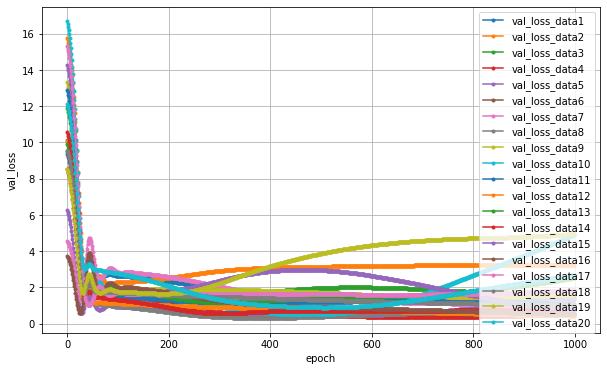

In [43]:
# 学習経過の可視化(大きさ)(validation)

val_loss_array = []
for i in range(len(history_size_array)):
    val_loss_array.append(history_size_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss_data%d'%((i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

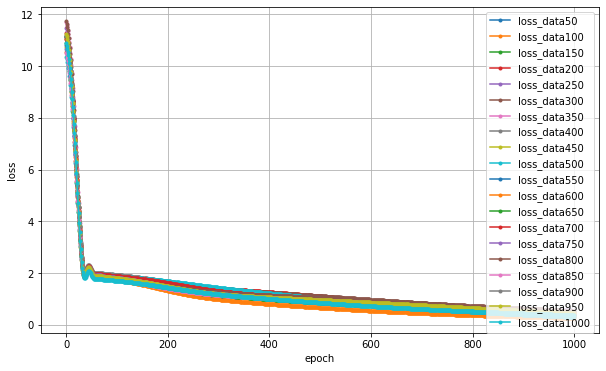

In [44]:
# 学習経過の可視化(大きさ)(train)

loss_array = []
for i in range(len(history_size_array)):
    loss_array.append(history_size_array[i].history['loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(loss_array[i])
for i in range(len(loss_array)):
    plt.plot(range(nb_epoch), loss_array[i], marker='.', label='loss_data%d'%(50*(i+1)))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [45]:
min_val_loss_array = []
for i in range(len(val_loss_array)):
    min_val_loss_array.append(min(val_loss_array[i]))

In [46]:
print(min_val_loss_array)

[1.3699443340301514, 1.494895339012146, 1.4503059387207031, 0.36948180198669434, 0.4640567898750305, 0.48280030488967896, 0.9431406855583191, 0.31479042768478394, 1.4404937028884888, 0.5082442164421082, 1.0845435857772827, 0.447650283575058, 1.2012207508087158, 0.5715184211730957, 0.8100930452346802, 0.5137563347816467, 1.038469672203064, 1.0054696798324585, 1.6593729257583618, 0.8923612833023071]


In [47]:
for i in range(len(val_loss_array)):
    print(val_loss_array[i][-1])

1.3727095127105713
3.2589850425720215
1.5493487119674683
0.5365542769432068
1.3596441745758057
0.48336276412010193
0.9431406855583191
0.5229505896568298
1.6128003597259521
4.922410488128662
1.0845435857772827
0.447650283575058
2.5291504859924316
0.6925514340400696
0.8100930452346802
0.5137563347816467
1.83830988407135
1.0054696798324585
4.948708534240723
2.683899164199829


In [48]:
# 平均と標準偏差
import statistics
import math
average = statistics.mean(min_val_loss_array)
stdev = statistics.pstdev(min_val_loss_array)

In [49]:
print(average)
print(stdev)

0.9031304761767387
0.41919322562757405
